<a href="https://colab.research.google.com/github/ratulb/9stepsawesome/blob/master/last_scratch_pad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dimensionality reduction**


*   Standardize data
*   Construct the covariance matrix
*   Get the eigen vectors and values of covariance matrix
*   Sort the eigenvalues by decreasing order to rank the eigenvectors





In [ ]:
#import wine dataset
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)
df_wine = wine.frame

In [ ]:
df_wine.head()

In [ ]:
df_wine.columns = range(len(df_wine.columns))
df_wine.head()

Alternatively, we can load the data from:
'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'



In [ ]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df_wine = pd.read_csv(url, header=None)
df_wine.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values # X -> Everything after first column, y -> only the first column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [ ]:
import numpy as np
np.unique(y)

**What Are Eigenvalues and Eigenvectors?**
For a square matrix
𝐴
A, an eigenvector is a special vector
𝑣
v that, when multiplied by
𝐴
A, does not change direction—it only gets scaled by a number called the eigenvalue
𝜆
λ:

In [ ]:
#Standardized
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
cov_matrix = np.cov(X_train_std.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
eigen_values[0], eigen_vectors[0]

In [ ]:
eigen_values_sorted = sorted(eigen_values, reverse=True)


Let:

*   ${\lambda_i}$ be the i-th eigenvalue.
*   ${\sum_{j} \lambda_j}$ be the total sum of all eigenvalues.

*   $r_i$ be the variance explained ratio of the eigenvalue.

Then the formula is:
$$ r_i = \frac{\lambda_i}{\sum_{j=1}^{d} \lambda_j} $$


In [ ]:
eigen_values_sum = sum(eigen_values)
var_explained_all = [(eigen_value/eigen_values_sum) for eigen_value in eigen_values_sorted]
var_explained_cum = np.cumsum(var_explained_all)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.bar(range(1,14), var_explained_all, alpha=0.5, align='center',
	label='Individual explained variance')
plt.step(range(1,14), var_explained_cum, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
w = np.hstack([eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]])
print('Matrix w:\n', w)


In [ ]:
X_train_pca = X_train_std@w
X_train_pca.shape

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                 X_train_pca[y_train==l, 1],
                 c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()


In [ ]:
(X_train_pca[y_train==3, 0]).shape, (X_train_pca[y_train==3, 1]).shape

In [ ]:
X_train.shape, df_wine.shape, X_train_std.shape, X_train_pca.shape, X_test.shape

In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:3])
cmap

In [ ]:
Y = np.arange(18).reshape(3, 6)
Y, Y[:, :2]

### Mathematical Formula
For each class \( c \), the mean vector \( \mu_c \) is computed as:

$$
\mu_c = \frac{1}{N_c} \sum_{i \in C_c} x_i
$$

- \( $\mu_c $\) is the mean vector for class \( c \).
- \( $N_c $\) is the number of samples in class \( c \).
- \( $x_i$ \) is a data point in class \( c \).
- \( $C_c$ \) represents the set of indices belonging to class \( c \).


In [ ]:
import numpy as np

# Example dataset: 10 samples, 4 features
X = np.array([
    [1.0, 2.0, 3.0, 4.0],  # Class 0
    [1.5, 2.5, 3.5, 4.5],  # Class 0
    [8.0, 9.0, 10.0, 11.0],  # Class 1
    [7.5, 8.5, 9.5, 10.5],  # Class 1
    [0.5, 1.5, 2.5, 3.5],  # Class 2
    [0.0, 1.0, 2.0, 3.0]   # Class 2
])

# Class labels
y = np.array([0, 0, 1, 1, 2, 2])

# Compute mean vectors for each class
mean_vectors = []
for c in np.unique(y):  # Loop through unique class labels
    mean_vectors.append(np.mean(X[y == c], axis=0))

# Display mean vectors
for i, mu in enumerate(mean_vectors):
    print(f"Mean vector for class {i}: {mu}")


In [ ]:
import numpy as np
import pandas as pd

# Example dataset
data = {
    'Feature1': [2, 3, 3, 5, 6, 6, 8, 9],
    'Feature2': [3, 4, 4, 6, 5, 7, 8, 9],
    'Class': [0, 0, 0, 1, 1, 1, 2, 2]
}

# Convert to DataFrame
df = pd.DataFrame(data)
df


In [ ]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

In [ ]:
class Loader:
    URL_MAP = {
        "default": "https://www.store.aws/mnist/",
        "fashion": "https://www.store.google/fashion-mnist/",
    }

    def __init__(self, dataset_type="default", base_url=None):
        # If the user provides a `base_url`, use it. Otherwise, use predefined URLs.
        self.base_url = base_url if base_url else self.URL_MAP.get(dataset_type, self.URL_MAP["default"])


In [ ]:
loader = Loader('fashion')
loader.base_url

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df[['Feature1', 'Feature2']].values
y = df['Class'].values

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show standardized features
print(X_scaled)


In [ ]:
# Get unique class labels
classes = np.unique(y)

# Calculate mean vector for each class
mean_vectors = []
for c in classes:
    class_samples = X_scaled[y == c]  # Select samples of class c
    mean_vector = np.mean(class_samples, axis=0)  # Mean of each feature
    mean_vectors.append(mean_vector)

# Show the mean vectors
mean_vectors = np.array(mean_vectors)
print(mean_vectors)


In [ ]:
classes

In [ ]:
[np.mean(X_scaled[y == c], axis=0) for c in classes]

In [ ]:
import numpy as np

class Adaline:
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta  # Learning rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """Train ADALINE using gradient descent."""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            net_input = np.dot(X, self.weights) + self.bias
            errors = y - net_input
            self.weights += self.eta * np.dot(X.T, errors)  # Update weights
            self.bias += self.eta * errors.sum()  # Update bias

    def predict(self, X):
        """Predict class labels."""
        return np.where(np.dot(X, self.weights) + self.bias >= 0, 1, -1)

# Example dataset
X = np.array([[1, 2], [2, 3], [3, 1], [5, 6], [6, 5], [7, 8]])
y = np.array([1, 1, -1, -1, 1, 1])

adaline = Adaline(eta=0.01, epochs=100)
adaline.fit(X, y)
predictions = adaline.predict(X)
print("Predictions:", predictions)


 **Big-endian binary format image files**: (*-images-idx3-ubyte)


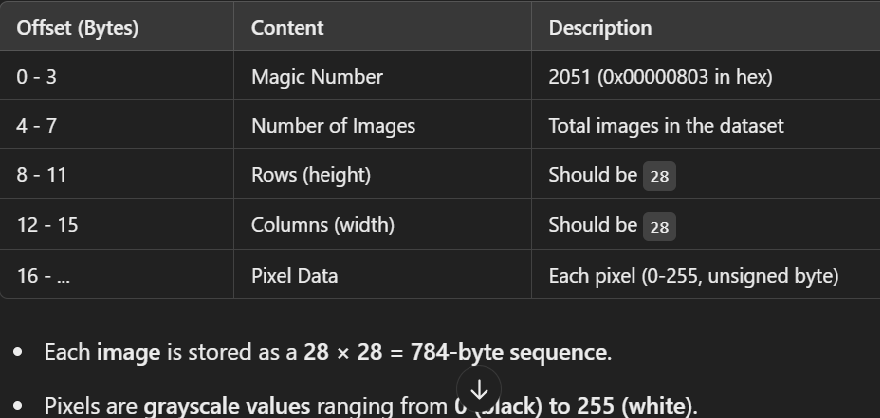

**Big-endian binary format label files**:(*-labels-idx1-ubyte)

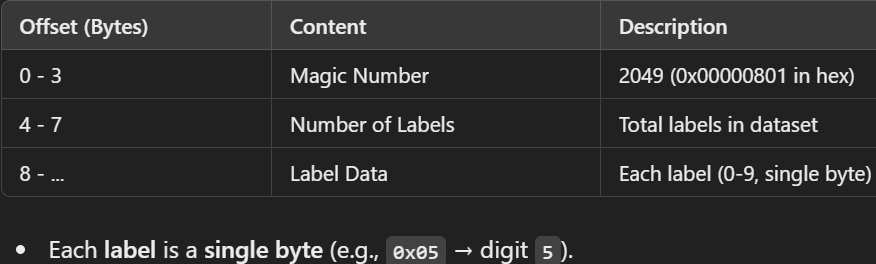

In [ ]:
import urllib.request
import os
import gzip
import shutil
import struct
import numpy as np
from tqdm import tqdm

class MNISTLoader:
    URL_MAP = {
        "default": "https://azureopendatastorage.blob.core.windows.net/mnist/",
        "fashion": "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/",
    }

    def __init__(self, dataset_type="default", base_url=None, folder=None):
        """
        Initialize the MNISTLoader class, set dataset URLs, and trigger downloading and extraction.

        Parameters:
        base_url (str): URL where MNIST dataset files are hosted.
        folder (str): Folder where dataset files will be stored. If None, uses the current working directory.
        """
        # If the user provides a `base_url`, use it. Otherwise, use predefined URLs.
        self.base_url = base_url if base_url else self.URL_MAP.get(dataset_type, self.URL_MAP["default"])
        self.files = ["train-images-idx3-ubyte.gz",
                      "train-labels-idx1-ubyte.gz",
                      "t10k-images-idx3-ubyte.gz",
                      "t10k-labels-idx1-ubyte.gz"]
        self.folder = folder
        self.download()
        self.extract()

    def download(self):
        """
        Downloads the MNIST dataset files from the given base URL if they are not already present.
        """
        # Define the folder where files will be saved
        if self.folder is None:
            self.folder = os.getcwd()  # Default to current working directory
        else:
            self.folder = os.path.join(os.getcwd(), self.folder)

        # Create the folder if it does not exist
        if not os.path.exists(self.folder):
            os.makedirs(self.folder)

        # Download each file if not already present
        for file in tqdm(self.files, desc="Downloading MNIST files"):
            url = self.base_url + file  # Construct full file URL
            file_path = os.path.join(self.folder, file)  # Full local file path
            if not os.path.exists(file_path):  # Avoid downloading again
                print(f"Downloading {file}...")
                urllib.request.urlretrieve(url, file_path)  # Download file

    def extract(self):
        """
        Extracts the downloaded gzip-compressed MNIST files.
        """
        for file in self.files:
            gz_path = os.path.join(self.folder, file)  # Gzipped file path
            extracted_path = os.path.join(self.folder, file[:-3])  # Remove .gz extension

            # Open the compressed file and save it uncompressed
            with gzip.open(gz_path, 'rb') as f_in, open(extracted_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)  # Extract the file

    def load(self, train=True):
        """
        Loads the MNIST dataset (train or test set) into NumPy arrays.

        Parameters:
        train (bool): If True, loads training data; otherwise, loads test data.

        Returns:
        images (numpy.ndarray): Flattened 28x28 grayscale images as a NumPy array.
        labels (numpy.ndarray): Corresponding labels as a NumPy array.
        """

        # Choose appropriate filenames based on whether we're loading training or test data
        if train:
            label_filename = "train-labels-idx1-ubyte"
            image_filename = "train-images-idx3-ubyte"
        else:
            label_filename = "t10k-labels-idx1-ubyte"
            image_filename = "t10k-images-idx3-ubyte"

        # Full file paths for the dataset
        label_path = os.path.join(self.folder, label_filename)
        image_path = os.path.join(self.folder, image_filename)
        #labels = load_labels(label_path)
        #images = load_images(image_path)
        # Read and parse label file
        with open(label_path, 'rb') as label_file:
            magic, num_labels = struct.unpack('>II', label_file.read(8))  # Read magic number and label count
            labels = np.fromfile(label_file, dtype=np.uint8)  # Read label data as uint8 array

        # Read and parse image file
        with open(image_path, 'rb') as image_file:
            magic, num_images, rows, cols = struct.unpack('>IIII', image_file.read(16))  # Read header
            images = np.fromfile(image_file, dtype=np.uint8).reshape(num_images, rows * cols)  # Read images and reshape

        return images, labels  # Return dataset as NumPy arrays


    @staticmethod
    def load_labels(label_file_path):
        """
        Load labels from a file.

        Parameters:
        label_file_path (str): Path to the label file.

        Returns:
        labels (numpy.ndarray): Labels as a NumPy array.

        This method is only for pedagogical purpose showing how to read data from mnist label data file without using resorting to any library.
        Refer to 'Big-endian binary format label files' above

        Usage:
        labels = MNISTLoader(folder='data').load_labels('./data/t10k-labels-idx1-ubyte')

        """
        with open(label_file_path, 'rb') as f:
            # Read the magic number (4 bytes)
            magic = int.from_bytes(f.read(4), byteorder='big')
            assert magic == 2049, f"Invalid MNIST label file: {magic}"

            # Read number of labels (4 bytes)
            num_labels = int.from_bytes(f.read(4), byteorder='big')

            # Read label data (1 byte per label)
            labels = [f.read(1)[0] for _ in range(num_labels)]
            #labels = [int.from_bytes(f.read(1), byteorder="big") for _ in range(num_labels)]
            labels = np.array(labels)

        return labels  # Returns NumPy array of integers (0-9)

    @staticmethod
    def load_images(image_file_path):
        """
        Load images from a file.

        Parameters:
        image_file_path (str): Path to the image file.

        Returns:
        images (numpy.ndarray): Images as a NumPy array.

        This method is only for pedagogical purpose showing how to read data from mnist image data file without using resorting to any library.
        Refer to 'Big-endian binary format image files' above
        Usage:
        images = MNISTLoader(folder='data').load_images('./data/t10k-images-idx3-ubyte')

        """
        with open(image_file_path, 'rb') as f:
            # Read the magic number (4 bytes)
            magic = int.from_bytes(f.read(4), byteorder='big')
            assert magic == 2051, f"Invalid MNIST image file: {magic}"

            # Read number of images (4 bytes)
            num_images = int.from_bytes(f.read(4), byteorder='big')

            # Read number of rows (4 bytes) and columns (4 bytes)
            rows = int.from_bytes(f.read(4), byteorder='big')
            cols = int.from_bytes(f.read(4), byteorder='big')
            assert rows == 28 and cols == 28, "Images are not 28x28"

            # Read image data (each image is rows × cols = 28 × 28 = 784 bytes)
            images = []
            for _ in range(num_images):
                image = [[f.read(1)[0] for _ in range(cols)] for _ in range(rows)]
                images.append(image)  # Store each 28x28 image as a list of lists
            images = np.array(images)  # Convert to NumPy array
        return images # Returns a NumPy array of size 28x28 (each pixel is 0-255)

    @staticmethod
    def from_arff(base_url='https://www.openml.org/data/download/52667/mnist_784.arff', folder=None):

        from scipy.io import arff

        if folder is None:
            folder = os.getcwd()  # Default to current working directory
        else:
            folder = os.path.join(os.getcwd(), folder)
        # Create the folder if it does not exist
        if not os.path.exists(folder):
            os.makedirs(folder)
        # Download each file if not already present
        url = base_url + 'mnist_784.arff'  # Construct full file URL
        file_path = os.path.join(folder, 'mnist_784.arff')  # Full local file path
        def reporthook(block_num, block_size, total_size):
            if reporthook.tqdm_bar is None:
                reporthook.tqdm_bar = tqdm(total=total_size, unit='B', unit_scale=True, desc=file_path)
            reporthook.tqdm_bar.update(block_num * block_size - reporthook.tqdm_bar.n)

        reporthook.tqdm_bar = None

        if not os.path.exists(file_path):  # Avoid downloading again
            print(f"Downloading mnist_784.arff...")
            urllib.request.urlretrieve(url, file_path, reporthook) # Download file

        data, meta = arff.loadarff(file_path)

        # Get all column names except the last one (labels -> 'class')
        #feature_names = data.dtype.names[:-1]
        feature_names = data.dtype.names

        # Extract pixel values (X) and labels (y) from structured array
        #X = np.array([[row[name] for name in feature_names] for row in data], dtype=np.uint8)  # (70000, 784)
        #y = np.array([int(row['class']) for row in data], dtype=np.int32)  # Convert bytes to int (70000,)

        #print("Shape of X:", X.shape)  # Expected: (70000, 784)
        #print("Shape of y:", y.shape)  # Expected: (70000,)
        # Assume `data` is a list of dictionaries and `feature_names` is a list of keys
        data_ = np.empty((len(data), len(feature_names)), dtype=np.uint8)  # Preallocate memory

        for i, row in tqdm(enumerate(data), total=len(data), desc="Processing Data", unit="rows"):
            data_[i] = [row[name] for name in feature_names]

In [ ]:
loader = MNISTLoader(dataset_type='fashion')

In [ ]:
!pip install mnist_datasets

In [ ]:
from mnist_datasets import MNISTLoader
loader = MNISTLoader('fashion')

In [ ]:
images, labels = loader.load()

In [ ]:
len(images), len(labels)

In [ ]:
test_images, test_labels = loader.load(train=False)
assert len(test_images) == 10000 and len(test_labels) == 10000

In [ ]:
!gunzip /content/t10k-labels-idx1-ubyte.gz

In [ ]:
labels = MNISTLoader.load_labels('/content/t10k-labels-idx1-ubyte')
#images = MNISTLoader.load_images('/content/data/t10k-images-idx3-ubyte')

In [ ]:
labels.shape

In [ ]:
labels = MNISTLoader(folder='data').load_images('./data/t10k-images-idx3-ubyte')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
image = images[7000].reshape(28, 28)/255.0
plt.imshow(image, cmap='gray')  # 'gray' colormap for grayscale images
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5), sharex=True, sharey=True)
axes = axes.flatten()
for i in range(10):
    img = images[labels == i][0].reshape(28, 28)
    img = img/255.0
    axes[i].imshow(img, cmap='Greys')
axes[0].set_xticks([])
axes[0].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 5), sharex=True, sharey=True)
axes = axes.flatten()
for i in range(25):
    img = images[labels == 9][i].reshape(28, 28)
    img = img/255.0
    axes[i].imshow(img, cmap='Greys')
axes[0].set_xticks([])
axes[0].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
from tempfile import TemporaryFile


In [ ]:
#outfile = TemporaryFile()
#np.savez_compressed('outfile', images=images, labels=labels)
#_ = outfile.seek(0) # Only needed to simulate closing & reopening file
npzfile = np.load('outfile.npz')
npzfile.files


In [ ]:
labels_loaded = npzfile['labels']
images_loaded = npzfile['images']
labels_loaded.shape, images_loaded.shape

In [ ]:
!du -h outfile.npz

In [ ]:
urllib.request.urlretrieve('https://www.openml.org/data/download/52667/mnist_784.arff', './mnist_784.arff')

In [ ]:
epochs =1
X_train = np.arange(10).reshape(5, 2)
shuffle = True
import random

minibatch_size = 2
for i in range(epochs):

    # iterate over minibatches
    indices = np.arange(X_train.shape[0])

    if shuffle:
        random.shuffle(indices)

    for start_idx in range(0, indices.shape[0] - minibatch_size +1, minibatch_size):
        batch_idx = indices[start_idx:start_idx +  minibatch_size]
        print(batch_idx)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -100, 100 )))

def sigmod_derivative(z):
    return z * (1 - z)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
input = np.arange(-10, 10, 0.1)
output = sigmoid(input)
output_derivatives = sigmod_derivative(output)
plt.plot(input, output)
plt.plot(input, output_derivatives)
plt.plot(output, output_derivatives)
plt.legend()
plt.show()

In [ ]:
type(torch.clamp(torch.tensor(7.0), -5, 5).item())

In [ ]:
loader = MNISTLoader(folder='data')
images, labels = loader.load()
images = images/255.0

In [ ]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        raise NotImplementedError

    def backward(self, error_gradient, learning_rate):
        raise NotImplementedError

class Linear(Layer):

    def __init__(self, input_size, output_size):
        super().__init__()
        #self.weights = np.random.randn(output_size, input_size) * 0.01  # Small random values
        self.weights = np.random.randn(output_size, input_size) * np.sqrt(2 / input_size)

        self.bias = np.zeros((output_size, 1))  # Typically initialized to zero

    def forward(self, input):
        self.input = input  # Store input for backpropagation
        output = np.matmul(input, self.weights.T) + self.bias.T
        return output

    def backward(self, error_gradient, learning_rate):
        weights_gradient = np.matmul(error_gradient.T, self.input)/self.input.shape[0]
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * np.mean(error_gradient, axis=0, keepdims=True).T
        return np.matmul(error_gradient, self.weights)

class Activation(Layer):
    def __init__(self, activation, activation_derivative):
        super().__init__()
        self.activation = activation
        self.activation_derivative = activation_derivative

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, error_gradient, learning_rate):
        return error_gradient * self.activation_derivative(self.input)

class Sigmoid(Activation):
    def __init__(self):
        sigmoid = lambda z: 1 / (1 + np.exp(-np.clip(z, -100, 100 )))
        sigmod_derivative = lambda z: sigmoid(z) * (1 - sigmoid(z))
        super().__init__(sigmoid, sigmod_derivative)

class MSELoss():

    def __init__(self):
        self.y_true = None
        self.y_pred = None

    def __call__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        return np.mean((self.y_true - self.y_pred)**2)

    def backward(self):
        batch_size = self.y_true.shape[0]  # Number of samples
        num_outputs = self.y_true.shape[1] if self.y_true.ndim > 1 else 1  # Handle 1D case
        return (2 / (batch_size * num_outputs)) * (self.y_pred - self.y_true)




In [ ]:
network = [
    Linear(784, 128),
    Sigmoid(),
    Linear(128, 10),
    Sigmoid()
]
epochs = 10
learning_rate = 0.025
loss = MSELoss()
batch_size = 512
n, _ = images.shape


for epoch in range(epochs):
    for i in range((n - 1) // batch_size + 1):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        batch_images = images[start_idx:end_idx]
        batch_labels = labels[start_idx:end_idx].astype(int)
        output = batch_images
        for layer in network:
            output = layer.forward(output)
        batch_labels = np.eye(10)[batch_labels]

        error = loss(batch_labels, output)

        error_gradient  = loss.backward()
        for layer in reversed(network):
            error_gradient = layer.backward(error_gradient, learning_rate)
    print(error)
    print(output)


In [ ]:
from PIL import Image

# Open the PNG image
img = Image.open("de-by-dx.png").convert("RGBA")

# Define the new background color (e.g., white)
new_bg_color = (255, 255, 255, 255)  # (R, G, B, Alpha)

# Create a new image with the same size and the new background color
new_bg = Image.new("RGBA", img.size, new_bg_color)

# Paste the original image on top of the new background
new_bg.paste(img, (0, 0), img)

# Save or show the result
new_bg.convert("RGB").save("output.png")  # Convert to RGB if you don't need transparency


In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("de-by-dx.png")

# Define the background color (white in this case)
lower_bound = np.array([200, 200, 200], dtype=np.uint8)
upper_bound = np.array([255, 255, 255], dtype=np.uint8)

# Create a mask of the background
mask = cv2.inRange(img, lower_bound, upper_bound)

# Replace background with a new color (blue in this case)
new_bg_color = [255, 0, 0]  # BGR format for blue
img[mask == 255] = new_bg_color

# Save the new image
cv2.imwrite("output.png", img)


In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("de-by-dx.png", cv2.IMREAD_UNCHANGED)

# Define the black color range
lower_black = np.array([0, 0, 0], dtype=np.uint8)
upper_black = np.array([50, 50, 50], dtype=np.uint8)  # Adjust this threshold if needed

# Create a mask where the background is black
mask = cv2.inRange(img, lower_black, upper_black)

# Define the new background color (e.g., white)
new_bg_color = [255, 255, 255]  # (B, G, R) format

# Replace the black background with the new color
img[mask == 255] = new_bg_color

# Save or display the new image
cv2.imwrite("output.png", img)


In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("mse.png", cv2.IMREAD_UNCHANGED)

# Define the black color range
lower_black = np.array([0, 0, 0], dtype=np.uint8)
upper_black = np.array([5, 5, 5], dtype=np.uint8)  # Adjust this if needed

# Create a mask where the background is black
mask = cv2.inRange(img, lower_black, upper_black)

# Define the new background color (light blue)

new_bg_color = [80, 80, 80 ]  # This is good

# Replace the black background with the new color
img[mask == 255] = new_bg_color

# Save or display the new image
cv2.imwrite("mse-output.png", img)


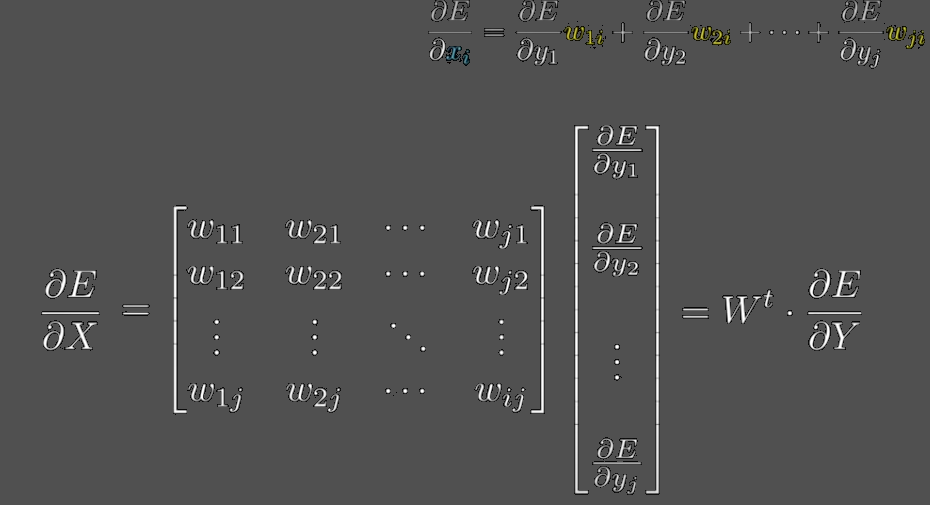

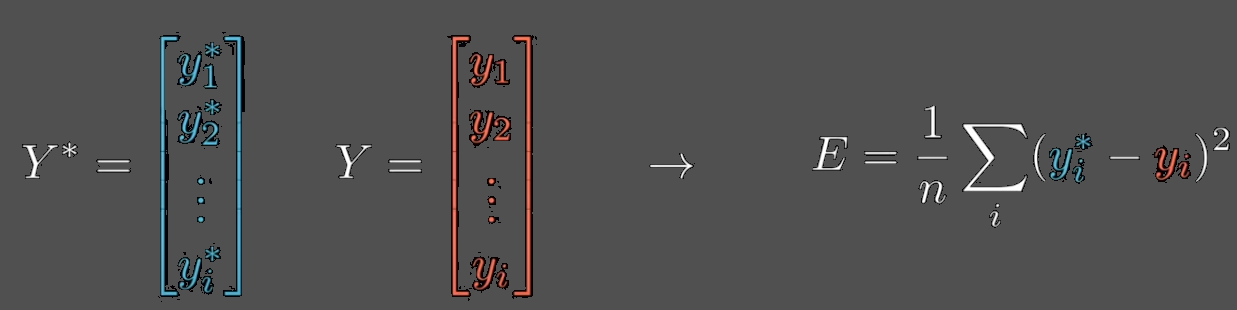

In [ ]:
input = np.reshape([[0,0], [0,1],[1,0], [1,1]], (4,2,1))
output = np.reshape([[0], [1],[1], [0]], (4,1,1))
#input, output

In [ ]:
class MSELoss():

    def __init__(self):
        self.y_true = None
        self.y_pred = None

    def __call__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        return np.mean((self.y_true - self.y_pred)**2)

    def backward(self):
        batch_size = self.y_true.shape[0]  # Number of samples
        num_outputs = self.y_true.shape[1] if self.y_true.ndim > 1 else 1  # Handle 1D case
        return (2 / (batch_size * num_outputs)) * (self.y_pred - self.y_true)



In [ ]:
import numpy as np


In [ ]:
loss = MSELoss()
y_t = np.array([[1000.0, 200]])
y_p = np.array([[110.0, 100]])

l = loss(y_t, y_p)
print(l)
grad = loss.backward()
print(grad)

In [ ]:
import torch.nn.functional as F

In [ ]:
mse_loss = F.mse_loss

In [ ]:
t1 = torch.tensor(y_t, requires_grad=True)
t2 = torch.tensor(y_p, requires_grad=True)
mloss = mse_loss(t1,t2 )
print("mloss: ", mloss)
print("Grads: ", t1.grad, t2.grad)
mloss.backward()
print("Grads: ", t1.grad, t2.grad)

In [ ]:
y_t.shape, y_t.size

In [ ]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [ ]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), what) = pickle.load(f, encoding="latin-1")

In [ ]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

In [ ]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [ ]:
import torch.nn.functional as F

In [ ]:
loss_fn = F.cross_entropy
loss_func = F.cross_entropy
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
from torch import nn
import math

In [ ]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784, 10)/math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb):
        return xb @ self.weights + self.bias

In [ ]:
model = Mnist_Logistic()
learning_rate = 0.01
bs = 64
epochs = 10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

In [ ]:
def fit():
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            pred = model(xb)
            loss = loss_fn(pred, yb)

            # Backward pass
            loss.backward()
            # Update parameters
            optimizer.step()
        model.eval()
        with torch.no_grad():
            valid_loss = sum(loss_fn(model(xb), yb) for xb, yb in valid_dl)
        print(epoch, (valid_loss.item()/len(valid_dl)), loss.item() )
       #print(loss.item())

In [ ]:
fit()

In [ ]:
print(F.cross_entropy(model(x_train[:64]), y_train[:64]))

In [ ]:
from torch import optim

In [ ]:
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(), lr=lr)

def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)
import numpy as np

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [ ]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

In [ ]:
class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

lr = 0.1

In [ ]:
model = Mnist_CNN()
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

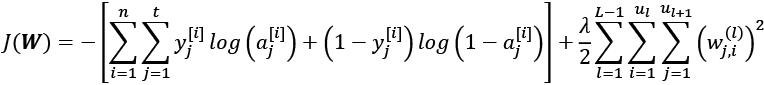

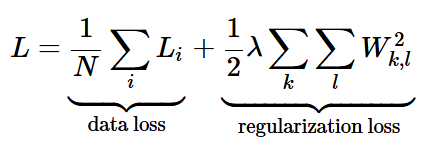

In [ ]:
import numpy as np

In [ ]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

def sigmoid_derivative(z):
    delta = sigmoid(z)
    return delta * (1 - delta)

import numpy as np

def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Numerical stability
    return exp_z / np.sum(exp_z, axis=-1, keepdims=True)

def softmax_derivative(z):
    s = softmax(z).reshape(-1, 1)  # Convert to column vector
    return np.diagflat(s) - np.dot(s, s.T)  # Compute Jacobian matrix



In [ ]:
z = np.array([1,20, 4])
drv = softmax(z)
print(drv)
softmax_derivative(np.array([1,20, 4]))

In [ ]:
zt = z.reshape(-1, 1)
np.dot(z.T, z), np.dot(z, z.T), np.dot(zt, zt.T),  np.dot(zt.T, zt)

# Pictorial Representation of 𝑊
**In a neural network, weights are typically stored in a matrix where:**


*   Rows (𝑘) represent neurons in the current layer.
*   Columns (𝑙) represent neurons (or input features) from the previous layer.

The weight matrix 𝑊 will look like this:

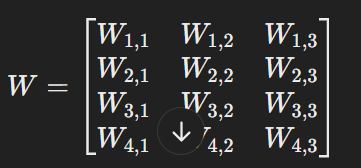

# Visualizing It with a Neural Network

Previous Layer  →  Current Layer
   (Inputs)           (Neurons)
   
   x1  ● ─── W_1,1 ───▶ ● (Neuron 1)

   x2  ● ─── W_1,2 ───▶ ● (Neuron 1)

   x3  ● ─── W_1,3 ───▶ ● (Neuron 1)



---




   x1  ● ─── W_2,1 ───▶ ● (Neuron 2)

   x2  ● ─── W_2,2 ───▶ ● (Neuron 2)

   x3  ● ─── W_2,3 ───▶ ● (Neuron 2)

  

---


   x1  ● ─── W_3,1 ───▶ ● (Neuron 3)

   x2  ● ─── W_3,2 ───▶ ● (Neuron 3)

   x3  ● ─── W_3,3 ───▶ ● (Neuron 3)

---

   x1  ● ─── W_4,1 ───▶ ● (Neuron 4)

   x2  ● ─── W_4,2 ───▶ ● (Neuron 4)

   x3  ● ─── W_4,3 ───▶ ● (Neuron 4)

   ---

Here:

Each dot (●) represents a neuron.
Each line (─── W_k,l ───▶) represents a weight.
Each neuron in the current layer gets input from all neurons in the previous layer.


In [ ]:
import numpy as np

# Define weight matrix W (random values for illustration)
np.random.seed(42)  # For reproducibility
W = np.random.randn(4, 3)  # Example weight matrix with 4 rows (neurons), 3 columns (inputs)

# Regularization strength (hyperparameter)
lambda_reg = 0.1

# Compute the regularization loss
reg_loss = (0.5 * lambda_reg) * np.sum(W ** 2)

# Print results
print("Weight matrix W:\n", W)
print("\nRegularization Loss:", reg_loss)


In [ ]:
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

x = np.linspace(0.01, 1.0, 20)
y = -np.log(x)

plt.xlabel('x ->')
plt.ylabel('loss ->')
plt.title('NLL')
plt.plot(x, y)
plt.show()



In [ ]:
x = np.empty((10,10), dtype='uint8')
idx = range(10)
x[idx] = np.arange(10, 20)
x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100  # Number of points per class
D = 2    # Dimensionality (2D points: x and y)
K = 3    # Number of classes
X = np.zeros((N*K, D))  # Data matrix
y = np.zeros(N*K, dtype='uint8')  # Class labels

for j in range(K):  # Loop over 3 classes
    ix = range(N*j, N*(j+1))  # Select index range for this class
    r = np.linspace(0.0, 1, N)  # Radius (distance from center)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N) * 0.2  # Angle (theta) with noise
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]  # Convert polar to Cartesian (x, y)
    y[ix] = j  # Assign class labels (0, 1, or 2)

# Plot the generated dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='BuGn_r1')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# Generate some data
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 random points

# Different colormaps to cycle through
#cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'grey_r', 'hot', 'hot_r']

# Loop to update the plot
for cmap in cmaps:
    clear_output(wait=True)  # Clear the previous plot
    plt.scatter(X[:, 0], X[:, 1], c=np.random.rand(100), cmap=cmap, s=40)
    plt.title(f"Colormap: {cmap}")
    plt.colorbar()
    plt.show()
    time.sleep(2)  # Pause for 2 seconds before updating


$\sigma_i=15$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 200 samples (100 per class)
N = 100  # Number of points per class
D = 2    # Dimensionality
X = np.zeros((N*2, D))  # Data matrix
y = np.zeros(N*2, dtype='uint8')  # Labels

# Generate first half-moon (upper moon)
t1 = np.linspace(0, np.pi, N)  # Angles from 0 to π
X[:N] = np.c_[np.cos(t1), np.sin(t1)]  # Convert to (x, y) coordinates
y[:N] = 0  # First class

# Generate second half-moon (lower moon, shifted)
t2 = np.linspace(0, np.pi, N)  # Angles from 0 to π
X[N:] = np.c_[np.cos(t2) + 0.5, -np.sin(t2) + 0.2]  # Shifted second moon
y[N:] = 1  # Second class

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Two Moons Dataset")
plt.show()


🌙 ***Noisy Two Moons Dataset
Adding noise makes classification harder by slightly shifting points randomly.***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 200 samples (100 per class)
N = 100  # Number of points per class
D = 2    # Dimensionality
X = np.zeros((N*2, D))  # Data matrix
y = np.zeros(N*2, dtype='uint8')  # Labels

# Generate first half-moon (upper moon)
t1 = np.linspace(0, np.pi, N)  # Angles from 0 to π
X[:N] = np.c_[np.cos(t1), np.sin(t1)]  # Convert to (x, y) coordinates
y[:N] = 0  # First class

# Generate second half-moon (lower moon, shifted)
t2 = np.linspace(0, np.pi, N)  # Angles from 0 to π
X[N:] = np.c_[np.cos(t2) + 0.5, -np.sin(t2) + 0.2]  # Shifted second moon
y[N:] = 1  # Second class

# Add random noise
X += np.random.randn(N*2, D) * 0.1  # Adding Gaussian noise

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Noisy Two Moons Dataset")
plt.show()


# 🎯 Concentric Circles Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 200 samples (100 per class)
N = 100  # Number of points per class
D = 2    # Dimensionality
X = np.zeros((N*2, D))  # Data matrix
y = np.zeros(N*2, dtype='uint8')  # Labels

# Generate inner circle
t1 = np.linspace(0, 2*np.pi, N)  # Angles from 0 to 2π
X[:N] = np.c_[np.cos(t1) * 0.5, np.sin(t1) * 0.5]  # Smaller radius
y[:N] = 0  # First class

# Generate outer circle
t2 = np.linspace(0, 2*np.pi, N)  # Angles from 0 to 2π
X[N:] = np.c_[np.cos(t2), np.sin(t2)]  # Larger radius
y[N:] = 1  # Second class

# Add random noise
X += np.random.randn(N*2, D) * 0.05  # Adding Gaussian noise

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Concentric Circles Dataset")
plt.show()


# 📌 Gaussian Blobs Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate three clusters (blobs) with some noise
N = 100  # Points per cluster
D = 2  # Dimensions
K = 3  # Number of clusters

X = np.zeros((N * K, D))  # Data matrix
y = np.zeros(N * K, dtype='uint8')  # Class labels

# Cluster centers
centers = np.array([[1, 1], [-1, -1], [1, -1]])

for j in range(K):
    ix = range(N * j, N * (j + 1))
    X[ix] = centers[j] + np.random.randn(N, D) * 0.3  # Add Gaussian noise
    y[ix] = j  # Assign labels

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Gaussian Blobs Dataset")
plt.show()


# 📌 Swiss Roll Dataset (3D Spiral)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Generate Swiss roll
N = 1000  # Number of points
t = 3 * np.pi * (1 + 2 * np.random.rand(N))  # Angle
x = t * np.cos(t)  # X-coordinates
y = 10 * np.random.rand(N)  # Y-coordinates (random height)
z = t * np.sin(t)  # Z-coordinates

# Color by t-value (helps visualize the roll)
colors = t

# Plot dataset
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll Dataset")
plt.show()


# PCA on Swiss Roll

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate Swiss Roll Data
N = 1000  # Number of points
t = 3 * np.pi * (1 + 2 * np.random.rand(N))  # Angle
x = t * np.cos(t)  # X-coordinates
y = 10 * np.random.rand(N)  # Y-coordinates (height)
z = t * np.sin(t)  # Z-coordinates
X = np.c_[x, y, z]  # Combine into (N, 3) dataset

# Step 2: Center the Data
X_mean = np.mean(X, axis=0)  # Compute mean of each column
X_centered = X - X_mean  # Subtract mean to center the data

# Step 3: Compute Covariance Matrix
cov_matrix = np.cov(X_centered, rowvar=False)  # (3,3) covariance matrix

# Step 4: Compute Eigenvectors & Eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Eigen decomposition

# Step 5: Sort Eigenvectors by Largest Eigenvalues
sorted_indices = np.argsort(-eigenvalues)  # Get indices in descending order
top_2_eigenvectors = eigenvectors[:, sorted_indices[:2]]  # Keep top 2 eigenvectors

# Step 6: Project Data onto Top 2 Components
X_pca = X_centered @ top_2_eigenvectors  # Matrix multiplication to transform data

# Step 7: Visualize the Reduced 2D Data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title("PCA Projection of Swiss Roll (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [ ]:
import numpy as np

In [ ]:
np.log(0)

In [ ]:
epsilon = 1e+10
np.log(0 + epsilon)  # Avoids -inf


In [ ]:
np.log(0.71), np.log(0.98), np.log(0.49)

In [ ]:
np.log(0)

In [ ]:
-np.log(0.1)

In [ ]:
-np.log(0.36787944117144233)

In [ ]:
1/np.e

In [ ]:
sigmoid(2), 1/(1 + np.e ** (-2)), sigmoid(0.3) + sigmoid(-0.3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0.01, 1, 100)  # Probabilities from 0.01 to 1
nll = -np.log(p)

plt.plot(p, nll, label="-log(p)", color="b")
plt.axvline(x=np.exp(-1), color='r', linestyle='--', label="p = 0.367 (e^-1)")
plt.axhline(y=1, color='g', linestyle='--', label="Loss = 1")

plt.xlabel("Predicted Probability (p)")
plt.ylabel("Negative Log Likelihood (-log(p))")
plt.title("Negative Log Likelihood vs. Probability")
plt.legend()
plt.grid()
plt.show()


In [ ]:
X_train, y_train = MNISTLoader(folder='data').load()
X_train.shape, X_train.dtype, y_train.shape, y_train.dtype
indices = np.where((y_train == 0) | (y_train == 1) | (y_train == 2))
X_train_123 = X_train[indices]
y_train_123 = y_train[indices]
X_train_123.shape, y_train_123.shape

In [ ]:
in_features = 784
out_features_1 = 3
weights_1 = np.random.randn(out_features_1, in_features) * np.sqrt(2. / in_features)
bias_1 = np.full(out_features_1, 0.1)

In [ ]:
z1 = X_train_123 @ weights_1.T + bias_1
a1 = 1 / (1 + np.exp(-z1))
preds = np.argmax(a1, axis=1)
print(preds.shape, y_train_123.shape)
#loss = np.mean((y_train_123 - preds) **2)
loss = -np.mean(y_train_123 * np.log(a1) + (1 - y_train_123) * np.log(1 - a1))

#error_delta = (a1 - y_train) / a.shape[0]

print(loss, a1.shape)

In [ ]:
probs = np.linspace(10, 20, 10).reshape(2,5)
probs[range(2),[4, 0]]

In [ ]:
def download(url, filename):
    from pathlib import Path
    import requests
    splits = filename.split('/')
    data_path = '/'.join(splits[:-1])
    f_name = splits[-1]
    data_path = Path(data_path)
    data_path.mkdir(parents=True, exist_ok=True)

    if not (data_path / f_name).exists():
        content = requests.get(url).content
        (data_path / f_name).open("wb").write(content)

In [ ]:
download(url, "Pima-Indians-Diabetes-Dataset/diabetes.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
url = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/refs/heads/master/diabetes.csv'
diabetestxt = np.loadtxt(url, delimiter=',', skiprows=1, dtype=np.float16)

# Split dataset
split = int(0.8 * len(diabetestxt))
X_train, y_train = diabetestxt[:split, :-1], diabetestxt[:split, -1]
X_test, y_test = diabetestxt[split:, :-1], diabetestxt[split:, -1]

In [ ]:
np.random.seed(42)
# Initialize weights & bias
in_features = X_train.shape[1]
out_features = 1

weights = np.random.randn(in_features, out_features) * np.sqrt(2. / in_features)
bias = np.full((1, out_features), 0.1)

# Activation functions
z = lambda x, w, b: x @ w + b
a = lambda z: 1 / (1 + np.exp(-z))
sigmoid_prime = lambda a: a * (1 - a)

# Training loop
epochs = 20
lr = 0.01


In [ ]:
losses = []

for epoch in range(epochs):
    logits = z(X_train, weights, bias)  # Forward pass
    preds = a(logits)

    # Compute MSE Loss
    loss = np.mean((preds.flatten() - y_train) ** 2)
    losses.append(loss)

    # Compute Gradients
    loss_gradient = 2 * (preds - y_train.reshape(-1, 1)) / y_train.shape[0]
    sigmoid_drv = sigmoid_prime(preds)

    # Weight and bias update
    wt_delta = X_train.T @ (loss_gradient * sigmoid_drv)  # Corrected gradient
    db_delta = np.sum(loss_gradient * sigmoid_drv, axis=0, keepdims=True)

    weights -= lr * wt_delta
    bias -= lr * db_delta

    print(f'Epoch: {epoch+1}/{epochs} | Loss: {loss:.10f}')



In [ ]:
def predict(X, weights, bias):
    logits = z(X, weights, bias)
    preds = a(logits)
    return np.round(preds).flatten()
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [ ]:
y_pred = predict(X_test, weights, bias)
accuracy(y_test, y_pred) * 100

In [ ]:
import numpy as np

# Load dataset
url = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/refs/heads/master/diabetes.csv'
diabetestxt = np.loadtxt(url, delimiter=',', skiprows=1, dtype=np.float32)

# Split dataset
split = int(0.8 * len(diabetestxt))
X_train, y_train = diabetestxt[:split, :-1], diabetestxt[:split, -1]
X_test, y_test = diabetestxt[split:, :-1], diabetestxt[split:, -1]

# Reshape y_train and y_test for proper broadcasting
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Normalize X_train and X_test
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std  # Fix test normalization

# Initialize weights & bias
np.random.seed(42)
in_features = X_train.shape[1]
out_features = 1

# He initialization
weights = np.random.randn(in_features, out_features) * np.sqrt(2. / in_features)
bias = np.zeros((1, out_features))

# Activation functions
z = lambda x, w, b: x @ w + b
sigmoid = lambda z: 1 / (1 + np.exp(-z))

# Training loop
epochs = 500  # Increase epochs
lr = 0.005  # Learning rate
epsilon = 1e-7  # Small value to avoid log(0)
reg = 1  # Regularization

losses = []

for epoch in range(epochs):
    # Forward pass
    logits = z(X_train, weights, bias)
    preds = sigmoid(logits)

    # Clip predictions for stability
    preds = np.clip(preds, epsilon, 1 - epsilon)

    # Compute Binary Cross-Entropy Loss
    loss = -np.mean(y_train * np.log(preds) + (1 - y_train) * np.log(1 - preds))
    reg_loss = 0.5 * reg * np.sum(weights * weights)
    total_loss = loss + reg_loss
    losses.append(total_loss)

    # Compute Gradients
    loss_gradient = (preds - y_train) / y_train.shape[0]  # Derivative of BCE loss

    # Corrected sigmoid derivative
    #sigmoid_drv = preds * (1 - preds)  # Use preds, which is already sigmoid(logits)
    sigmoid_drv = sigmoid_prime(preds)
    # Weight and bias update with regularization
    wt_delta = X_train.T @ (loss_gradient) + reg * weights
    db_delta = np.sum(loss_gradient * sigmoid_drv, axis=0, keepdims=True)

    weights -= lr * wt_delta
    bias -= lr * db_delta

    if (epoch + 1) % 50 == 0:
        print(f'Epoch: {epoch+1}/{epochs} | Loss: {total_loss:.10f}')

# Print final accuracy
y_pred_test = sigmoid(z(X_test, weights, bias)) >= 0.5
accuracy = np.mean(y_pred_test == y_test)
print(f'Test Accuracy: {accuracy:.4f}')


In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [ ]:
w = np.random.randn(3,3)
w, np.sign(w)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=columns)

# Split features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train, dtype=torch.float32).view(-1, 1), torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define the neural network
class DiabetesModel(nn.Module):
    def __init__(self):
        super(DiabetesModel, self).__init__()
        self.fc1 = nn.Linear(8, 16)  # First hidden layer
        self.fc2 = nn.Linear(16, 8)  # Second hidden layer
        self.fc3 = nn.Linear(8, 1)   # Output layer

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))  # Sigmoid activation at output
        return x

# Instantiate model, define loss and optimizer
model = DiabetesModel()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    predictions = predictions.round()
    accuracy = (predictions.eq(y_test).sum().item()) / y_test.shape[0]
    print(f"Test Accuracy: {accuracy:.4f}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=columns)

# Split features and labels
X = df.iloc[:, :-1].values  # Features (8 inputs)
y = df.iloc[:, -1].values   # Labels (0 or 1)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights and bias
np.random.seed(42)
num_features = X_train.shape[1]
W = np.random.randn(num_features) * 0.01  # Small random values
b = 0.0  # Bias term

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary Cross-Entropy Loss
def compute_loss(y_true, y_pred):
    m = len(y_true)
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

# Gradient Descent function
def gradient_descent(X, y, W, b, learning_rate, epochs):
    m = X.shape[0]  # Number of training samples

    for epoch in range(epochs):
        # Forward pass
        z = np.dot(X, W) + b  # Linear combination
        y_pred = sigmoid(z)   # Apply sigmoid

        # Compute loss
        loss = compute_loss(y, y_pred)

        # Backward pass (compute gradients)
        dz = y_pred - y  # Error term
        dW = np.dot(X.T, dz) / m  # Gradient of weights
        db = np.sum(dz) / m       # Gradient of bias

        # Update weights and bias
        W -= learning_rate * dW
        b -= learning_rate * db

        # Print loss every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

    return W, b

# Train the model
learning_rate = 0.01
epochs = 1000
W, b = gradient_descent(X_train, y_train, W, b, learning_rate, epochs)

# Predictions
def predict(X, W, b, threshold=0.5):
    return sigmoid(np.dot(X, W) + b) >= threshold

# Evaluate the model
y_pred_test = predict(X_test, W, b)
accuracy = np.mean(y_pred_test == y_test)
print(f"Test Accuracy: {accuracy:.4f}")


In [ ]:
!python -c 'import tensorflow as tf; print(tf.__version__)'

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
print(tf.__version__)
np.set_printoptions(precision=3)

In [ ]:
a = np.array([1,2,3], dtype=np.int32)
b = [4,5,6]
c = tf.convert_to_tensor(b, dtype=tf.int32)
d = tf.convert_to_tensor(a, dtype=tf.int32)
print(a, b, c, d)

In [ ]:
ones = tf.ones((2,3))
ones.shape, ones.numpy()

In [ ]:
tf.constant([42])

In [ ]:
tf.cast(a, tf.bool)

In [ ]:
x = tf.convert_to_tensor([1, -3.0])
tf.cast(x, tf.int64)

In [ ]:
import torch
tf.random.uniform(shape=(2,3)), np.random.uniform(size=(2,3))

In [ ]:
tf.random.set_seed(1)
t1 = tf.random.uniform(shape=(5, 2), minval=-1.0, maxval=1.0)
t2 = tf.random.normal(shape=(5, 2), mean=0.0, stddev=1.0)

In [ ]:
tf.multiply(t1, t2).numpy()

In [ ]:
t3 = tf.random.normal(shape=(5, 5), mean=0.0, stddev=1.0)

In [ ]:
tf.linalg.matmul(tf.linalg.matmul(t1, t2, transpose_b=True), t3, transpose_a=True, transpose_b=True)

In [ ]:
t1

In [ ]:
np.sqrt(-0.67**2 +  0.803**2)

In [ ]:
tf.norm(t1, ord=2, axis=1).numpy()

In [ ]:
import tensorflow as tf

t1 = tf.constant([[3.0, 4.0], [1.0, -2.0], [5.0, 12.0]])  # Shape: (3,2)
result = tf.norm(t1, ord=2, axis=1).numpy()

print(result)  # Expected: [5.0, 2.236, 13.0]


In [ ]:
np.sqrt(5)

In [ ]:
t1

In [ ]:
t1 = tf.random.uniform(shape=(5, 2), minval=-1.0, maxval=1.0)

In [ ]:
np.sqrt((-0.527)**2 +(-0.522)**2)

In [ ]:
for i, elem in enumerate([2,20,30], 299):
    print(i, elem)

In [ ]:
image_names = ['cat-01.jpg', 'cat-02.jpg', 'cat-03.jpg', 'dog-01.jpg', 'dog-02.jpg','dog-03.jpg']


url_place_hoder = 'https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch13/cat_dog_images/{}?raw=true'
save_to_place_holder = 'ch13/cat_dog_images/{}'

for name in image_names:
    url = url_place_hoder.format(name)
    save_to = save_to_place_holder.format(name)
    download(url, save_to)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
image = tf.io.read_file('cat-01.jpg')
#image = tf.io.decode_jpeg(image, channels=3)
image = tf.io.decode_jpeg(image)
#plt.figure()
plt.imshow(image)

In [ ]:
!file cat-01.jpg

In [ ]:
!wget https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch13/cat_dog_images/cat-01.jpg?raw=true -O cat-01.jpg

In [ ]:
!rm -rf ch13/

In [ ]:
image = tf.image.flip_left_right(image)
plt.figure()
plt.imshow(image)


In [ ]:
image = tf.image.flip_up_down(image)
plt.figure()
plt.imshow(image)

In [ ]:
image = tf.image.adjust_brightness(image, delta=0.5)
plt.figure()
plt.imshow(image)

In [ ]:
import pathlib
import os

In [ ]:
imgdir_path = pathlib.Path('ch13/cat_dog_images/')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
file_list

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))

for i in range(6):  # Loop through 6 subplots
    ax = fig.add_subplot(1, 6, i+1)  # Create subplot at position i+1
    ax.text(0.5, 0.5, f"Subplot {i+1}", fontsize=12, ha='center')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os

fig, axes = plt.subplots(2, 3, figsize=(10, 5))  # Create all subplots at once

for i, file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Image shape: ', img.shape)

    ax = axes[i // 3, i % 3]  # Access the correct subplot from the array
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()


In [ ]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
labels

In [ ]:
ds_files_labels = tf.data.Dataset.from_tensor_slices((file_list, labels))
for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

In [ ]:
def load_and_preprocess(path, label):
  image = tf.io.read_file(path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [image_height, image_width])
  image = image/255.0
  return image, label

image_width, image_height = 120, 80



In [ ]:
ds_images_labels = ds_files_labels.map(load_and_preprocess)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))  # Create all subplots at once

for i, example in enumerate(ds_images_labels):
    print('Image shape: ', example[0].shape)
    ax = axes[i // 3, i % 3]  # Access the correct subplot from the array
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), size=15)

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow_datasets as tfds

In [ ]:
print(tfds.list_builders().index('celeb_a'))

In [ ]:
 mnist_bldr = tfds.builder('mnist')
 print(mnist_bldr.info.features)

In [ ]:
 print(mnist_bldr.info.features['image'])

In [ ]:
mnist_bldr.download_and_prepare(download_dir='./mnist')

In [ ]:
!cat  /root/tensorflow_datasets/mnist/3.0.1/features.json

In [ ]:
mnist, mnist_info = tfds.load('mnist', with_info=True, shuffle_files=False)

In [ ]:
ds_train = mnist['train']
ds_train = ds_train.map(lambda item: (item['image'], item['label']))
ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape)
batch[1]

In [ ]:
batch[0].shape

In [ ]:
plt.imshow(batch[0][0, :, :, 0], cmap='gray')

In [ ]:
img = image = batch[0][0, :, :, 0]
print(img.shape)
img_np = img.numpy()
img_np.shape

In [ ]:
plt.imshow(img_np, cmap='gray')

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Create all subplots at once

for i, (image, label) in enumerate(zip(batch[0], batch[1])):
    ax = axes[i // 5, i % 5]  # Access the correct subplot from the array
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title('{}'.format(label), size=15)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

In [ ]:
X_train = np.arange(10).reshape(10, 1)
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])
plt.plot(X_train, y_train, color='green', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [ ]:
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)

ds_train_orig = tf.data.Dataset.from_tensor_slices((tf.cast(X_train_norm, tf.float32), tf.cast(y_train, tf.float32)))

In [ ]:
import tensorflow as tf

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = self.add_weight(shape=(), initializer="zeros", trainable=True, name="weight")
        self.b = self.add_weight(shape=(), initializer="zeros", trainable=True, name="bias")

    def call(self, x):
        return self.w * x + self.b

model = MyModel()
model.build(input_shape=(None, 1))  # Fix missing input shape
model.summary()


In [ ]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dw, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(dw * learning_rate)
    model.b.assign_sub(db * learning_rate)

In [ ]:
tf.random.set_seed(42)
num_epochs = 200
log_steps = 100
learning_rate =0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train)/batch_size))
ds_train = ds_train_orig.shuffle(buffer_size = len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(batch_size)
ws, bs = [], []
for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break
    ws.append(model.w.numpy())
    bs.append(model.b.numpy())

    bx, by = batch
    loss_val = loss_fn(model(bx), by)
    train(model, bx, by, learning_rate)
    if i % log_steps == 0:
        print('Epoch {:4d} Step {:2d} Loss {:6.4f}'.format(int(i/steps_per_epoch), i, loss_val))



In [ ]:
print('Final Parameters: ', model.w.numpy(), model.b.numpy())

In [ ]:
X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['Weight w', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [ ]:
tf.random.set_seed(1)
model = MyModel()
model.compile(optimizer='sgd',loss=loss_fn, metrics=['mae', 'mse'])

In [ ]:
model.fit(X_train_norm, y_train,epochs=num_epochs, batch_size=batch_size,
verbose=1)

In [ ]:
iris, iris_info = tfds.load('iris', with_info=True)

In [ ]:
print(iris_info)

In [ ]:
list(iris.keys())

In [ ]:
for item in ds_train_orig:
    print(item[0].numpy(), item[1].numpy())

In [ ]:
input_shape = tf.keras.Input(shape=(4,))

In [ ]:
iris_model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  # Define input shape separately
    tf.keras.layers.Dense(16, activation='sigmoid', name='fc1'),
    tf.keras.layers.Dense(3, activation='softmax', name='fc2')
])

iris_model.summary()


In [ ]:
tf.keras.Input(shape=(4,))

In [ ]:
iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='sigmoid', name='fc1', input_shape=(4,)),  # Use input_shape here
    tf.keras.layers.Dense(3, activation='softmax', name='fc2')
])

iris_model.summary()

In [ ]:
iris_model = tf.keras.Sequential([
tf.keras.layers.Dense(16, activation='sigmoid',name='fc1', input_shape=(4,)),
tf.keras.layers.Dense(3, name='fc2', activation='softmax')])
iris_model.summary()


In [ ]:
iris_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(iris_info)

In [ ]:
tf.random.set_seed(1)
ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)
ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)
ds_train_orig = ds_train_orig.map(lambda x: (x['features'], x['label']))
ds_test = ds_test.map(lambda x: (x['features'], x['label']))

In [ ]:
import numpy as np

# Define the converter function for the species column
#species_mapping = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
species_mapping = {b'setosa': 0, b'versicolor': 1, b'virginica': 2}

convert_species = lambda s: species_mapping[s]  # Convert species name to integer

# Load the dataset
iris = np.loadtxt(
    #'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv',
    delimiter=',',
    skiprows=1,
    dtype=np.float32,   # Convert all numerical columns to float
    converters={4: convert_species}  # Convert column index 4 (species) to integers
)

# Split features (X) and target labels (y)
X, y = iris[:, :-1], iris[:, -1].astype(int)

# Print the first 5 rows
print("Features (X):\n", X[:5])
print("Labels (y):\n", y[:5])


In [ ]:
iris

In [ ]:
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = int(np.ceil(training_size / batch_size))
ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)
history = iris_model.fit(ds_train, epochs=num_epochs,
steps_per_epoch=steps_per_epoch, verbose=0)

In [ ]:
hist = history.history
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Creates two subplots at once

# Training Loss
axes[0].plot(history.history['loss'], lw=3)
axes[0].set_title('Training loss', size=15)
axes[0].set_xlabel('Epoch', size=15)

# Training Accuracy
axes[1].plot(history.history['accuracy'], lw=3)
axes[1].set_title('Training accuracy', size=15)
axes[1].set_xlabel('Epoch', size=15)

# Apply same tick formatting to both subplots
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(x, y, 'green')

# Set major and minor ticks
ax.set_xticks(np.arange(0, 11, 2))  # Major ticks at 0, 2, 4, 6, 8, 10
ax.set_xticks(np.arange(0, 11, 1), minor=True)  # Minor ticks at every 1 unit

# Customize tick appearance
ax.tick_params(axis='x', which='major', length=8, width=2, color='red')   # Larger red major ticks
ax.tick_params(axis='x', which='minor', length=4, width=1, color='green')  # Smaller blue minor ticks

plt.show()


In [ ]:
results = iris_model.evaluate(ds_test.batch(50), verbose=0)
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*results))

In [ ]:
results

In [ ]:
iris_model.save('iris-classifier.h5',overwrite=True,include_optimizer=True)

In [ ]:
iris_model.save('my_model.keras')

In [ ]:
iris_model.save_weights('my_model.weights.h5')

In [ ]:
iris_model.to_json()

In [ ]:
iris_model_new = tf.keras.models.load_model('my_model.keras')

In [ ]:
iris_model_new.evaluate(ds_test.batch(33), verbose=0)

In [ ]:
X = np.array([1, 1.4, 2.5]) ## first value must be 1
w = np.array([0.4, 0.3, 0.5])
def net_input(X, w):
    return np.dot(X, w)
def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))
def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)
print('P(y=1|x) = %.3f' % logistic_activation(X, w))


In [ ]:
np.arange(10, 30, 2)

In [ ]:
g = tf.Graph()
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    z = 2*(a-b) + c

In [ ]:
z, a

In [ ]:
with tf.compat.v1.Session(graph=g) as sess:
    print('Result: z =', sess.run(z))

In [ ]:
a = tf.constant(1, name='a')
b = tf.constant(2, name='b')
c = tf.constant(3, name='c')
z = 2*(a - b) + c
tf.print('Result: z= ', z)

In [ ]:
@tf.function
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

In [ ]:
#tf.print('Scalar Inputs:', compute_z(1, 2, 3))
tf.print('Rank 1 Inputs:', compute_z([1], [2], [3]))
#tf.print('Rank 2 Inputs:', compute_z([[1]], [[2]], [[3]]))

In [ ]:
@tf.function(input_signature=(tf.TensorSpec(shape=[None],
    dtype=tf.int32),
    tf.TensorSpec(shape=[None],
    dtype=tf.int32),
    tf.TensorSpec(shape=[None],
    dtype=tf.int32),))
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

In [ ]:
compute_z([1, 2], [2, 4], [3, 6])

In [ ]:
import tensorflow as tf

In [ ]:
@tf.function
def f(x):
    w = tf.Variable([1, 2, 3])
f([1])

In [ ]:
w = tf.Variable(tf.random.uniform((3, 3)))
@tf.function
def compute_z(x):
    return tf.matmul(w, x)
x = tf.constant([[1], [2], [3]], dtype=tf.float32)
tf.print(compute_z(x))

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
## late variable creation
model.build(input_shape=(None, 4))
model.summary()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0
x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0],
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0],
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [ ]:
import pandas as pd

In [ ]:
dataset_path = tf.keras.utils.get_file("auto-mpg.data",("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"))

In [ ]:
type(dataset_path), dataset_path

In [ ]:
column_names = [
    'MPG', 'Cylinders', 'Displacement',
    'Horsepower', 'Weight', 'Acceleration',
    'ModelYear', 'Origin']
df = pd.read_csv(dataset_path, names=column_names,
                 na_values = '?', comment='\t',
                 sep=' ', skipinitialspace=True)

# drop the NA rows
df = df.dropna()

df = df.reset_index(drop=True)
## train/test splits:
import sklearn
import sklearn.model_selection
df_train, df_test = sklearn.model_selection.train_test_split(
   df, train_size=0.8)
train_stats = df_train.describe().transpose()
numeric_column_names = [
    'Cylinders', 'Displacement',
    'Horsepower', 'Weight',
    'Acceleration']
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()
for col_name in numeric_column_names:
    mean = train_stats.loc[col_name, 'mean']
    std  = train_stats.loc[col_name, 'std']
    df_train_norm.loc[:, col_name] = (
        df_train_norm.loc[:, col_name] - mean)/std
    df_test_norm.loc[:, col_name] = (
        df_test_norm.loc[:, col_name] - mean)/std
df_train_norm.tail()

In [ ]:
df_train_norm.head()

In [ ]:
cp = df_train_norm.copy()

In [ ]:
cp = cp[:10]

In [ ]:
cp.columns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate synthetic digit-like images
def generate_synthetic_digit():
    """Generate a 16x16 grayscale image with random strokes to resemble a digit."""
    image = np.zeros((16, 16))  # Start with a black image

    # Add random strokes (simulate digit-like shapes)
    for _ in range(np.random.randint(3, 6)):  # Random number of strokes
        x, y = np.random.randint(0, 16, size=2)  # Random starting point
        length = np.random.randint(3, 10)  # Random stroke length
        orientation = np.random.choice(["horizontal", "vertical"])

        if orientation == "horizontal":
            x_end = min(x + length, 16)
            image[y, x:x_end] = np.random.uniform(0.7, 1.0)  # White stroke
        else:
            y_end = min(y + length, 16)
            image[y:y_end, x] = np.random.uniform(0.7, 1.0)  # White stroke

    # Add Gaussian noise for variation
    noise = np.random.normal(0, 0.1, (16, 16))
    image = np.clip(image + noise, 0, 1)

    return image

# Function to generate dataset
def generate_dataset(num_samples=1000):
    """Generate a dataset of synthetic digit-like images and random labels."""
    images = np.array([generate_synthetic_digit() for _ in range(num_samples)])
    labels = np.random.randint(0, 10, size=num_samples)  # Random labels (0-9)
    return images, labels

# Generate the dataset
X, y = generate_dataset(1000)  # 1000 samples

# Visualize some examples
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")

plt.show()


In [ ]:
np.random.randint(3, 6)

In [ ]:
np.random.randint(0, 16, size=2)

In [ ]:
np.random.choice(["horizontal", "vertical"])

In [ ]:
np.random.uniform(0.7, 1.0)

In [ ]:
np.random.normal(0, 0.1, (16, 16))

In [ ]:
list(axes.flat)

In [ ]:
import numpy as np

def convolve2d(image, kernel, stride=1, padding=0):
    """
    Perform a 2D convolution operation on a grayscale image.

    Parameters:
        image (numpy array): 2D array representing the input image.
        kernel (numpy array): 2D array representing the filter.
        stride (int): The step size for moving the kernel.
        padding (int): Number of zero-padding layers added around the image.

    Returns:
        numpy array: The result of convolution.
    """
    # Get dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Apply zero-padding
    if padding > 0:
        image = np.pad(image, pad_width=padding, mode='constant', constant_values=0)

    # Compute output dimensions
    output_height = (image.shape[0] - kernel_height) // stride + 1
    output_width = (image.shape[1] - kernel_width) // stride + 1

    # Initialize output feature map
    output = np.zeros((output_height, output_width))

    # Perform convolution
    for i in range(0, output_height):
        for j in range(0, output_width):
            region = image[i * stride:i * stride + kernel_height, j * stride:j * stride + kernel_width]
            output[i, j] = np.sum(region * kernel)  # Dot product

    return output

# Example usage
image = np.random.rand(16, 16)  # Random synthetic image (grayscale)
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Edge detection kernel

conv2d_c1_output = convolve2d(image, kernel, stride=1, padding=0)
print("Output shape:", conv2d_c1_output.shape)


In [ ]:
def relu(feature_map):
    """
    Applies the ReLU activation function element-wise.

    Parameters:
        feature_map (numpy array): The output from the convolution layer.

    Returns:
        numpy array: The feature map after applying ReLU.
    """
    return np.maximum(0, feature_map)

# Example usage
relu_output_1 = relu(conv2d_c1_output)  # Applying ReLU to the convolution output
print("ReLU applied. Output shape:", relu_output_1.shape)


In [ ]:
def max_pooling(feature_map, pool_size=2, stride=2):
    """
    Applies Max Pooling to a feature map.

    Parameters:
        feature_map (numpy array): The ReLU-activated output from the convolution layer.
        pool_size (int): Size of the pooling window (default is 2x2).
        stride (int): Step size for the pooling window.

    Returns:
        numpy array: The feature map after max pooling.
    """
    height, width = feature_map.shape
    output_height = (height - pool_size) // stride + 1
    output_width = (width - pool_size) // stride + 1

    pooled_output = np.zeros((output_height, output_width))

    for i in range(0, output_height):
        for j in range(0, output_width):
            region = feature_map[i * stride:i * stride + pool_size, j * stride:j * stride + pool_size]
            pooled_output[i, j] = np.max(region)  # Take the max value in the region

    return pooled_output

# Example usage
max_pool_output_1 = max_pooling(relu_output_1, pool_size=2, stride=2)
print("Max Pooling applied. Output shape:", max_pool_output_1.shape)


In [ ]:
def convolve2d_second_layer(feature_map, kernel, stride=1, padding=0):
    """
    Performs a second convolution operation on the pooled feature map.

    Parameters:
        feature_map (numpy array): The max-pooled feature map from S2.
        kernel (numpy array): The filter applied in this convolutional layer.
        stride (int): Step size for moving the kernel.
        padding (int): Number of zero-padding layers added.

    Returns:
        numpy array: The new feature map after convolution.
    """
    # Get dimensions
    height, width = feature_map.shape
    kernel_height, kernel_width = kernel.shape

    # Apply zero-padding
    if padding > 0:
        feature_map = np.pad(feature_map, pad_width=padding, mode='constant', constant_values=0)

    # Compute output dimensions
    output_height = (feature_map.shape[0] - kernel_height) // stride + 1
    output_width = (feature_map.shape[1] - kernel_width) // stride + 1

    # Initialize output feature map
    output = np.zeros((output_height, output_width))

    # Perform convolution
    for i in range(0, output_height):
        for j in range(0, output_width):
            region = feature_map[i * stride:i * stride + kernel_height, j * stride:j * stride + kernel_width]
            output[i, j] = np.sum(region * kernel)  # Dot product

    return output

# Example usage
second_kernel = np.random.randn(3, 3)  # Random filter
conv2d_output_2 = convolve2d_second_layer(max_pool_output_1, second_kernel, stride=1, padding=0)

print("Second convolution applied. Output shape:", conv2d_output_2.shape)


In [ ]:
def average_pooling(feature_map, pool_size=2, stride=2):
    """
    Applies Average Pooling to a feature map.

    Parameters:
        feature_map (numpy array): The output from the second convolutional layer (C3).
        pool_size (int): Size of the pooling window (default is 2x2).
        stride (int): Step size for the pooling window.

    Returns:
        numpy array: The feature map after average pooling.
    """
    height, width = feature_map.shape
    output_height = (height - pool_size) // stride + 1
    output_width = (width - pool_size) // stride + 1

    pooled_output = np.zeros((output_height, output_width))

    for i in range(0, output_height):
        for j in range(0, output_width):
            region = feature_map[i * stride:i * stride + pool_size, j * stride:j * stride + pool_size]
            pooled_output[i, j] = np.mean(region)  # Compute the average value

    return pooled_output

# Example usage
pooled_s4_output = average_pooling(conv2d_output_2, pool_size=2, stride=2)
print("Average Pooling (S4) applied. Output shape:", pooled_s4_output.shape)
print(type(pooled_s4_output.flatten()))


In [ ]:
# Fully Connected Layer (F5) - Forward Pass
def fully_connected_layer(input_data, W_F5, b_F5):
    """
    Computes the forward pass for the fully connected layer (F5).

    Parameters:
        input_data (numpy array): Input to F5 (from S4).
        W_F5 (numpy array): Weights of F5.
        b_F5 (numpy array): Bias of F5.

    Returns:
        f5_z (numpy array): Pre-activation output (before ReLU).
        f5_output (numpy array): Output after ReLU activation.
    """
    f5_z = np.dot(W_F5, input_data) + b_F5  # Pre-activation values
    f5_output = np.maximum(0, f5_z)  # Applying ReLU
    return f5_z, f5_output  # Returning both for later use in backprop

# Example usage
num_neurons = 10  # Number of neurons in F5
flattened_size = pooled_s4_output.size  # Flattened input size

# Initialize random weights and bias
fc_weights = np.random.randn(num_neurons, flattened_size)
fc_bias = np.random.randn(num_neurons)

# Apply fully connected layer
print(pooled_s4_output)
f5_z_in, fc_output = fully_connected_layer(pooled_s4_output.flatten(), fc_weights, fc_bias)

print("Fully Connected Layer (F5) applied. Output shape:", fc_output.shape)


In [ ]:
# def fully_connected_layer(feature_map, weights, bias):
#     """
#     Applies a fully connected layer.

#     Parameters:
#         feature_map (numpy array): The output of the S4 pooling layer, which is flattened.
#         weights (numpy array): Weight matrix for the fully connected layer.
#         bias (numpy array): Bias vector.

#     Returns:
#         numpy array: The output of the fully connected layer.
#     """
#     # Flatten the feature map (convert 2D to 1D)
#     flattened_input = feature_map.flatten()

#     # Compute fully connected layer output (Wx + b)
#     output = np.dot(weights, flattened_input) + bias

#     return output

# # Example usage
# num_neurons = 10  # Number of neurons in F5
# flattened_size = pooled_s4_output.size  # Flattened input size

# # Initialize random weights and bias
# fc_weights = np.random.randn(num_neurons, flattened_size)
# fc_bias = np.random.randn(num_neurons)

# # Apply fully connected layer
# fc_output = fully_connected_layer(pooled_s4_output, fc_weights, fc_bias)

# print("Fully Connected Layer (F5) applied. Output shape:", fc_output.shape)


In [ ]:
def output_layer(fc_output, weights, bias, activation="softmax"):
    """
    Computes the output layer.

    Parameters:
        fc_output (numpy array): Output from the fully connected layer (F5).
        weights (numpy array): Weight matrix for the output layer.
        bias (numpy array): Bias vector.
        activation (str): Activation function ("softmax" or "sigmoid").

    Returns:
        numpy array: The final output (class probabilities).
    """
    # Compute output layer activation (Wx + b)
    logits = np.dot(weights, fc_output) + bias

    # Apply activation function
    if activation == "softmax":
        exp_logits = np.exp(logits - np.max(logits))  # Numerical stability
        return exp_logits / np.sum(exp_logits)
    elif activation == "sigmoid":
        return 1 / (1 + np.exp(-logits))
    else:
        raise ValueError("Unsupported activation function. Choose 'softmax' or 'sigmoid'.")

# Example usage
num_classes = 10  # Number of output classes
output_weights = np.random.randn(num_classes, f5_output.shape[0])
output_bias = np.random.randn(num_classes)

# Compute final output
final_output = output_layer(fc_output, output_weights, output_bias, activation="softmax")

print("Final Output Layer applied. Output shape:", final_output.shape)
print("Predicted class probabilities:", final_output)


In [ ]:
def backprop_output_layer(y_true, y_pred, fc_output):
    """
    Computes the gradients for the output layer.

    Parameters:
        y_true (numpy array): True one-hot encoded labels.
        y_pred (numpy array): Predicted probabilities from the softmax output.
        fc_output (numpy array): Input to the output layer (from F5).

    Returns:
        dW (numpy array): Gradient of loss w.r.t output weights.
        db (numpy array): Gradient of loss w.r.t output biases.
        delta_out (numpy array): Error term for backpropagation to F5.
    """
    # Compute error term for the output layer
    delta_out = y_pred - y_true  # Softmax derivative with cross-entropy loss
    print(f'delta_out: {delta_out}\n')
    print(f'delta_out.shape: {delta_out.shape}\n')
    print(f'fc_output.shape: {fc_output.shape}\n')

    # Compute gradients
    dW_out = np.outer(delta_out, fc_output)  # dL/dW = delta * input
    db_out = delta_out  # dL/db = delta

    return dW_out, db_out, delta_out

# Example usage
y_true = np.zeros(num_classes)
y_true[3] = 1  # Assume the true label is class 3 (one-hot encoded)

# Compute gradients
dW_out, db_out, delta_out = backprop_output_layer(y_true, final_output, fc_output)

print("Gradients for output weights:", dW_out.shape)
print("Gradients for output biases:", db_out.shape)


In [ ]:
def backprop_fully_connected(delta_out, W_out, fc_input, fc_z):
    """
    Computes gradients for the fully connected layer (F5).

    Parameters:
        delta_out (numpy array): Error term from the output layer.
        W_out (numpy array): Weights of the output layer.
        fc_input (numpy array): Input to F5 (from S4).
        fc_z (numpy array): Pre-activation values of F5.

    Returns:
        dW_F5 (numpy array): Gradient of loss w.r.t F5 weights.
        db_F5 (numpy array): Gradient of loss w.r.t F5 biases.
        delta_F5 (numpy array): Error term for backpropagation to S4.
    """
    # Compute error term for F5
    relu_derivative = (fc_z > 0).astype(float)  # ReLU derivative
    delta_F5 = np.dot(W_out.T, delta_out) * relu_derivative

    # Compute gradients
    dW_F5 = np.outer(delta_F5, fc_input)
    db_F5 = delta_F5

    return dW_F5, db_F5, delta_F5

# Example usage
dW_F5, db_F5, delta_F5 = backprop_fully_connected(delta_out, output_weights, pooled_s4_output, f5_z)

print("Gradients for F5 weights:", dW_F5.shape)
print("Gradients for F5 biases:", db_F5.shape)


In [ ]:
def backprop_fully_connected(delta_out, W_out, fc_input, fc_z):
    """
    Computes gradients for the fully connected layer (F5).

    Parameters:
        delta_out (numpy array): Error term from the output layer.
        W_out (numpy array): Weights of the output layer.
        fc_input (numpy array): Input to F5 (from S4).
        fc_z (numpy array): Pre-activation values of F5 (before ReLU).

    Returns:
        dW_F5 (numpy array): Gradient of loss w.r.t F5 weights.
        db_F5 (numpy array): Gradient of loss w.r.t F5 biases.
        delta_F5 (numpy array): Error term for backpropagation to S4.
    """

    # Step 1: Compute ReLU derivative
    relu_derivative = (fc_z > 0).astype(float)  # 1 if fc_z > 0, else 0

    # Step 2: Compute delta_F5 (error term for the previous layer)
    delta_F5 = (np.dot(W_out.T, delta_out)) * relu_derivative

    # Step 3: Compute gradients for weights and biases
    dW_F5 = np.outer(delta_out, fc_input)  # Gradient for weights
    db_F5 = delta_out  # Gradient for biases (same as delta_out)

    return dW_F5, db_F5, delta_F5

# Example usage
dW_F5, db_F5, delta_F5 = backprop_fully_connected(delta_out, output_weights, s4_output, f5_z)

print("Gradients for F5 weights:", dW_F5.shape)
print("Gradients for F5 biases:", db_F5.shape)


In [ ]:
import numpy as np
from scipy.signal import correlate2d, convolve2d

# === Activation Functions & Derivatives ===
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Stability trick
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

# === Forward Pass ===
# def conv2d_forward(input_image, filters):
    """
    Convolution layer forward pass.

    Parameters:
        input_image (numpy array): Input image or feature map (C x H x W).
        filters (numpy array): Set of filters (N x C x kH x kW).

    Returns:
        conv_output (numpy array): Output feature maps (N x H' x W').
    """
    num_filters, num_channels, kernel_size, _ = filters.shape
    input_channels, input_height, input_width = input_image.shape

    output_size = input_height - kernel_size + 1  # Assuming square filters
    conv_output = np.zeros((num_filters, output_size, output_size))

    for f in range(num_filters):  # Loop over filters
        for c in range(num_channels):  # Loop over input channels
            conv_output[f] += correlate2d(input_image[c], filters[f, c], mode='valid')

    return conv_output

def max_pool_forward(conv_output, pool_size=2):
    """Max pooling forward pass"""
    output_size = conv_output.shape[1] // pool_size
    pooled_output = np.zeros((conv_output.shape[0], output_size, output_size))
    mask = np.zeros_like(conv_output)

    for c in range(conv_output.shape[0]):
        for i in range(output_size):
            for j in range(output_size):
                region = conv_output[c, i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
                max_val = np.max(region)
                pooled_output[c, i, j] = max_val
                mask[c, i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size] = (region == max_val)

    return pooled_output, mask

def avg_pool_forward(conv_output, pool_size=2):
    """Average pooling forward pass"""
    output_size = conv_output.shape[1] // pool_size
    pooled_output = np.zeros((conv_output.shape[0], output_size, output_size))

    for c in range(conv_output.shape[0]):
        for i in range(output_size):
            for j in range(output_size):
                region = conv_output[c, i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
                pooled_output[c, i, j] = np.mean(region)

    return pooled_output

def fully_connected_forward(flattened_input, weights, biases):
    """Fully connected forward pass"""
    return np.dot(weights, flattened_input) + biases

# === Backpropagation ===
def backprop_output_layer(y_true, y_pred, fc_output):
    """Output layer backpropagation"""
    delta_out = y_pred - y_true
    dW_out = np.outer(delta_out, fc_output)
    db_out = delta_out
    return dW_out, db_out, delta_out

def backprop_fully_connected(delta_out, W_out, fc_input):
    """Fully connected layer backpropagation"""
    delta_F5 = np.dot(W_out.T, delta_out)
    dW_F5 = np.outer(delta_F5, fc_input)
    db_F5 = delta_F5
    return dW_F5, db_F5, delta_F5

def backprop_avg_pooling(delta_S4, S4_input_shape, pool_size=2):
    """Backpropagation through average pooling"""
    delta_C3 = np.repeat(np.repeat(delta_S4, pool_size, axis=1), pool_size, axis=2) / (pool_size ** 2)
    return delta_C3

def backprop_conv2d(delta_C3, filters):
    """Backpropagation through convolution layer"""
    dW_C3 = np.zeros_like(filters)
    delta_S2 = np.zeros((filters.shape[1], delta_C3.shape[1] + filters.shape[2] - 1, delta_C3.shape[2] + filters.shape[3] - 1))

    for i in range(filters.shape[0]):
        dW_C3[i] = correlate2d(delta_C3[i], filters[i, 0], mode='valid')
        delta_S2 += convolve2d(delta_C3[i], np.rot90(filters[i, 0], 2), mode='full')

    return dW_C3, delta_S2

# === Training Loop ===
epochs = 10
learning_rate = 0.01

# Initialize synthetic data
input_image = np.random.rand(28, 28)
filters_C1 = np.random.randn(6, 1, 5, 5) * 0.1
filters_C3 = np.random.randn(16, 6, 5, 5) * 0.1
W_F5 = np.random.randn(120, 256) * 0.1
b_F5 = np.zeros(120)
W_out = np.random.randn(10, 120) * 0.1
b_out = np.zeros(10)

for epoch in range(epochs):
    # Forward Pass
    conv1_output = conv2d_forward(input_image, filters_C1)
    relu1_output = relu(conv1_output)
    s2_output, mask_S2 = max_pool_forward(relu1_output)
    if s2_output.ndim == 2:
        s2_output = np.expand_dims(s2_output, axis=0)  # Make it (1, H, W)
    conv3_output = conv2d_forward(s2_output, filters_C3)
    relu3_output = relu(conv3_output)
    s4_output = avg_pool_forward(relu3_output)

    fc_input = s4_output.flatten()
    f5_output = fully_connected_forward(fc_input, W_F5, b_F5)
    output = fully_connected_forward(f5_output, W_out, b_out)
    y_pred = softmax(output)

    # Loss Calculation
    y_true = np.zeros(10)
    y_true[np.random.randint(0, 10)] = 1  # Random one-hot label

    loss = -np.sum(y_true * np.log(y_pred))  # Cross-entropy loss
    print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")

    # Backpropagation
    dW_out, db_out, delta_out = backprop_output_layer(y_true, y_pred, f5_output)
    dW_F5, db_F5, delta_F5 = backprop_fully_connected(delta_out, W_out, fc_input)
    delta_S4 = delta_F5.reshape(s4_output.shape)
    delta_C3 = backprop_avg_pooling(delta_S4, relu3_output.shape)
    dW_C3, delta_S2 = backprop_conv2d(delta_C3, filters_C3)

    # Update Weights
    W_out -= learning_rate * dW_out
    b_out -= learning_rate * db_out
    W_F5 -= learning_rate * dW_F5
    b_F5 -= learning_rate * db_F5
    filters_C3 -= learning_rate * dW_C3

print("Training complete!")


In [ ]:
import numpy as np
from scipy.signal import correlate2d

# ==============================
# 1. Synthetic Data Generation
# ==============================

def generate_synthetic_data(image_size=(8, 8)):
    """Generates a random grayscale image as a synthetic dataset."""
    return np.random.rand(*image_size)

# Convert (H, W) → (1, H, W) for compatibility with CNN layers
input_image = generate_synthetic_data()
input_image = np.expand_dims(input_image, axis=0)  # Ensure (1, H, W)

# ==============================
# 2. Forward Pass Implementations
# ==============================

def relu(x):
    """ReLU activation function."""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivative of ReLU."""
    return (x > 0).astype(float)

def max_pool_forward(input_feature_map, pool_size=(2,2)):
    """Performs max pooling."""
    C, H, W = input_feature_map.shape
    pool_H, pool_W = pool_size
    H_new, W_new = H // pool_H, W // pool_W
    pooled_output = np.zeros((C, H_new, W_new))

    for c in range(C):
        for i in range(H_new):
            for j in range(W_new):
                pooled_output[c, i, j] = np.max(input_feature_map[c, i*pool_H:(i+1)*pool_H, j*pool_W:(j+1)*pool_W])

    return pooled_output

def avg_pool_forward(input_feature_map, pool_size=(2,2)):
    """Performs average pooling."""
    C, H, W = input_feature_map.shape
    pool_H, pool_W = pool_size
    H_new, W_new = H // pool_H, W // pool_W
    pooled_output = np.zeros((C, H_new, W_new))

    for c in range(C):
        for i in range(H_new):
            for j in range(W_new):
                pooled_output[c, i, j] = np.mean(input_feature_map[c, i*pool_H:(i+1)*pool_H, j*pool_W:(j+1)*pool_W])

    return pooled_output

def conv2d_forward(input_image, filters):
    """Performs 2D convolution."""
    C_in, H, W = input_image.shape  # (C_in, H, W)
    num_filters, _, kH, kW = filters.shape  # (N, C_in, kH, kW)

    H_out, W_out = H - kH + 1, W - kW + 1
    conv_output = np.zeros((num_filters, H_out, W_out))

    for f in range(num_filters):
        for c in range(C_in):  # Sum over all channels
            conv_output[f] += correlate2d(input_image[c], filters[f, c], mode='valid')

    return conv_output

# ==============================
# 3. Initialize Random Weights
# ==============================

filters_C1 = np.random.randn(2, 1, 3, 3)  # (N=2 filters, C=1, kH=3, kW=3)
filters_C3 = np.random.randn(3, 2, 3, 3)  # (N=3 filters, C=2, kH=3, kW=3)
fc_weights = np.random.randn(10, 12)  # Fully Connected: (10 outputs, flattened size)
output_weights = np.random.randn(10, 10)  # (Output Layer: 10 classes)

# ==============================
# 4. Forward Pass
# ==============================

# Conv Layer 1
conv1_output = conv2d_forward(input_image, filters_C1)
relu1_output = relu(conv1_output)

# Max Pooling (S2)
s2_output = max_pool_forward(relu1_output)

# Conv Layer 2 (C3)
conv3_output = conv2d_forward(s2_output, filters_C3)
relu3_output = relu(conv3_output)

# Avg Pooling (S4)
s4_output = avg_pool_forward(relu3_output)

# Flatten
fc_input = s4_output.flatten()

# Fully Connected Layer (F5)
f5_output = fc_weights @ fc_input  # Matrix multiplication
relu_f5_output = relu(f5_output)

# Output Layer
output_logits = output_weights @ relu_f5_output  # Matrix multiplication
output_probs = np.exp(output_logits) / np.sum(np.exp(output_logits))  # Softmax

# ==============================
# 5. Backpropagation
# ==============================

def backprop_output_layer(y_true, y_pred, fc_output):
    """Backpropagates through the output layer."""
    delta_out = y_pred - y_true  # Cross-entropy gradient
    dW_out = np.outer(delta_out, fc_output)
    db_out = delta_out
    return dW_out, db_out, delta_out

def backprop_fully_connected(delta_out, W_out, fc_input, fc_z):
    """Backpropagates through the fully connected layer."""
    delta_F5 = (W_out.T @ delta_out) * relu_derivative(fc_z)
    dW_F5 = np.outer(delta_F5, fc_input)
    db_F5 = delta_F5
    return dW_F5, db_F5, delta_F5

# Backprop Output Layer
y_true = np.zeros(10)  # One-hot encoding
y_true[np.random.randint(0, 10)] = 1  # Assign a random class
dW_out, db_out, delta_out = backprop_output_layer(y_true, output_probs, relu_f5_output)

# Backprop Fully Connected Layer
dW_F5, db_F5, delta_F5 = backprop_fully_connected(delta_out, output_weights, fc_input, f5_output)

# (Continue backpropagation through pooling → conv2d → pooling → conv2d)

# ==============================
# 6. Training Loop (Simplified)
# ==============================

num_epochs = 10
for epoch in range(num_epochs):
    input_image = generate_synthetic_data()
    input_image = np.expand_dims(input_image, axis=0)

    # Forward pass (same as above)

    # Compute loss (categorical cross-entropy)

    # Backpropagation (same as above)

    # Update weights with gradients (e.g., SGD)

    print(f"Epoch {epoch + 1} completed!")



In [ ]:
import numpy as np
from scipy.signal import correlate2d

# ========== HELPER FUNCTIONS ========== #
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def max_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.max(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def avg_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.mean(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def conv2d_forward(input_image, filters):
    num_filters, _, filter_size, _ = filters.shape
    h, w = input_image.shape
    output_size = h - filter_size + 1
    conv_output = np.zeros((num_filters, output_size, output_size))

    for i in range(num_filters):
        conv_output[i] = correlate2d(input_image, filters[i, 0], mode='valid')

    return conv_output

def fully_connected_forward(flat_input, weights, biases):
    return np.dot(weights, flat_input) + biases

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# ========== BACKPROPAGATION ========== #
def backprop_output_layer(y_true, y_pred, fc_output):
    delta_out = y_pred - y_true
    dW_out = np.outer(delta_out, fc_output)
    db_out = delta_out
    return dW_out, db_out, delta_out

def backprop_fully_connected(delta_out, W_out, fc_input, fc_z):
    relu_derivative_val = relu_derivative(fc_z)
    delta_F5 = np.dot(W_out.T, delta_out) * relu_derivative_val
    dW_F5 = np.outer(delta_F5, fc_input)
    db_F5 = delta_F5
    return dW_F5, db_F5, delta_F5

def backprop_avg_pool(delta_S4, S4_input_shape):
    c, h, w = S4_input_shape
    delta_C3 = np.zeros((c, h, w))
    for i in range(delta_S4.shape[1]):
        for j in range(delta_S4.shape[2]):
            delta_C3[:, i*2:i*2+2, j*2:j*2+2] = delta_S4[:, i, j] / 4
    return delta_C3

# ========== TRAINING LOOP ========== #

# Example Setup
input_image = np.random.randn(28, 28)  # Synthetic 28x28 image
filters_C1 = np.random.randn(6, 1, 5, 5)  # 6 filters of size 5x5 for C1
filters_C3 = np.random.randn(16, 6, 5, 5)  # 16 filters for C3
fc_weights = np.random.randn(10, 12)  # Adjusted weights
fc_biases = np.zeros(10)
output_weights = np.random.randn(10, 10)
output_biases = np.zeros(10)
y_true = np.zeros(10)
y_true[np.random.randint(0, 10)] = 1  # One-hot label

# Forward Pass
conv1_output = conv2d_forward(input_image, filters_C1)
relu1_output = relu(conv1_output)
s2_output = max_pool_forward(relu1_output)
conv3_output = conv2d_forward(s2_output[0], filters_C3)
relu3_output = relu(conv3_output)
s4_output = avg_pool_forward(relu3_output)
fc_input = s4_output.flatten()
f5_output = fully_connected_forward(fc_input, fc_weights, fc_biases)
output_layer = softmax(f5_output)

# Backpropagation

dW_out, db_out, delta_out = backprop_output_layer(y_true, output_layer, f5_output)
dW_F5, db_F5, delta_F5 = backprop_fully_connected(delta_out, output_weights, fc_input, f5_output)
delta_S4 = delta_F5.reshape(s4_output.shape)
delta_C3 = backprop_avg_pool(delta_S4, relu3_output.shape)

# Debugging Outputs
print("Shapes check:")
print("Conv1 Output:", conv1_output.shape)
print("S2 Output:", s2_output.shape)
print("Conv3 Output:", conv3_output.shape)
print("S4 Output:", s4_output.shape)
print("FC Input:", fc_input.shape)
print("Output Layer:", output_layer.shape)


In [ ]:
import numpy as np
from scipy.signal import correlate2d

# ========== HELPER FUNCTIONS ========== #
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def max_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.max(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def avg_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.mean(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def conv2d_forward(input_image, filters):
    num_filters, _, filter_size, _ = filters.shape
    h, w = input_image.shape
    output_size = h - filter_size + 1
    conv_output = np.zeros((num_filters, output_size, output_size))

    for i in range(num_filters):
        conv_output[i] = correlate2d(input_image, filters[i, 0], mode='valid')

    return conv_output

def fully_connected_forward(flat_input, weights, biases):
    return np.dot(weights, flat_input) + biases

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# ========== BACKPROPAGATION ========== #
def backprop_output_layer(y_true, y_pred, fc_output):
    delta_out = y_pred - y_true
    dW_out = np.outer(delta_out, fc_output)
    db_out = delta_out
    return dW_out, db_out, delta_out

def backprop_fully_connected(delta_out, W_out, fc_input, fc_z):
    relu_derivative_val = relu_derivative(fc_z)
    delta_F5 = np.dot(W_out.T, delta_out) * relu_derivative_val
    dW_F5 = np.outer(delta_F5, fc_input)
    db_F5 = delta_F5
    return dW_F5, db_F5, delta_F5

def backprop_avg_pool(delta_S4, S4_input_shape):
    c, h, w = S4_input_shape
    delta_C3 = np.zeros((c, h, w))
    for i in range(delta_S4.shape[1]):
        for j in range(delta_S4.shape[2]):
            delta_C3[:, i*2:i*2+2, j*2:j*2+2] = delta_S4[:, i, j] / 4
    return delta_C3

# ========== TRAINING LOOP ========== #

# Example Setup
input_image = np.random.randn(28, 28)  # Synthetic 28x28 image
filters_C1 = np.random.randn(6, 1, 5, 5)  # 6 filters of size 5x5 for C1
filters_C3 = np.random.randn(16, 6, 5, 5)  # 16 filters for C3
fc_weights = np.random.randn(10, 256)  # Adjusted weights to match flattened input size
fc_biases = np.zeros(10)
output_weights = np.random.randn(10, 10)
output_biases = np.zeros(10)
y_true = np.zeros(10)
y_true[np.random.randint(0, 10)] = 1  # One-hot label

# Forward Pass
conv1_output = conv2d_forward(input_image, filters_C1)
relu1_output = relu(conv1_output)
s2_output = max_pool_forward(relu1_output)
conv3_output = np.array([conv2d_forward(s2_output[i], filters_C3[:, i]) for i in range(s2_output.shape[0])])
conv3_output = np.sum(conv3_output, axis=0)  # Sum over input channels
relu3_output = relu(conv3_output)
s4_output = avg_pool_forward(relu3_output)
fc_input = s4_output.flatten()
f5_output = fully_connected_forward(fc_input, fc_weights, fc_biases)
output_layer = softmax(f5_output)

# Backpropagation
dW_out, db_out, delta_out = backprop_output_layer(y_true, output_layer, f5_output)
dW_F5, db_F5, delta_F5 = backprop_fully_connected(delta_out, output_weights, fc_input, f5_output)
delta_S4 = delta_F5.reshape(s4_output.shape)
delta_C3 = backprop_avg_pool(delta_S4, relu3_output.shape)

# Debugging Outputs
print("Shapes check:")
print("Conv1 Output:", conv1_output.shape)
print("S2 Output:", s2_output.shape)
print("Conv3 Output:", conv3_output.shape)
print("S4 Output:", s4_output.shape)
print("FC Input:", fc_input.shape)
print("Output Layer:", output_layer.shape)


In [ ]:
import numpy as np
from scipy.signal import correlate2d

# ========== HELPER FUNCTIONS ========== #
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def max_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.max(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def avg_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.mean(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def conv2d_forward(input_image, filters):
    num_filters, input_channels, filter_size, _ = filters.shape
    h, w = input_image.shape[1:]  # Input assumed to be (channels, height, width)
    output_size = h - filter_size + 1
    conv_output = np.zeros((num_filters, output_size, output_size))

    for i in range(num_filters):
        for j in range(input_channels):
            conv_output[i] += correlate2d(input_image[j], filters[i, j], mode='valid')

    return conv_output

def fully_connected_forward(flat_input, weights, biases):
    return np.dot(weights, flat_input) + biases

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# ========== BACKPROPAGATION ========== #
def backprop_output_layer(y_true, y_pred, fc_output):
    delta_out = y_pred - y_true
    dW_out = np.outer(delta_out, fc_output)
    db_out = delta_out
    return dW_out, db_out, delta_out

def backprop_fully_connected(delta_out, W_out, fc_input, fc_z):
    relu_derivative_val = relu_derivative(fc_z)
    delta_F5 = np.dot(W_out.T, delta_out) * relu_derivative_val
    dW_F5 = np.outer(delta_F5, fc_input)
    db_F5 = delta_F5
    return dW_F5, db_F5, delta_F5

def backprop_avg_pool(delta_S4, S4_input_shape):
    c, h, w = S4_input_shape
    delta_C3 = np.zeros((c, h, w))
    for i in range(delta_S4.shape[1]):
        for j in range(delta_S4.shape[2]):
            delta_C3[:, i*2:i*2+2, j*2:j*2+2] = delta_S4[:, i, j] / 4
    return delta_C3

# ========== TRAINING LOOP ========== #

# Example Setup
input_image = np.random.randn(1, 28, 28)  # Synthetic 1-channel 28x28 image
filters_C1 = np.random.randn(6, 1, 5, 5)  # 6 filters of size 5x5 for C1
filters_C3 = np.random.randn(16, 6, 5, 5)  # 16 filters for C3
fc_weights = np.random.randn(10, 256)  # Adjusted weights to match flattened input size
fc_biases = np.zeros(10)
output_weights = np.random.randn(10, 10)
output_biases = np.zeros(10)
y_true = np.zeros(10)
y_true[np.random.randint(0, 10)] = 1  # One-hot label

# Forward Pass
conv1_output = conv2d_forward(input_image, filters_C1)
relu1_output = relu(conv1_output)
s2_output = max_pool_forward(relu1_output)
conv3_output = conv2d_forward(s2_output, filters_C3)
relu3_output = relu(conv3_output)
s4_output = avg_pool_forward(relu3_output)
fc_input = s4_output.flatten()
f5_output = fully_connected_forward(fc_input, fc_weights, fc_biases)
output_layer = softmax(f5_output)

# Backpropagation
dW_out, db_out, delta_out = backprop_output_layer(y_true, output_layer, f5_output)
dW_F5, db_F5, delta_F5 = backprop_fully_connected(delta_out, output_weights, fc_input, f5_output)
delta_S4 = delta_F5.reshape(s4_output.shape)
delta_C3 = backprop_avg_pool(delta_S4, relu3_output.shape)

# Debugging Outputs
print("Shapes check:")
print("Conv1 Output:", conv1_output.shape)
print("S2 Output:", s2_output.shape)
print("Conv3 Output:", conv3_output.shape)
print("S4 Output:", s4_output.shape)
print("FC Input:", fc_input.shape)
print("Output Layer:", output_layer.shape)


In [ ]:
import numpy as np
from scipy.signal import correlate2d

# ========== HELPER FUNCTIONS ========== #
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def max_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.max(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def avg_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.mean(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def conv2d_forward(input_image, filters):
    num_filters, input_channels, filter_size, _ = filters.shape
    _, h, w = input_image.shape  # Input assumed to be (channels, height, width)
    output_size = h - filter_size + 1
    conv_output = np.zeros((num_filters, output_size, output_size))

    for i in range(num_filters):
        for j in range(input_channels):
            conv_output[i] += correlate2d(input_image[j], filters[i, j], mode='valid')

    return conv_output

def fully_connected_forward(flat_input, weights, biases):
    return np.dot(weights, flat_input) + biases

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# ========== BACKPROPAGATION ========== #
def backprop_output_layer(y_true, y_pred, fc_output):
    delta_out = y_pred - y_true
    dW_out = np.outer(delta_out, fc_output)
    db_out = delta_out
    return dW_out, db_out, delta_out

def backprop_fully_connected(delta_out, W_out, fc_input, fc_z):
    relu_derivative_val = relu_derivative(fc_z)
    delta_F5 = np.dot(W_out.T, delta_out) * relu_derivative_val
    dW_F5 = np.outer(delta_F5, fc_input)
    db_F5 = delta_F5
    return dW_F5, db_F5, delta_F5

def backprop_avg_pool(delta_S4, S4_input_shape):
    c, h, w = S4_input_shape
    delta_C3 = np.zeros((c, h, w))
    for i in range(delta_S4.shape[1]):
        for j in range(delta_S4.shape[2]):
            delta_C3[:, i*2:i*2+2, j*2:j*2+2] = delta_S4[:, i, j] / 4
    return delta_C3

# ========== TRAINING LOOP ========== #

# Example Setup
input_image = np.random.randn(1, 28, 28)  # Synthetic 1-channel 28x28 image
filters_C1 = np.random.randn(6, 1, 5, 5)  # 6 filters of size 5x5 for C1
filters_C3 = np.random.randn(16, 6, 5, 5)  # 16 filters for C3
fc_weights = np.random.randn(10, 256)  # Adjusted weights to match flattened input size
fc_biases = np.zeros(10)
output_weights = np.random.randn(10, 10)
output_biases = np.zeros(10)
y_true = np.zeros(10)
y_true[np.random.randint(0, 10)] = 1  # One-hot label

# Forward Pass
conv1_output = conv2d_forward(input_image, filters_C1)
relu1_output = relu(conv1_output)
s2_output = max_pool_forward(relu1_output)
conv3_output = np.array([conv2d_forward(s2_output, filters_C3[:, i]) for i in range(s2_output.shape[0])])
conv3_output = np.sum(conv3_output, axis=0)  # Sum over input channels
relu3_output = relu(conv3_output)
s4_output = avg_pool_forward(relu3_output)
fc_input = s4_output.flatten()
f5_output = fully_connected_forward(fc_input, fc_weights, fc_biases)
output_layer = softmax(f5_output)

# Backpropagation
dW_out, db_out, delta_out = backprop_output_layer(y_true, output_layer, f5_output)
dW_F5, db_F5, delta_F5 = backprop_fully_connected(delta_out, output_weights, fc_input, f5_output)
delta_S4 = delta_F5.reshape(s4_output.shape)
delta_C3 = backprop_avg_pool(delta_S4, relu3_output.shape)

# Debugging Outputs
print("Shapes check:")
print("Conv1 Output:", conv1_output.shape)
print("S2 Output:", s2_output.shape)
print("Conv3 Output:", conv3_output.shape)
print("S4 Output:", s4_output.shape)
print("FC Input:", fc_input.shape)
print("Output Layer:", output_layer.shape)


In [ ]:
import numpy as np
from scipy.signal import correlate2d

# ========== HELPER FUNCTIONS ========== #
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def max_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.max(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def avg_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.mean(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def conv2d_forward(input_image, filters):
    num_filters, input_channels, filter_size, _ = filters.shape
    h, w = input_image.shape[1:]  # Input assumed to be (channels, height, width)
    output_size = h - filter_size + 1
    conv_output = np.zeros((num_filters, output_size, output_size))

    for i in range(num_filters):
        for j in range(input_channels):
            conv_output[i] += correlate2d(input_image[j], filters[i, j], mode='valid')

    return conv_output

def fully_connected_forward(flat_input, weights, biases):
    return np.dot(weights, flat_input) + biases

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# ========== BACKPROPAGATION ========== #
def backprop_output_layer(y_true, y_pred, fc_output):
    delta_out = y_pred - y_true
    dW_out = np.outer(delta_out, fc_output)
    db_out = delta_out
    return dW_out, db_out, delta_out

def backprop_fully_connected(delta_out, W_out, fc_input, fc_z):
    relu_derivative_val = relu_derivative(fc_z)
    delta_F5 = np.dot(W_out.T, delta_out) * relu_derivative_val
    dW_F5 = np.outer(delta_F5, fc_input)
    db_F5 = delta_F5
    return dW_F5, db_F5, delta_F5

def backprop_avg_pool(delta_S4, S4_input_shape):
    c, h, w = S4_input_shape
    delta_C3 = np.zeros((c, h, w))
    for i in range(delta_S4.shape[1]):
        for j in range(delta_S4.shape[2]):
            delta_C3[:, i*2:i*2+2, j*2:j*2+2] = delta_S4[:, i, j] / 4
    return delta_C3

# ========== TRAINING LOOP ========== #

# Example Setup
input_image = np.random.randn(1, 28, 28)  # Synthetic 1-channel 28x28 image
filters_C1 = np.random.randn(6, 1, 5, 5)  # 6 filters of size 5x5 for C1
filters_C3 = np.random.randn(16, 6, 5, 5)  # 16 filters for C3
fc_weights = np.random.randn(10, 256)  # Adjusted weights to match flattened input size
fc_biases = np.zeros(10)
output_weights = np.random.randn(10, 10)
output_biases = np.zeros(10)
y_true = np.zeros(10)
y_true[np.random.randint(0, 10)] = 1  # One-hot label

# Forward Pass
conv1_output = conv2d_forward(input_image, filters_C1)
relu1_output = relu(conv1_output)
s2_output = max_pool_forward(relu1_output)
conv3_output = np.array([conv2d_forward(s2_output, filters_C3[:, i]) for i in range(filters_C3.shape[1])])
conv3_output = np.sum(conv3_output, axis=0)  # Sum over input channels
relu3_output = relu(conv3_output)
s4_output = avg_pool_forward(relu3_output)
fc_input = s4_output.flatten()
f5_output = fully_connected_forward(fc_input, fc_weights, fc_biases)
output_layer = softmax(f5_output)

# Backpropagation
dW_out, db_out, delta_out = backprop_output_layer(y_true, output_layer, f5_output)
dW_F5, db_F5, delta_F5 = backprop_fully_connected(delta_out, output_weights, fc_input, f5_output)
delta_S4 = delta_F5.reshape(s4_output.shape)
delta_C3 = backprop_avg_pool(delta_S4, relu3_output.shape)

# Debugging Outputs
print("Shapes check:")
print("Conv1 Output:", conv1_output.shape)
print("S2 Output:", s2_output.shape)
print("Conv3 Output:", conv3_output.shape)
print("S4 Output:", s4_output.shape)
print("FC Input:", fc_input.shape)
print("Output Layer:", output_layer.shape)


In [ ]:
import numpy as np
from scipy.signal import correlate2d

# ========== HELPER FUNCTIONS ========== #
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def max_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.max(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def avg_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.mean(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def conv2d_forward(input_image, filters):
    num_filters, input_channels, filter_size, _ = filters.shape
    _, h, w = input_image.shape  # Input assumed to be (channels, height, width)
    output_size = h - filter_size + 1
    conv_output = np.zeros((num_filters, output_size, output_size))

    for i in range(num_filters):
        for j in range(input_channels):
            conv_output[i] += correlate2d(input_image[j], filters[i, j], mode='valid')

    return conv_output

def fully_connected_forward(flat_input, weights, biases):
    return np.dot(weights, flat_input) + biases

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# ========== BACKPROPAGATION ========== #
def backprop_output_layer(y_true, y_pred, fc_output):
    delta_out = y_pred - y_true
    dW_out = np.outer(delta_out, fc_output)
    db_out = delta_out
    return dW_out, db_out, delta_out

def backprop_fully_connected(delta_out, W_out, fc_input, fc_z):
    relu_derivative_val = relu_derivative(fc_z)
    delta_F5 = np.dot(W_out.T, delta_out) * relu_derivative_val
    dW_F5 = np.outer(delta_F5, fc_input)
    db_F5 = delta_F5
    return dW_F5, db_F5, delta_F5

def backprop_avg_pool(delta_S4, S4_input_shape):
    c, h, w = S4_input_shape
    delta_C3 = np.zeros((c, h, w))
    for i in range(delta_S4.shape[1]):
        for j in range(delta_S4.shape[2]):
            delta_C3[:, i*2:i*2+2, j*2:j*2+2] = delta_S4[:, i, j] / 4
    return delta_C3

# ========== TRAINING LOOP ========== #

# Example Setup
input_image = np.random.randn(1, 28, 28)  # Synthetic 1-channel 28x28 image
filters_C1 = np.random.randn(6, 1, 5, 5)  # 6 filters of size 5x5 for C1
filters_C3 = np.random.randn(16, 6, 5, 5)  # 16 filters for C3
fc_weights = np.random.randn(10, 256)  # Adjusted weights to match flattened input size
fc_biases = np.zeros(10)
output_weights = np.random.randn(10, 10)
output_biases = np.zeros(10)
y_true = np.zeros(10)
y_true[np.random.randint(0, 10)] = 1  # One-hot label

# Forward Pass
conv1_output = conv2d_forward(input_image, filters_C1)
relu1_output = relu(conv1_output)
s2_output = max_pool_forward(relu1_output)
conv3_output = np.array([conv2d_forward(s2_output, filters_C3[i]) for i in range(filters_C3.shape[0])])
conv3_output = np.sum(conv3_output, axis=0)  # Sum over input channels
relu3_output = relu(conv3_output)
s4_output = avg_pool_forward(relu3_output)
fc_input = s4_output.flatten()
f5_output = fully_connected_forward(fc_input, fc_weights, fc_biases)
output_layer = softmax(f5_output)

# Backpropagation
dW_out, db_out, delta_out = backprop_output_layer(y_true, output_layer, f5_output)
dW_F5, db_F5, delta_F5 = backprop_fully_connected(delta_out, output_weights, fc_input, f5_output)
delta_S4 = delta_F5.reshape(s4_output.shape)
delta_C3 = backprop_avg_pool(delta_S4, relu3_output.shape)

# Debugging Outputs
print("Shapes check:")
print("Conv1 Output:", conv1_output.shape)
print("S2 Output:", s2_output.shape)
print("Conv3 Output:", conv3_output.shape)
print("S4 Output:", s4_output.shape)
print("FC Input:", fc_input.shape)
print("Output Layer:", output_layer.shape)


In [ ]:
import numpy as np
from scipy.signal import correlate2d

# ========== HELPER FUNCTIONS ========== #
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def max_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.max(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def avg_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.mean(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def conv2d_forward(input_image, filters):
    num_filters, input_channels, filter_size, _ = filters.shape
    _, h, w = input_image.shape  # Input assumed to be (channels, height, width)
    output_size = h - filter_size + 1
    conv_output = np.zeros((num_filters, output_size, output_size))

    for i in range(num_filters):
        for j in range(input_channels):
            conv_output[i] += correlate2d(input_image[j], filters[i, j], mode='valid')

    return conv_output

def fully_connected_forward(flat_input, weights, biases):
    return np.dot(weights, flat_input) + biases

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# ========== BACKPROPAGATION ========== #
def backprop_output_layer(y_true, y_pred, fc_output):
    delta_out = y_pred - y_true
    dW_out = np.outer(delta_out, fc_output)
    db_out = delta_out
    return dW_out, db_out, delta_out

def backprop_fully_connected(delta_out, W_out, fc_input, fc_z):
    relu_derivative_val = relu_derivative(fc_z)
    delta_F5 = np.dot(W_out.T, delta_out) * relu_derivative_val
    dW_F5 = np.outer(delta_F5, fc_input)
    db_F5 = delta_F5
    return dW_F5, db_F5, delta_F5

def backprop_avg_pool(delta_S4, S4_input_shape):
    c, h, w = S4_input_shape
    delta_C3 = np.zeros((c, h, w))
    for i in range(delta_S4.shape[1]):
        for j in range(delta_S4.shape[2]):
            delta_C3[:, i*2:i*2+2, j*2:j*2+2] = delta_S4[:, i, j] / 4
    return delta_C3

# ========== TRAINING LOOP ========== #

# Example Setup
input_image = np.random.randn(1, 28, 28)  # Synthetic 1-channel 28x28 image
filters_C1 = np.random.randn(6, 1, 5, 5)  # 6 filters of size 5x5 for C1
filters_C3 = np.random.randn(16, 6, 5, 5)  # 16 filters for C3
fc_weights = np.random.randn(10, 256)  # Adjusted weights to match flattened input size
fc_biases = np.zeros(10)
output_weights = np.random.randn(10, 10)
output_biases = np.zeros(10)
y_true = np.zeros(10)
y_true[np.random.randint(0, 10)] = 1  # One-hot label

# Forward Pass
conv1_output = conv2d_forward(input_image, filters_C1)
relu1_output = relu(conv1_output)
s2_output = max_pool_forward(relu1_output)

# Fix: Add an extra dimension to filters_C3[i]
conv3_output = np.array([conv2d_forward(s2_output, np.expand_dims(filters_C3[i], axis=0)) for i in range(filters_C3.shape[0])])
conv3_output = np.sum(conv3_output, axis=0)  # Sum over input channels
relu3_output = relu(conv3_output)
s4_output = avg_pool_forward(relu3_output)

# Ensure fc_input has the correct shape
fc_input = s4_output.flatten()

# Debugging: Print shapes
print("Shapes check:")
print("Input Image:", input_image.shape)
print("Conv1 Output:", conv1_output.shape)
print("ReLU1 Output:", relu1_output.shape)
print("S2 Output (Max Pool):", s2_output.shape)
print("Conv3 Output:", conv3_output.shape)
print("ReLU3 Output:", relu3_output.shape)
print("S4 Output (Avg Pool):", s4_output.shape)
print("Flattened FC Input:", fc_input.shape)

# Adjust fc_weights if necessary
if fc_input.shape[0] != fc_weights.shape[1]:
    print(f"Adjusting fc_weights to match fc_input shape: {fc_input.shape}")
    fc_weights = np.random.randn(10, fc_input.shape[0])

# Fully Connected Layer
f5_output = fully_connected_forward(fc_input, fc_weights, fc_biases)
output_layer = softmax(f5_output)

# Backpropagation
dW_out, db_out, delta_out = backprop_output_layer(y_true, output_layer, f5_output)
dW_F5, db_F5, delta_F5 = backprop_fully_connected(delta_out, output_weights, fc_input, f5_output)
delta_S4 = delta_F5.reshape(s4_output.shape)
delta_C3 = backprop_avg_pool(delta_S4, relu3_output.shape)
# Debugging Outputs
print("Shapes check:")
print("Conv1 Output:", conv1_output.shape)
print("S2 Output:", s2_output.shape)
print("Conv3 Output:", conv3_output.shape)
print("S4 Output:", s4_output.shape)
print("FC Input:", fc_input.shape)
print("Output Layer:", output_layer.shape)

In [ ]:
a = np.arange(3)
a.sum(0)

➡️

In [ ]:
import numpy as np
x = np.random.rand(3,4)
w = np.random.rand(5,4)
b = np.random.rand(5)
z = x @ w.T + b
z, z.shape


In [ ]:
d = z @ w
d, d.shape

In [ ]:
import numpy as np

In [ ]:
def conv1d(x, k, s=1, p=0):
    pass

In [ ]:
x = np.arange(1, 13).reshape(3, 4)

In [ ]:
print(x)
print()
print(x[::-1, ::])

In [ ]:
import numpy as np
import scipy.signal

def conv2d(X, W, p=(0, 0), s=(1, 1)):
     W_rot = np.array(W)[::-1,::-1]
     X_orig = np.array(X)
     n1 = X_orig.shape[0] + 2*p[0]
     n2 = X_orig.shape[1] + 2*p[1]
     X_padded = np.zeros(shape=(n1, n2))
     X_padded[p[0]:p[0]+X_orig.shape[0],
              p[1]:p[1]+X_orig.shape[1]] = X_orig

     res = []
     for i in range(0, int((X_padded.shape[0] - \
                            W_rot.shape[0])/s[0])+1, s[0]):
         res.append([])
         for j in range(0, int((X_padded.shape[1] - \
                                W_rot.shape[1])/s[1])+1, s[1]):
             X_sub = X_padded[i:i+W_rot.shape[0],
                              j:j+W_rot.shape[1]]
             res[-1].append(np.sum(X_sub * W_rot))
     return(np.array(res))


In [ ]:
X = [[1.0, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1.0, 0, 3], [1, 2, 1], [0, 1, 1]]

In [ ]:
conv2d(X, W, p=(1, 1), s=(2, 2))

In [ ]:
import numpy as np
def conv1d(input, kernel, padding=0, stride=1):
    assert padding >= 0, 'padding should be non-negative'
    assert stride > 0, 'stride should be positive'
    k_len = len(kernel)
    assert len(input) >= k_len, 'input size should be >= kernel size'

    input_padded = np.pad(input, (padding, padding), 'constant')
    k_rotated = kernel[::-1]
    output_size = ((len(input_padded) - k_len) // stride) + 1
    output = np.zeros(output_size)
    for i in range(output_size):
        start = i * stride
        end = start + k_len
        output[i] = np.sum(input_padded[start:end] * k_rotated)
    return output


In [ ]:
input = [1.0, 2, 3]
kernel = [3.0, 2, 1]
conv1d(input, kernel, padding=2, stride=2)

In [ ]:
import torch
import torch.nn as nn

In [ ]:
torch_conv1d = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, padding=2, stride=2)

In [ ]:
torch_conv1d.weight.data = torch.tensor([[[1.0, 2, 3]]])
torch_conv1d.bias.data = torch.tensor([0.0])
for p in torch_conv1d.parameters():
    p.requires_grad = False
    print(p)

In [ ]:
torch_conv1d(torch.tensor([input]))

In [ ]:
torch_conv2d = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, stride=(2,2))

In [ ]:
torch_conv2d.weight, torch_conv2d

In [ ]:
W = np.array([[1.0, 0, 3], [1, 2, 1], [0, 1, 1]])
print(W)
list_W = (W[::-1,::-1]).tolist()

In [ ]:
#W = np.array([[1.0, 0, 3], [1, 2, 1], [0, 1, 1]])
#W_rot = W[::-1,::-1]
torch_conv2d.weight.data = torch.tensor([[list_W]])
torch_conv2d.bias.data = torch.tensor([0.0])
for p in torch_conv2d.parameters():
    p.requires_grad = False

In [ ]:
torch_conv2d(torch.tensor([X]))

In [ ]:
def conv2d2(input, weights, padding=(0, 0), stride=(1, 1)):
    if isinstance(padding, tuple) and all(isinstance(p, tuple) and len(p) == 2 for p in padding):
        print("Padding is for 2D input: ((top, bottom), (left, right)) format")

    assert padding[0] >= 0 and padding[1] >= 0, 'padding should be non-negative'

    assert padding[0] >= 0 and padding[1] >= 0, 'padding should be non-negative'
    assert stride[0] > 0 and stride[1] > 0, 'stride should be positive'
    input_padded = np.pad(input, ((padding[0], padding[0]), (padding[1], padding[1])), 'constant')
     W_rot = np.array(W)[::-1,::-1]
     X_orig = np.array(X)
     n1 = X_orig.shape[0] + 2*p[0]
     n2 = X_orig.shape[1] + 2*p[1]
     X_padded = np.zeros(shape=(n1, n2))
     X_padded[p[0]:p[0]+X_orig.shape[0],
              p[1]:p[1]+X_orig.shape[1]] = X_orig

     res = []
     for i in range(0, int((X_padded.shape[0] - W_rot.shape[0])/s[0])+1, s[0]):
         res.append([])
         for j in range(0, int((X_padded.shape[1] - W_rot.shape[1])/s[1])+1, s[1]):
             X_sub = X_padded[i:i+W_rot.shape[0],
                              j:j+W_rot.shape[1]]
             res[-1].append(np.sum(X_sub * W_rot))
     return(np.array(res))


In [ ]:
np.pad([[1.0,2,3]], (2, 2), 'constant')

In [ ]:
p = (2, 1)
X_orig = np.array([[1,2,3]])
n1 = X_orig.shape[0] + 2*p[0]
n2 = X_orig.shape[1] + 2*p[1]
X_padded = np.zeros(shape=(n1, n2))
X_padded[p[0]:p[0]+X_orig.shape[0], p[1]:p[1]+X_orig.shape[1]] = X_orig
X_padded


In [ ]:
 np.pad([[1.0,2,3]], ((2, 1), (4, 2)), 'constant')


In [ ]:
((top, bottom), (left, right)) = ((10, 2), (100, 99))

In [ ]:
(top, bottom), (left, right) = ((10, 2), (100, 99))

In [ ]:
right

In [ ]:
x = '100'
if isinstance(x, int):
    print('yes')

In [ ]:
import numpy as np

def conv1d_backward(input, kernel, grad_output, stride=1, learning_rate=0.1):
    k_len = len(kernel)
    input_len = len(input)

    # Compute weight gradients (dW)
    dW = np.zeros_like(kernel)
    print("dW looks like:", dW)

    output_size = (input_len - k_len) // stride + 1

    for i in range(output_size):
        start = i * stride
        end = start + k_len
        dW += grad_output[i] * input[start:end]  # Accumulate gradient
        print("i is: ", i)
        print("grad_output: ", grad_output[i])
        print("input[start:end]: ", input[start:end])
        print("dW looks like:", dW)
    # Update weights
    kernel -= learning_rate * dW

    return kernel

# Example
input = np.array([1, 2, 3, 4, 5, 6])
kernel = np.array([0.5, -0.5, 1.0])  # Initial weights
grad_output = np.array([42, 99])  # Gradient from next layer
stride = 2
learning_rate = 0.1

updated_kernel = conv1d_backward(input, kernel, grad_output, stride, learning_rate)
print("Updated Weights:", updated_kernel)


**Full Code Implementation (With Padding in Backpropagation)**

In [ ]:
import numpy as np

def conv1d_forward(input, kernel, padding=0, stride=1):
    """Perform 1D convolution with padding."""
    k_len = len(kernel)
    input_padded = np.pad(input, (padding, padding), 'constant')

    output_size = (len(input_padded) - k_len) // stride + 1
    output = []
    for i in range(output_size):
        start = i * stride
        end = start + k_len
        output.append(np.sum(input_padded[start:end] * kernel))

    return np.array(output), input_padded

def compute_grad_w(input_padded, grad_output, kernel_size, stride):
    """Compute weight gradients."""
    grad_w = np.zeros(kernel_size)
    output_size = len(grad_output)

    for i in range(output_size):
        start = i * stride
        end = start + kernel_size
        grad_w += grad_output[i] * input_padded[start:end]

    return grad_w

def compute_grad_input(grad_output, kernel, input_size, padding, stride):
    """Compute input gradients by convolving flipped kernel with grad_output."""
    kernel_flipped = kernel[::-1]
    grad_padded = np.zeros(input_size + 2 * padding)

    output_size = len(grad_output)

    for i in range(output_size):
        start = i * stride
        end = start + len(kernel)
        grad_padded[start:end] += grad_output[i] * kernel_flipped

    grad_input = grad_padded[padding:-padding] if padding > 0 else grad_padded
    return grad_input

# Example
input = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])
padding = 1
stride = 1

# Forward pass
output, input_padded = conv1d_forward(input, kernel, padding, stride)
grad_output = np.array([1, 1, 1, 1, 1])  # Assume loss gradient of all ones

# Compute gradients
grad_w = compute_grad_w(input_padded, grad_output, len(kernel), stride)
grad_input = compute_grad_input(grad_output, kernel, len(input), padding, stride)
grad_b = np.sum(grad_output)

print("Forward Output:", output)
print("Gradient w.r.t Kernel:", grad_w)
print("Gradient w.r.t Input:", grad_input)
print("Gradient w.r.t Bias:", grad_b)


In [ ]:
-(0.5* np.log2(0.5)+0.5 * np.log2(0.5)), np.log2(0.5)

In [ ]:
import numpy as np
input = np.array([1, 2, 3, 4, 5])
input[:-1]

In [ ]:
import numpy as np
a = np.array([[[1,2,3], [4,5,5]], [[1,2,3], [4,5,5]]])
a @ a.transpose(0, 2,1)

In [ ]:
import torch
x = torch.tensor([[[1.0,2,3], [4,5,5]], [[1,2,3], [4,5,5]]])
r = torch.bmm(x, x.transpose(1,2))
r = torch.softmax(r, dim=2)
torch.bmm(r, x)


In [ ]:
np_r = r.numpy()

In [ ]:
a.shape, np_r.shape, r.shape

In [ ]:
(a.transpose(0, 2,1) @ np_r).T

**Final Rule of Thumb**

*  If applying a kernel in convolution (forward pass), rotate it ✅

*   If computing weight gradients (dW), rotate it ✅
* If spreading gradients back to the input (grad_input), do NOT rotate it ❌








In [ ]:
import numpy as np

def conv1d_forward(input, kernel, bias=0, padding=(0, 0), stride=1):
    pad_left, pad_right = padding
    input_padded = np.pad(input, (pad_left, pad_right), mode='constant')

    k_len = len(kernel)
    output_size = (len(input_padded) - k_len) // stride + 1
    output = np.zeros(output_size)

    for i in range(output_size):
        start = i * stride
        end = start + k_len
        output[i] = np.sum(input_padded[start:end] * kernel) + bias

    return output, input_padded  # Return padded input for backprop

def conv1d_backward(grad_output, input_padded, kernel, padding=(0, 0), stride=1):
    pad_left, pad_right = padding
    k_len = len(kernel)

    # Initialize gradients
    grad_input_padded = np.zeros_like(input_padded)  # Gradient for padded input
    grad_w = np.zeros_like(kernel)  # Gradient for weights
    grad_b = np.sum(grad_output)  # Bias gradient is sum of all grad_outputs

    # Compute gradients w.r.t. input and weights
    for i in range(len(grad_output)):
        start = i * stride
        end = start + k_len

        grad_input_padded[start:end] += grad_output[i] * kernel  # Backprop to input
        grad_w += grad_output[i] * input_padded[start:end]  # Backprop to weights

    # Remove padding from grad_input
    grad_input = grad_input_padded[pad_left: -pad_right if pad_right > 0 else None]

    return grad_input, grad_w, grad_b

# Example Usage
input = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])
bias = 1
padding = (2, 1)  # Non-uniform padding (left=2, right=1)
stride = 1

# Forward Pass
output, input_padded = conv1d_forward(input, kernel, bias, padding, stride)

# Assume some arbitrary gradient from next layer
grad_output = np.array([1, -1, 2])

# Backward Pass
grad_input, grad_w, grad_b = conv1d_backward(grad_output, input_padded, kernel, padding, stride)

# Results
print("Forward Output:", output)
print("Gradient w.r.t. Input:", grad_input)
print("Gradient w.r.t. Weights:", grad_w)
print("Gradient w.r.t. Bias:", grad_b)


In [ ]:
xx = np.array([1, 2, 3, 4, 5])
xx[None: None]

# 🔄 When to Use Kernel Flipping?
## 🔹 If We Use K (Unflipped) in the Forward Pass

### Most deep learning frameworks (like PyTorch and TensorFlow) use cross-correlation instead of convolution. That means:

*   **The kernel is not flipped in the forward pass.**
*  **The kernel must be flipped when computing grad_input in backpropagation.**

✅ Forward Pass: Use K (Unflipped).

✅ Backward Pass (Computing grad_input): Use K-flipped.

✅ Backward Pass (Computing dW): Use K (Unflipped).


🔹 **If We Use K-flipped in the Forward Pass**

### If we strictly follow the mathematical definition of convolution, we flip the kernel in the forward pass. That means:



*   ### The kernel is already flipped during the forward pass.
*   ### The kernel should not be flipped again when computing grad_input in backpropagation.

✅ Forward Pass: Use K-flipped.

✅ Backward Pass (Computing grad_input): Use K (Unflipped).

✅ Backward Pass (Computing dW): Use K-flipped.


🚀 **Step-by-Step Summary**

Now, let’s break this into clear steps:

🔹 **Case 1: Using Unflipped Kernel (K) in Forward Pass (Deep Learning Style)**



1.   Forward Pass

    *   Apply K directly to the input to compute the output.


2.   Backward Pass

    *  Computing grad_input (spreading gradients back to the input) → Use K-flipped.
    *   Computing dW (computing weight gradients)
→ Use K (Unflipped).

🔹 **Case 2: Using Flipped Kernel (K-flipped) in
Forward Pass (Mathematical Convolution)**
1.   Forward Pass

    *   Apply K-flipped to the input.

2.   Backward Pass

    *   Computing grad_input (spreading gradients back to the input) → Use K (Unflipped).
    
    *   Computing dW (computing weight gradients)
→ Use K-flipped.









| Forward Pass Kernel | grad_input Uses |dW Uses |
|----------|----------|----------|
| K (Unflipped)   | K-flipped   | K (Unflipped)   |
| K-flipped   | K (Unflipped)   | K-flipped   |

🔹 **Bias Gradient Calculation (db) in Backpropagation**

✅ General Rule:

The bias gradient db is simply the sum of the error terms (grad_output) across all positions where the bias is applied.

🔹 Mathematically:

$$
\frac{\partial L}{\partial b} = \sum_{\text{all positions}} \text{grad_output}
$$

🔹 Why?



*   Each bias term in the convolution operation affects every output element.
*   Since the bias is added element-wise (broadcasted across the output feature map), its gradient is the sum of all corresponding error terms.

📌 **Bias Gradient (db) in Different Cases**

1️⃣ Cross-Correlation (No Kernel Flipping)

$$
\frac{\partial L}{\partial b} = \sum_{\text{all positions}} \text{grad_output}
$$


2️⃣ Convolution (With Kernel Flipping)

$$
\frac{\partial L}{\partial b} = \sum_{\text{all positions}} \text{grad_output}
$$



## 1) Backpropagation of the Input Gradient (grad_input)


*   We need to spread the gradients from the output back to the input.
*   Key question: Should we rotate the kernel when computing grad_input?
*   Yes! We use the flipped kernel (K-flipped) during backpropagation for grad_input.

## Mathematical formulation

 ## $$
\frac{\partial L}{\partial f} = g_{\text{flipped}} \star \text{grad_output}
$$

*  Here, grad_output (gradient from the next layer) is convolved with the flipped kernel.
*  This spreads the error back to the input.

## 2) Backpropagation of the Kernel Gradient (grad_weights)

*  We compute how much each weight (kernel value) contributed to the final loss.
*  Key question: Should we rotate the kernel when computing grad_weights?
    * No! We do not rotate the kernel.
    * Instead, we perform cross-correlation between the input and grad_output.

## Mathematical Formulation
##$$
\frac{\partial L}{\partial g} = f * \text{grad_output}
$$
* The input f is cross-correlated with grad_output.

* This tells us how to adjust each weight in the kernel.
## Summary of Rotations
<table>
  <tr>
    <th>Gradient Type</th>
    <th>Formula</th>
    <th>Use Flipped Kernel?</th>
  </tr>
  <tr>
    <td>Input Gradient (grad_input)</td>
    <td>$$g_{\text{flipped}} \star \text{grad_output}$$	</td>
    <td>✅ Yes</td>
  </tr>
  <tr>
    <td>Kernel Gradient (grad_weights)</td>
    <td>$$ f * \text{grad_output}	$$</td>
    <td>❌ No</td>
  </tr>
</table>


$$
\text{grad_input} = \text{grad_output} \star \text{kernel}_{\text{flipped}}
$$

$$
\text{grad_input} = \text{grad_output} \star \text{kernel}_{\text{flipped}}
$$

In [ ]:
import numpy as np
from scipy.signal import correlate2d

# ========== HELPER FUNCTIONS ========== #
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def max_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.max(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def avg_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.mean(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def conv2d_forward(input_image, filters):
    num_filters, input_channels, filter_size, _ = filters.shape
    _, h, w = input_image.shape  # Input assumed to be (channels, height, width)
    output_size = h - filter_size + 1
    conv_output = np.zeros((num_filters, output_size, output_size))

    for i in range(num_filters):
        for j in range(input_channels):
            conv_output[i] += correlate2d(input_image[j], filters[i, j], mode='valid')

    return conv_output

def fully_connected_forward(flat_input, weights, biases):
    return np.dot(weights, flat_input) + biases

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# ========== BACKPROPAGATION ========== #
def backprop_output_layer(y_true, y_pred, fc_output):
    delta_out = y_pred - y_true
    dW_out = np.outer(delta_out, fc_output)
    db_out = delta_out
    return dW_out, db_out, delta_out

def backprop_fully_connected(delta_out, W_out, fc_input, fc_z):
    relu_derivative_val = relu_derivative(fc_z)
    delta_F5 = np.dot(W_out.T, delta_out) * relu_derivative_val
    dW_F5 = np.outer(delta_F5, fc_input)
    db_F5 = delta_F5
    return dW_F5, db_F5, delta_F5

def backprop_avg_pool(delta_S4, S4_input_shape):
    c, h, w = S4_input_shape
    delta_C3 = np.zeros((c, h, w))
    for i in range(delta_S4.shape[1]):
        for j in range(delta_S4.shape[2]):
            delta_C3[:, i*2:i*2+2, j*2:j*2+2] = delta_S4[:, i, j] / 4
    return delta_C3

# ========== TRAINING LOOP ========== #

# Example Setup
input_image = np.random.randn(1, 28, 28)  # Synthetic 1-channel 28x28 image
filters_C1 = np.random.randn(6, 1, 5, 5)  # 6 filters of size 5x5 for C1
filters_C3 = np.random.randn(16, 6, 5, 5)  # 16 filters for C3
fc_weights = np.random.randn(10, 256)  # Adjusted weights to match flattened input size
fc_biases = np.zeros(10)
output_weights = np.random.randn(10, 10)
output_biases = np.zeros(10)
y_true = np.zeros(10)
y_true[np.random.randint(0, 10)] = 1  # One-hot label



# Forward Pass
conv1_output = conv2d_forward(input_image, filters_C1)
relu1_output = relu(conv1_output)
s2_output = max_pool_forward(relu1_output)
print(filters_C1.shape, s2_output.shape)
conv3_output = np.array([conv2d_forward(s2_output, filters_C3[i]) for i in range(filters_C3.shape[0])])
conv3_output = np.sum(conv3_output, axis=0)  # Sum over input channels
relu3_output = relu(conv3_output)
s4_output = avg_pool_forward(relu3_output)
fc_input = s4_output.flatten()
f5_output = fully_connected_forward(fc_input, fc_weights, fc_biases)
output_layer = softmax(f5_output)

# Backpropagation
dW_out, db_out, delta_out = backprop_output_layer(y_true, output_layer, f5_output)
dW_F5, db_F5, delta_F5 = backprop_fully_connected(delta_out, output_weights, fc_input, f5_output)
delta_S4 = delta_F5.reshape(s4_output.shape)
delta_C3 = backprop_avg_pool(delta_S4, relu3_output.shape)

# Debugging Outputs
print("Shapes check:")
print("Conv1 Output:", conv1_output.shape)
print("S2 Output:", s2_output.shape)
print("Conv3 Output:", conv3_output.shape)
print("S4 Output:", s4_output.shape)
print("FC Input:", fc_input.shape)
print("Output Layer:", output_layer.shape)


In [ ]:
print(filters_C1.shape, s2_output.shape)

In [ ]:
for i in range(filters_C3.shape[0]):
    print(filters_C3[i].shape)

In [ ]:
import numpy as np
from scipy.signal import correlate2d

# ========== HELPER FUNCTIONS ========== #
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def max_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.max(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def avg_pool_forward(feature_map, pool_size=2, stride=2):
    c, h, w = feature_map.shape
    new_h, new_w = h // stride, w // stride
    pooled = np.zeros((c, new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            pooled[:, i, j] = np.mean(feature_map[:, i*stride:i*stride+pool_size, j*stride:j*stride+pool_size], axis=(1, 2))

    return pooled

def conv2d_forward(input_image, filters):
    num_filters, input_channels, filter_size, _ = filters.shape
    _, h, w = input_image.shape  # Input assumed to be (channels, height, width)
    output_size = h - filter_size + 1
    conv_output = np.zeros((num_filters, output_size, output_size))

    for i in range(num_filters):
        for j in range(input_channels):
            conv_output[i] += correlate2d(input_image[j], filters[i, j], mode='valid')

    return conv_output

def fully_connected_forward(flat_input, weights, biases):
    return np.dot(weights, flat_input) + biases

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# ========== BACKPROPAGATION ========== #
def backprop_output_layer(y_true, y_pred, fc_output):
    delta_out = y_pred - y_true
    dW_out = np.outer(delta_out, fc_output)
    db_out = delta_out
    return dW_out, db_out, delta_out

def backprop_fully_connected(delta_out, W_out, fc_input, fc_z):
    relu_derivative_val = relu_derivative(fc_z)
    delta_F5 = np.dot(W_out.T, delta_out) * relu_derivative_val
    dW_F5 = np.outer(delta_F5, fc_input)
    db_F5 = delta_F5
    return dW_F5, db_F5, delta_F5

def backprop_avg_pool(delta_S4, S4_input_shape):
    c, h, w = S4_input_shape
    delta_C3 = np.zeros((c, h, w))
    for i in range(delta_S4.shape[1]):
        for j in range(delta_S4.shape[2]):
            delta_C3[:, i*2:i*2+2, j*2:j*2+2] = delta_S4[:, i, j] / 4
    return delta_C3

# ========== TRAINING LOOP ========== #

# Example Setup
input_image = np.random.randn(1, 28, 28)  # Synthetic 1-channel 28x28 image
filters_C1 = np.random.randn(6, 1, 5, 5)  # 6 filters of size 5x5 for C1
filters_C3 = np.random.randn(16, 6, 5, 5)  # 16 filters for C3
fc_weights = np.random.randn(10, 256)  # Adjusted weights to match flattened input size
fc_biases = np.zeros(10)
output_weights = np.random.randn(10, 10)
output_biases = np.zeros(10)
y_true = np.zeros(10)
y_true[np.random.randint(0, 10)] = 1  # One-hot label

# Forward Pass
conv1_output = conv2d_forward(input_image, filters_C1)
relu1_output = relu(conv1_output)
s2_output = max_pool_forward(relu1_output)
conv3_output = conv2d_forward(s2_output, filters_C3)
relu3_output = relu(conv3_output)
s4_output = avg_pool_forward(relu3_output)
fc_input = s4_output.flatten()
f5_output = fully_connected_forward(fc_input, fc_weights, fc_biases)
output_layer = softmax(f5_output)

# Backpropagation
dW_out, db_out, delta_out = backprop_output_layer(y_true, output_layer, f5_output)
dW_F5, db_F5, delta_F5 = backprop_fully_connected(delta_out, output_weights, fc_input, f5_output)
print(f'delta_F5.shape: {delta_F5.shape}')
print(f's4_output.shape: {s4_output.shape}')

delta_S4 = delta_F5.reshape(s4_output.shape)
delta_C3 = backprop_avg_pool(delta_S4, relu3_output.shape)

# Debugging Outputs
print("Shapes check:")
print("Conv1 Output:", conv1_output.shape)
print("S2 Output:", s2_output.shape)
print("Conv3 Output:", conv3_output.shape)
print("S4 Output:", s4_output.shape)
print("FC Input:", fc_input.shape)
print("Output Layer:", output_layer.shape)


In [ ]:
image = np.random.rand(5, 5)
filter = np.random.rand(3, 3)
correlate2d(image, filter,mode='same').shape


In [ ]:
import numpy as np
def correlate(input, kernel, pad_top: int=0, pad_bottom: int=0, pad_left: int=0, pad_right: int=0, stride: int=1, dilation=1):
    class InvalidDimension(Exception):
        pass

    # image_height, image_width = image.shape
    # kernel_height, kernel_width = kernel.shape
    def correlate1d():
        assert kernel.ndim == 1, 'Kernel dimension should be 1 for 1D correlation'
        kernel_len = len(kernel)
        assert len(input) >= len(kernel), 'Input size should be >= kernel size'
        padding = (pad_left, pad_right)
        input_padded = np.pad(input, padding, 'constant', constant_values=0)
        dilated_kernel_size = (kernel_len -1) * dilation + 1
        output_size = ((len(input_padded) - dilated_kernel_size) // stride) + 1
        output = np.zeros(output_size)
        for i in range(output_size):
            start = i * stride
            end = start + dilated_kernel_size
            #output[i] = np.sum(input_padded[start:end] * kernel)
            output[i] = np.dot(input_padded[start:end], kernel)
        return output

    def correlate2d():
        assert kernel.ndim == 2, 'Kernel dimension should 2 for 2D correlation'

        kernel_len = len(kernel)
        rows_kernel, cols_kernel = kernel.shape
        rows_input, cols_input = input.shape
        assert rows_input >= rows_kernel, 'Input rows should be >= kernel rows'
        assert cols_input >= cols_kernel, 'Input cols should be >= kernel cols'

        padding = ((pad_top, pad_bottom), (pad_left, pad_right))
        input_padded = np.pad(input, padding, 'constant')
        rows, cols = input_padded.shape
        output_rows = ((rows - rows_kernel) // stride) + 1
        output_cols = ((cols - cols_kernel) // stride) + 1
        output = np.zeros((output_rows, output_cols))
        for i in range(output_rows):
            start_row = i * stride
            end_row = start_row + rows_kernel
            for j in range(output_cols):
                start_col = j * stride
                end_col = start_col + cols_kernel
                input_patch = input_padded[start_row:end_row, start_col:end_col]
                #output[i, j] = np.sum(input_patch * kernel)
                #output[i, j] = np.tensordot(input_patch, kernel)
                output[i, j] = np.dot(input_patch.flatten(), kernel.flatten())


        return output

    assert stride > 0, 'Stride should be positive'
    assert all(p >= 0 for p in (pad_top, pad_right, pad_bottom, pad_left)), "Padding must be >= 0"
    assert dilation >= 1, 'Dilation should be >= 1'
    if not isinstance(input, np.ndarray):
        input = np.array(input)
    if not isinstance(kernel, np.ndarray):
        kernel = np.array(kernel)
    ndim = input.ndim
    match ndim:
        case 1:
            return correlate1d()
        case 2:
            return correlate2d()
        case _:
            raise InvalidDimension("Invalid input dimension - supports only 1D and 2D")





In [ ]:
np.random.seed(42)
X = np.array([5,4,3,2,1])
K =  np.array([1,1,1])
correlate(X, K, padding_left=0, padding_right=0, stride=1).sum()

In [ ]:
np.random.seed(42)
X = np.random.rand(5, 5)
K =  np.random.rand(3, 3)
correlate(X, K, padding_bottom=3, padding_left=2, padding_right=0, padding_top=1, stride=3).sum()

In [ ]:
import numpy as np
dz = np.random.rand(3,2)
dx = np.random.rand(10,)
np.outer(dz, dx).shape


In [ ]:
o = np.zeros(2)
x = np.random.rand(4)
k = np.random.rand(4)
o[0] = np.sum(x * k)
o[1] = np.dot(x,k)
o

In [ ]:
import numpy as np
import timeit

input_patch = np.random.randn(5, 5)
kernel = np.random.randn(5, 5)

# Measure execution time
sum_time = timeit.timeit(lambda: np.sum(input_patch * kernel), number=100000)
tensordot_time = timeit.timeit(lambda: np.tensordot(input_patch, kernel), number=100000)

flatten_time = timeit.timeit(lambda: np.dot(input_patch.flatten(), kernel.flatten()), number=100000)


print(f"np.sum(input_patch * kernel): {sum_time:.6f} sec")
print(f"np.tensordot(input_patch, kernel): {tensordot_time:.6f} sec")
print(f"flatten_time: {flatten_time:.6f} sec")


$$
\text{output}[i] = \sum (\text{input_patch} \times \text{kernel})
$$

$$
\text{input_grad} = \text{grad_output} * \text{flipped kernel}
$$

In [ ]:
param = np.array(['w1', 'w2', 'w3'])
param_len = len(param)
output_pad = np.array(['o1', 'o2', 'o3','o4', 'o5', 'o6', 'o7'])
inp = np.array(['i1', 'i2', 'i3', 'i4', 'i5'])
input_grad = [[], [], [], [], []]
for o in range(inp.shape[0]):
    for p in range(param.shape[0]):
        first = output_pad[o+param_len-p-1]
        sec = param[p]
        combined = f'{first} * {sec}'
        input_grad[o].append(combined)
result = [' + '.join(each) for each in input_grad]
result

$$
\frac{\partial L}{\partial w_j} = \sum_i \text{grad_output}[i] \cdot \text{input}[i + j] \begin{aligned} \text{grad_w}[0] &= (g_0 \times 1) + (g_1 \times 2) + (g_2 \times 3) = g_0 + 2g_1 + 3g_2 \\ \text{grad_w}[1] &= (g_0 \times 2) + (g_1 \times 3) + (g_2 \times 4) = 2g_0 + 3g_1 + 4g_2 \end{aligned}
$$

In [ ]:
import numpy as np
X = np.arange(1,31).reshape(5,6)
K = np.arange(1,17).reshape(4,4)
convolve2d(X, K, mode='valid')

In [ ]:
import numpy as np

def conv1d_forward(input, kernel, pad_left=0, pad_right=0, stride=1):
    """Computes the 1D convolution forward pass with asymmetric padding."""
    input_padded = np.pad(input, (pad_left, pad_right), mode='constant', constant_values=0)
    in_size = len(input_padded)
    k_size = len(kernel)

    # Compute output size
    out_size = (in_size - k_size) // stride + 1
    output = np.zeros(out_size)

    # Perform cross-correlation (forward pass)
    for i in range(out_size):
        output[i] = np.dot(input_padded[i:i+k_size], kernel)

    return output  # No need to return input_padded

def conv1d_backward(grad_output, input_size, kernel, pad_left, pad_right):
    """Computes the 1D convolution backward pass with asymmetric padding."""
    k_size = len(kernel)

    # Compute padded input size
    input_padded_size = input_size + pad_left + pad_right
    grad_input_padded = np.zeros(input_padded_size)
    grad_kernel = np.zeros_like(kernel)

    # Compute input gradient
    for i in range(len(grad_output)):
        grad_input_padded[i:i+k_size] += grad_output[i] * kernel[::-1]  # Reverse kernel for backprop

    # Compute kernel gradient
    for i in range(k_size):
        grad_kernel[i] = np.dot(grad_output, grad_input_padded[i:i+len(grad_output)])

    # **Prune padded gradients** to match original input size
    grad_input = grad_input_padded[pad_left: input_padded_size - pad_right]

    return grad_input, grad_kernel


In [ ]:
import numpy as np

def conv1d_forward(input_array, kernel, stride=1, padding_left=0, padding_right=0):
    """
    1D Convolution forward pass with customizable stride and asymmetric padding.
    """
    # Pad the input
    input_padded = np.pad(input_array, (padding_left, padding_right), mode='constant', constant_values=0)

    input_length = len(input_padded)
    kernel_size = len(kernel)

    # Compute output length considering stride
    output_length = (input_length - kernel_size) // stride + 1

    output = np.zeros(output_length)

    for i in range(output_length):
        start = i * stride
        end = start + kernel_size
        output[i] = np.sum(input_padded[start:end] * kernel)  # Dot product

    return output, input_padded  # Returning padded input to use in backprop

def conv1d_backward(grad_output, input_padded, kernel, stride=1, padding_left=0, padding_right=0):
    """
    1D Convolution backward pass (gradient calculation), handling stride > 1.
    """
    kernel_flipped = np.flip(kernel)

    # Upsample grad_output by inserting (stride - 1) zeros between elements
    grad_upsampled = np.zeros((len(grad_output) - 1) * stride + 1)
    grad_upsampled[::stride] = grad_output  # Place gradients at the correct indices

    # Compute input gradient
    input_grad = np.convolve(grad_upsampled, kernel_flipped, mode='full')

    # Remove padding from input gradient to match original input size
    if padding_left > 0:
        input_grad = input_grad[padding_left:]
    if padding_right > 0:
        input_grad = input_grad[:-padding_right]

    # Compute weight (kernel) gradient
    weight_grad = np.convolve(input_padded, grad_upsampled, mode='valid')

    return input_grad, weight_grad


In [ ]:
grad_output = np.random.rand(4)
grad_output

In [ ]:
stride = 2
grad_upsampled = np.zeros((len(grad_output) - 1) * stride + 1)
grad_upsampled[::stride] = grad_output
grad_upsampled

$$
\text{output_length} = \frac{(\text{input_length} - \text{kernel_size})}{\text{stride}} + 1
$$

$$
\text{upsampled_length} = (\text{N} - 1) \times \text{stride} + 1
$$

$$
(\text{len}(\text{grad_output}) - 1) \times \text{stride} + 1
$$

In [ ]:
input_array = [1, 2, 3, 4, 9]
kernel = [1, -1]
stride = 4
output = correlate(np.array(input_array), kernel, stride=stride)
output



In [ ]:
grad_upsampled = np.zeros((len(output) - 1) * stride + 1)
grad_upsampled

In [ ]:
grad_upsampled[::stride] = output
grad_upsampled

In [ ]:
import numpy as np

def conv1d_forward(input_array, kernel, bias=0, stride=1, padding_left=0, padding_right=0):
    # Pad input with different left and right padding
    input_padded = np.pad(input_array, (padding_left, padding_right), mode='constant', constant_values=0)

    kernel_size = len(kernel)
    output_size = ((len(input_padded) - kernel_size) // stride) + 1
    output = np.zeros(output_size)

    # Perform convolution with stride
    for i in range(output_size):
        start = i * stride
        end = start + kernel_size
        output[i] = np.sum(input_padded[start:end] * kernel) + bias  # Include bias

    return output, input_padded  # Return padded input for use in backprop

def conv1d_backward(grad_output, input_padded, kernel, stride=1, padding_left=0, padding_right=0):
    kernel_size = len(kernel)

    # Initialize gradient arrays
    grad_input = np.zeros_like(input_padded)
    grad_kernel = np.zeros_like(kernel)
    grad_bias = np.sum(grad_output)  # Bias gradient is just the sum of output gradients

    # Flip the kernel for computing grad_input
    flipped_kernel = np.flip(kernel)

    # Distribute gradient to input
    for i in range(len(grad_output)):
        start = i * stride
        end = start + kernel_size

        grad_input[start:end] += grad_output[i] * flipped_kernel  # Flipped kernel applied

        grad_kernel += grad_output[i] * input_padded[start:end]  # Kernel gradient

    # Remove padding to match original input size
    grad_input = grad_input[padding_left:len(grad_input) - padding_right]

    return grad_input, grad_kernel, grad_bias


In [ ]:
import numpy as np

def conv1d_forward(input_array, kernel, bias=0, stride=1, padding_left=0, padding_right=0, dilation=1):
    # Pad input with different left and right padding
    input_padded = np.pad(input_array, (padding_left, padding_right), mode='constant', constant_values=0)

    kernel_size = len(kernel)
    # Apply dilation to kernel size
    dilated_kernel_size = (kernel_size - 1) * dilation + 1
    output_size = ((len(input_padded) - dilated_kernel_size) // stride) + 1
    output = np.zeros(output_size)

    # Perform convolution with stride and dilation
    for i in range(output_size):
        start = i * stride
        end = start + dilated_kernel_size
        print('start: ', start, 'end: ', end)

        # Extract the input segment with dilation
        input_segment = input_padded[start:end:dilation]  # Skip elements based on dilation
        print(len(input_segment), len(kernel), dilated_kernel_size)

        output[i] = np.sum(input_segment * kernel) + bias  # Include bias

    return output, input_padded  # Return padded input for use in backprop


In [ ]:
input = np.array([1,2,3,4,5])
kernel = np.array([1,2,3])
op, ip_padded = conv1d_forward(input, kernel, dilation=2, padding_left=0, padding_right=0, stride=1)
op, ip_padded

In [ ]:
input[0:5:2]

In [ ]:
arr = [i for i in range(1,30)]
arr[1:10:3]

In [ ]:
def conv1d_forward(input_array, kernel, bias=0, stride=1, padding_left=0, padding_right=0, dilation=1):
    input_size = len(input_array)
    kernel_size = len(kernel)
    dilated_kernel_size = (kernel_size - 1) * dilation + 1
    padded_input_size = input_size + padding_left + padding_right

    # Ensure output_size is valid
    if padded_input_size < dilated_kernel_size:
        raise ValueError(f"Invalid configuration: padded input ({padded_input_size}) is smaller than dilated kernel ({dilated_kernel_size}). "
                         f"Increase input size or padding.")

    output_size = ((padded_input_size - dilated_kernel_size) // stride) + 1
    output = np.zeros(output_size)

    # Pad input
    input_padded = np.pad(input_array, (padding_left, padding_right), mode='constant', constant_values=0)

    # Perform convolution with stride and dilation
    for i in range(output_size):
        start = i * stride
        end = start + dilated_kernel_size
        input_segment = input_padded[start:end:dilation]  # Pick elements with dilation

        output[i] = np.sum(input_segment * kernel) + bias  # Element-wise multiplication

    return output, input_padded


In [ ]:
input = [each for each in range(1, 10)]
print(input)
conv1d_forward(input,[15, 17, 19], dilation=3 )

In [ ]:
input[0:100:2]

In [ ]:
[1,2,3][1:70:3]

$$
\frac{(start + (\text{kernel_size} - 1) \times \text{dilation}) - start}{\text{dilation}} + 1
$$
Simplifies to:
$$
\text{kernel_size}
$$

$$
\text{input_size} + \text{padding} = 3 + 0 = 3
$$
$$
\text{dilated_kernel_size} = 5
$$


## 💡 Now in backpropagation, we must ensure the gradient flows back only to those same positions!

##Key Modifications for Dilation
* Instead of distributing gradients to all input positions, we only update the positions that were selected in forward pass (i.e., the ones indexed using dilation).
* Similarly, while computing grad_kernel, we must only sum over the corresponding input positions.

In [ ]:
def conv1d_backward(grad_output, input_padded, kernel, stride=1, padding_left=0, padding_right=0, dilation=1):
    kernel_size = len(kernel)
    dilated_kernel_size = (kernel_size - 1) * dilation + 1

    # Initialize gradients
    grad_input = np.zeros_like(input_padded)
    grad_kernel = np.zeros_like(kernel)
    grad_bias = np.sum(grad_output)  # Bias gradient is sum of output gradients

    # Flip the kernel for computing grad_input
    flipped_kernel = np.flip(kernel)

    # Distribute gradient to input and compute kernel gradient
    for i in range(len(grad_output)):
        start = i * stride
        end = start + dilated_kernel_size

        # Compute grad_input - only update the positions selected in forward pass
        for k in range(kernel_size):
            input_idx = start + k * dilation  # Only access the same positions used in forward
            if input_idx < len(grad_input):  # Ensure we don't go out of bounds
                grad_input[input_idx] += grad_output[i] * flipped_kernel[k]

        # Compute grad_kernel - only sum over corresponding input positions
        grad_kernel += grad_output[i] * input_padded[start:end:dilation]

    # Remove padding to match original input size
    grad_input = grad_input[padding_left:len(grad_input) - padding_right]

    return grad_input, grad_kernel, grad_bias


## Explanation
✅ We ensure gradient updates only affect the positions selected in forward pass
* We only update every dilation-th element in grad_input.

✅ Padding is properly handled

* After computing grad_input, we remove the padding to match the original input size.

## Testing It

In [ ]:
input_array = np.array([1.0, 2, 3, 4, 5])
kernel = np.array([1.0, -1])
bias = 0
stride = 1
padding_left = 1
padding_right = 1
dilation = 2

# Forward pass
output, input_padded = conv1d_forward(input_array, kernel, bias, stride, padding_left, padding_right, dilation)
print("Forward Output:", output)

# Fake gradient from next layer
grad_output = np.ones_like(output)

# Backward pass
grad_input, grad_kernel, grad_bias = conv1d_backward(grad_output, input_padded, kernel, stride, padding_left, padding_right, dilation)

print("Grad Input:", grad_input)
print("Grad Kernel:", grad_kernel)
print("Grad Bias:", grad_bias)


## What Changes When We Add Multiple Filters?
* Previously, we had a single kernel (i.e., one filter), meaning our output was a single feature map.

## 💡 Now, for multiple filters:

* Each filter has its own kernel and bias.
* Each filter produces its own output feature map.
* The final output is a 2D array, where each row corresponds to the feature map of one filter.

## Updating Forward Pass for Multiple Filters
* Instead of a single kernel, we now accept a list of kernels (or a numpy array of shape (num_filters, kernel_size)).
* Instead of a single bias, we now accept a list of biases (one per filter).
* Instead of a 1D output array, we now compute multiple outputs (one per filter), forming a 2D output array of shape (num_filters, output_size).


In [ ]:
def conv1d_forward(input_array, kernels, biases, stride=1, padding_left=0, padding_right=0, dilation=1):
    input_size = len(input_array)
    num_filters, kernel_size = kernels.shape  # Multiple filters
    dilated_kernel_size = (kernel_size - 1) * dilation + 1
    padded_input_size = input_size + padding_left + padding_right

    # Ensure output_size is valid
    if padded_input_size < dilated_kernel_size:
        raise ValueError(f"Invalid configuration: padded input ({padded_input_size}) is smaller than dilated kernel ({dilated_kernel_size}). "
                         f"Increase input size or padding.")

    output_size = ((padded_input_size - dilated_kernel_size) // stride) + 1
    output = np.zeros((num_filters, output_size))  # Output for each filter

    # Pad input
    input_padded = np.pad(input_array, (padding_left, padding_right), mode='constant', constant_values=0)

    # Perform convolution for each filter
    for f in range(num_filters):  # Iterate over filters
        kernel = kernels[f]
        bias = biases[f]

        for i in range(output_size):
            start = i * stride
            end = start + dilated_kernel_size
            input_segment = input_padded[start:end:dilation]  # Select elements based on dilation

            output[f, i] = np.sum(input_segment * kernel) + bias  # Compute feature map for filter f

    return output, input_padded  # Return all feature maps and padded input


## Updating Backward Pass for Multiple Filters
Since we now have multiple filters, our backward pass must:

* Compute gradient w.r.t input (grad_input) by summing the contributions from all filters.
* Compute gradient w.r.t each filter’s kernel (grad_kernels) separately.
* Compute gradient w.r.t each bias (grad_biases) separately.

In [ ]:
def conv1d_backward(grad_output, input_padded, kernels, stride=1, padding_left=0, padding_right=0, dilation=1):
    num_filters, kernel_size = kernels.shape
    dilated_kernel_size = (kernel_size - 1) * dilation + 1

    # Initialize gradients
    grad_input = np.zeros_like(input_padded)
    grad_kernels = np.zeros_like(kernels)
    grad_biases = np.sum(grad_output, axis=1)  # Sum over all positions for each filter

    # Compute gradients for each filter
    for f in range(num_filters):
        flipped_kernel = np.flip(kernels[f])  # Flip kernel for gradient computation

        for i in range(grad_output.shape[1]):  # Loop over output positions
            start = i * stride
            end = start + dilated_kernel_size

            # Compute grad_input - sum contributions from all filters
            for k in range(kernel_size):
                input_idx = start + k * dilation  # Same positions as forward pass
                if input_idx < len(grad_input):
                    grad_input[input_idx] += grad_output[f, i] * flipped_kernel[k]

            # Compute grad_kernels - only sum over corresponding input positions
            grad_kernels[f] += grad_output[f, i] * input_padded[start:end:dilation]

    # Remove padding to match original input size
    grad_input = grad_input[padding_left:len(grad_input) - padding_right]

    return grad_input, grad_kernels, grad_biases


## Testing with Multiple Filters

In [ ]:
input_array = np.array([1, 2, 3, 4, 5])
kernels = np.array([[1, -1], [0.5, 0.5]])  # Two filters
biases = np.array([0, 1])  # Two biases
stride = 1
padding_left = 1
padding_right = 1
dilation = 2

# Forward pass
output, input_padded = conv1d_forward(input_array, kernels, biases, stride, padding_left, padding_right, dilation)
print("Forward Output:\n", output)

# Fake gradient from next layer
grad_output = np.ones_like(output)

# Backward pass
grad_input, grad_kernels, grad_biases = conv1d_backward(grad_output, input_padded, kernels, stride, padding_left, padding_right, dilation)

print("Grad Input:\n", grad_input)
print("Grad Kernels:\n", grad_kernels)
print("Grad Biases:\n", grad_biases)


##  What Changes When We Add Batching?
Right now, our implementation processes one input sequence at a time.
To support batching, we need to process multiple input sequences simultaneously.

## 💡 Key Adjustments Needed:

* The input will now have shape (batch_size, input_length), instead of just (input_length).
* The output will now have shape (batch_size, num_filters, output_length).
* The gradients in backpropagation should accumulate over all batch elements.

## Updating Forward Pass for Batching

### Changes:

* Accept input_array of shape (batch_size, input_length).
* Loop over each batch element independently.
* Ensure the output shape is (batch_size, num_filters, output_size).
* Store padded input for each batch element.

### Here’s the updated forward pass:


In [ ]:
def conv1d_forward(input_array, kernels, biases, stride=1, padding_left=0, padding_right=0, dilation=1):
    batch_size, input_size = input_array.shape
    num_filters, kernel_size = kernels.shape
    dilated_kernel_size = (kernel_size - 1) * dilation + 1
    padded_input_size = input_size + padding_left + padding_right

    # Ensure output_size is valid
    if padded_input_size < dilated_kernel_size:
        raise ValueError(f"Invalid configuration: padded input ({padded_input_size}) is smaller than dilated kernel ({dilated_kernel_size}). "
                         f"Increase input size or padding.")

    output_size = ((padded_input_size - dilated_kernel_size) // stride) + 1
    output = np.zeros((batch_size, num_filters, output_size))  # Output for each batch & filter
    padded_inputs = np.zeros((batch_size, padded_input_size))  # Store padded inputs for backprop

    # Perform convolution for each batch element
    for b in range(batch_size):  # Iterate over batch
        input_padded = np.pad(input_array[b], (padding_left, padding_right), mode='constant', constant_values=0)
        padded_inputs[b] = input_padded  # Store for backprop

        for f in range(num_filters):  # Iterate over filters
            kernel = kernels[f]
            bias = biases[f]

            for i in range(output_size):
                start = i * stride
                end = start + dilated_kernel_size
                input_segment = input_padded[start:end:dilation]  # Select elements based on dilation

                output[b, f, i] = np.sum(input_segment * kernel) + bias  # Compute feature map for (batch, filter)

    return output, padded_inputs  # Return all feature maps and padded inputs


## Updating Backward Pass for Batching

### Changes:

* Accept grad_output of shape (batch_size, num_filters, output_length).
* Compute grad_input of shape (batch_size, input_length).
* Accumulate grad_kernels over all batch elements.
* Accumulate grad_biases over all batch elements and output positions.

### Here’s the updated backward pass:

In [ ]:
def conv1d_backward(grad_output, padded_inputs, kernels, stride=1, padding_left=0, padding_right=0, dilation=1):
    batch_size, num_filters, output_size = grad_output.shape
    _, kernel_size = kernels.shape
    dilated_kernel_size = (kernel_size - 1) * dilation + 1
    input_size = padded_inputs.shape[1] - padding_left - padding_right  # Original input size

    # Initialize gradients
    grad_inputs = np.zeros_like(padded_inputs)  # Store gradients w.r.t padded inputs
    grad_kernels = np.zeros_like(kernels)
    grad_biases = np.sum(grad_output, axis=(0, 2))  # Sum over batch and output positions

    # Compute gradients for each batch element
    for b in range(batch_size):
        input_padded = padded_inputs[b]

        for f in range(num_filters):
            flipped_kernel = np.flip(kernels[f])  # Flip kernel for gradient computation

            for i in range(output_size):  # Loop over output positions
                start = i * stride
                end = start + dilated_kernel_size

                # Compute grad_input - sum contributions from all filters
                for k in range(kernel_size):
                    input_idx = start + k * dilation  # Same positions as forward pass
                    if input_idx < len(grad_inputs[b]):
                        grad_inputs[b, input_idx] += grad_output[b, f, i] * flipped_kernel[k]

                # Compute grad_kernels - accumulate over batch
                grad_kernels[f] += grad_output[b, f, i] * input_padded[start:end:dilation]

    # Remove padding from grad_inputs to match original input shape
    grad_inputs = grad_inputs[:, padding_left:-padding_right] if padding_right > 0 else grad_inputs[:, padding_left:]

    return grad_inputs, grad_kernels, grad_biases


## Testing with Mini-Batches

In [ ]:
# Two input sequences (batch_size = 2)
input_array = np.array([
    [1, 2, 3, 4, 5],
    [5, 4, 3, 2, 1]
])

kernels = np.array([
    [1, -1],   # Filter 1
    [0.5, 0.5] # Filter 2
])

biases = np.array([0, 1])  # Two biases
stride = 1
padding_left = 1
padding_right = 1
dilation = 2

# Forward pass
output, padded_inputs = conv1d_forward(input_array, kernels, biases, stride, padding_left, padding_right, dilation)
print("Forward Output:\n", output)

# Fake gradient from next layer
grad_output = np.ones_like(output)

# Backward pass
grad_inputs, grad_kernels, grad_biases = conv1d_backward(grad_output, padded_inputs, kernels, stride, padding_left, padding_right, dilation)

print("Grad Inputs:\n", grad_inputs)
print("Grad Kernels:\n", grad_kernels)
print("Grad Biases:\n", grad_biases)


In [ ]:
import numpy as np

In [ ]:
# Input shape: (batch_size, num_channels, input_length)
input_array = np.random.randn(2, 3, 10)
#input_array.strides[0], input_array.strides[1], input_array.strides[2],
input_array.strides



In [ ]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5], dtype=np.int16)
print("Original array:", arr)

# Manually change view using as_strided()
strided_arr = np.lib.stride_tricks.as_strided(arr, shape=(3,), strides=(2,))
print("Strided array:", strided_arr)
print("Strided array type:", strided_arr.shape)


In [ ]:
arr = np.array([1, 2, 3, 4, 5], dtype=np.int32)
window_size = 3
stride = 4  # 1 step forward (since int32 takes 4 bytes)

strided_arr = np.lib.stride_tricks.as_strided(
    arr, shape=(3, 3), strides=(4, 4)
)
print(strided_arr)


In [ ]:
import numpy as np

def extract_patches(input_array, kernel_size, stride, dilation):
    """
    Efficiently extracts patches from input using NumPy striding.
    """
    batch_size, num_channels, input_size = input_array.shape
    dilated_kernel_size = (kernel_size - 1) * dilation + 1  # Effective receptive field

    # Compute output size
    output_size = ((input_size - dilated_kernel_size) // stride) + 1

    # Use as_strided to extract patches efficiently
    strided_shape = (batch_size, num_channels, output_size, kernel_size)
    strided_strides = (
        input_array.strides[0],  # Batch stride
        input_array.strides[1],  # Channel stride
        stride * input_array.strides[2],  # Stride jump in input
        dilation * input_array.strides[2],  # Dilation jump
    )

    patches = np.lib.stride_tricks.as_strided(
        input_array, shape=strided_shape, strides=strided_strides
    )

    return patches  # Shape: (batch_size, num_channels, output_size, kernel_size)

def conv1d_forward_optimized(input_array, kernels, biases, stride=1, dilation=1):
    batch_size, num_channels, input_size = input_array.shape
    num_filters, _, kernel_size = kernels.shape
    dilated_kernel_size = (kernel_size - 1) * dilation + 1

    # Ensure output_size is valid
    output_size = ((input_size - dilated_kernel_size) // stride) + 1
    if output_size <= 0:
        raise ValueError("Invalid configuration: output size is non-positive.")

    # Extract patches (batch_size, num_channels, output_size, kernel_size)
    patches = extract_patches(input_array, kernel_size, stride, dilation)

    # Compute convolution via matrix multiplication:
    #   (batch_size, output_size, num_channels, kernel_size)
    # x (num_filters, num_channels, kernel_size)
    # = (batch_size, num_filters, output_size)
    output = np.tensordot(patches, kernels, axes=([1, 3], [1, 2]))  # Efficient summation

    # Add bias (broadcasting across batch and output size)
    #output += biases[:, None]
    output += biases[None, :, None]
    #output += biases[:, None, None]



    return output


In [ ]:
np.random.seed(42)
# Input shape: (batch_size, num_channels, input_length)
input_array = np.random.randn(2, 3, 10)  # Batch size = 2, 3 channels, length = 10
kernels = np.random.randn(4, 3, 3)  # 4 filters, 3 channels, kernel size = 3
biases = np.random.randn(3)  # One bias per filter
stride = 2
dilation = 2

output = conv1d_forward_optimized(input_array, kernels, biases, stride, dilation)
print("Optimized Forward Output:\n", output)

output1 = conv1d_forward(input_array, kernels, biases, stride, dilation)
print("Conv1d Forward Output:\n", output1)
def conv1d_forward(input_array, kernels, biases, stride=1, padding_left=0, padding_right=0, dilation=1):
batch_size, input_size = input_array.shape
num_filters, kernel_size = kernels.shape

In [ ]:
import numpy as np

shape1 = np.random.rand(2, 1, 3)
shape2 = np.random.rand(3,)

#print(np.broadcast_shapes(shape1, shape2))
# Output: (2, 3, 3)  ✅ Shows the final shape after broadcasting
shape1 + shape2


In [ ]:
arr1 = np.empty((2, 1, 3))
arr2 = np.empty((3,))

broadcasted = np.broadcast(arr1, arr2)
print("Broadcasted shape:", broadcasted.shape)


In [ ]:
arr1 = np.array([[[1, 1, 1]], [[2, 2, 2]]])
arr2 = np.array([100, 200, 300])
print(arr1.shape, arr2.shape)

arr1 + arr2

In [ ]:
arr1 = np.random.rand(2, 1, 4)
arr2 = np.random.rand(3,4)

(arr1 + arr2).shape

In [ ]:
arr1 = np.array([[[ 1,  2, 3,  4]],
 [[ 5,  6 , 7  ,8]],
 [[ 9 ,10 ,11,12]],
 [[13, 14, 15 ,16]],
 [[17 ,18 ,19, 20]]])


print(arr1.shape)
arr2 = np.array([[[100], [200], [300]]])
print(arr2.shape)
(arr1 + arr2).shape


In [ ]:
class Conv1D:
    def __init__(self) -> None:
        pass

In [ ]:
len(images_train), len(images_test), len(labels_train), len(labels_test)

In [ ]:
import torch
import torch.nn as nn

# Example logits (before softmax) for 3 samples and 10 classes
logits = torch.tensor([[2.0, 1.0, 0.1, -0.5, 3.0, -1.2, 0.8, 2.5, -0.7, 0.5],
                       [1.5, 2.1, 0.3, 0.8, -1.0, -2.5, 3.2, -0.1, 1.0, 2.8],
                       [0.2, -1.3, 2.8, 0.7, 1.5, 0.9, -0.6, 3.1, -2.0, 1.7]])

# True labels (not one-hot encoded)
labels = torch.tensor([4, 6, 7])  # Correct classes for each sample

# Define CrossEntropyLoss
loss_fn = nn.CrossEntropyLoss()

# Compute loss
loss = loss_fn(logits, labels)
print("CrossEntropyLoss:", loss.item())


For a single training sample, the loss simplifies to:

$$\mathcal{L} = -\log(\hat{y}_{\text{true_class}})$$
where $$\hat{y}_{\text{true_class}}$$ is the softmax probability of the correct class.

In [ ]:
import torch
import torch.nn.functional as F

logits = torch.tensor([
    [2.0, 1.0, -1.0, 0.5],
    [0.2, -0.5, 2.5, 1.2],
    [1.5, 2.0, 1.8, 3.0]
], requires_grad=True)

labels = torch.tensor([0, 2, 3])

# Compute loss
loss = F.cross_entropy(logits, labels)
loss.backward()

print("PyTorch Cross-Entropy Loss:", loss.item())
print("Gradients w.r.t. Logits:\n", logits.grad)


In [ ]:
import numpy as np

def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # Prevent overflow
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)


def cross_entropy_loss(logits, labels):
    probs = softmax(logits)
    num_samples = logits.shape[0]

    # Select only the true class probabilities
    correct_log_probs = -np.log(probs[np.arange(num_samples), labels])

    # Compute average loss
    loss = np.mean(correct_log_probs)

    return loss, probs


def cross_entropy_backward(logits, labels):
    probs = softmax(logits)
    num_samples = logits.shape[0]

    # Compute gradient (probs - y)
    grad_logits = probs
    grad_logits[np.arange(num_samples), labels] -= 1  # Subtract 1 from true class positions
    grad_logits /= num_samples  # Normalize over batch

    return grad_logits

# Example
logits = np.array([
    [2.0, 1.0, -1.0, 0.5],  # Sample 1
    [0.2, -0.5, 2.5, 1.2],  # Sample 2
    [1.5, 2.0, 1.8, 3.0]   # Sample 3
])

labels = np.array([0, 2, 3])  # True class indices

# Compute loss and gradients
loss, probs = cross_entropy_loss(logits, labels)
grad_logits = cross_entropy_backward(logits, labels)

print("Softmax Probabilities:\n", probs)
print("Cross-Entropy Loss:", loss)
print("Gradient w.r.t. Logits:\n", grad_logits)


In [ ]:
mnist = MNISTLoader()

In [ ]:
images_train, labels_train = mnist.load()
images_test, labels_test = mnist.load(train=False)

In [ ]:
images_train = images_train.reshape(-1, 28 * 28).astype(np.float32)/255
images_test = images_test.reshape(-1, 28 * 28).astype(np.float32)/255


In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

def sigmoid_derivative(z):
    delta = sigmoid(z)
    return delta * (1 - delta)

# Activation Functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Softmax Function
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # Prevent overflow
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Cross Entropy Loss
#def cross_entropy_loss(logits, labels):
def cross_entropy_loss(probs, labels):
    #probs = softmax(logits)
    #num_samples = logits.shape[0]
    num_samples = labels.shape[0]

    # Select only the true class probabilities
    correct_log_probs = -np.log(probs[np.arange(num_samples), labels])

    # Compute average loss
    loss = np.mean(correct_log_probs)

    return loss, probs

# Backpropagation for Cross Entropy
def cross_entropy_backward(logits, labels):
    probs = softmax(logits)
    num_samples = logits.shape[0]

    # Compute gradient (probs - y)
    grad_logits = probs
    grad_logits[np.arange(num_samples), labels] -= 1  # Subtract 1 from true class positions
    grad_logits /= num_samples  # Normalize over batch

    return grad_logits

# Initialize Weights and Biases
np.random.seed(42)
weights_layer_1 = np.random.randn(512, 784) * np.sqrt(2.0 / 784)
weights_layer_2 = np.random.randn(10, 512) * np.sqrt(2.0 / 512)
#bias_layer_1 = np.zeros((512,))
#bias_layer_2 = np.zeros((10,))

# Training Hyperparameters
learning_rate = 0.01
num_epochs = 25
batch_size = 128

losses = []
for epoch in range(num_epochs):
    for i in range(0, len(images_train), batch_size):
        start = i
        end = i + batch_size
        input_batch, target_batch = images_train[start:end], labels_train[start:end]

        # Forward Pass
        #z1 = input_batch.dot(weights_layer_1.T) + bias_layer_1
        z1 = input_batch.dot(weights_layer_1.T)
        a1 = sigmoid(z1)
        #z2 = a1.dot(weights_layer_2.T) + bias_layer_2
        z2 = a1.dot(weights_layer_2.T)
        a2 = softmax(z2)

        # Compute Loss
        #loss, probs = cross_entropy_loss(z2, target_batch)
        loss, probs = cross_entropy_loss(a2, target_batch)

        # Backward Pass
        grad_logits_2 = cross_entropy_backward(z2, target_batch)
        weights_layer_2_gradient = a1.T.dot(grad_logits_2)
        #bias_layer_2_gradient = np.sum(grad_logits_2, axis=0)

        delta_layer_1 = grad_logits_2.dot(weights_layer_2)
        grad_logits_1 = delta_layer_1 * (a1 * (1 -a1 ))
        weights_layer_1_gradient = input_batch.T.dot(grad_logits_1)
        #bias_layer_1_gradient = np.sum(grad_logits_1, axis=0)

        # Update Weights and Biases
        weights_layer_2 -= learning_rate * weights_layer_2_gradient.T
        #bias_layer_2 -= learning_rate * bias_layer_2_gradient
        weights_layer_1 -= learning_rate * weights_layer_1_gradient.T
        #bias_layer_1 -= learning_rate * bias_layer_1_gradient

    print(f"Epoch {epoch+1}/{num_epochs} Loss: {loss}")
    losses.append(loss)


In [ ]:
import matplotlib.pyplot as plt

# Plot loss over epochs
plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='-')

# Labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')

# Show the plot
plt.grid()
plt.show()


In [ ]:
a1.shape, weights_layer_2.shape, weights_layer_2_gradient.shape, z2.shape, grad_logits_2.shape, a1.shape

In [ ]:
# example of the xavier weight initialization
from math import sqrt
from numpy import mean
from numpy.random import rand
# number of nodes in the previous layer
n = 10
# calculate the range for the weights
lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n))
# generate random numbers
numbers = rand(1000)
# scale to the desired range
scaled = lower + numbers * (upper - lower)
# summarize
print(lower, upper)
print(scaled.min(), scaled.max())
print(scaled.mean(), scaled.std())

In [ ]:
n=100
lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n))
print(lower, upper)
print(upper - lower)

In [ ]:
np.random.seed(42)
n_inputs = 5
lower, upper = -np.sqrt(6/ n_inputs), np.sqrt(6/ n_inputs)

this = np.random.normal(lower, upper, (2, n_inputs))


# generate random numbers
numbers = np.random.rand(2, n_inputs)
# scale to the desired range
that = lower + numbers * (upper - lower)
print(this)
print()
print(that)

$$
W \sim \mathcal{N}(0, \frac{2}{\text{fan_in}})
$$
or
$$
W \sim U\left(-\sqrt{\frac{6}{\text{fan_in}}}, \sqrt{\frac{6}{\text{fan_in}}}\right)
$$


Formula:

$$W \sim \mathcal{N}(0, \frac{1}{\text{fan_avg}})$$
or
$$
W \sim U\left(-\sqrt{\frac{6}{\text{fan_avg}}}, \sqrt{\frac{6}{\text{fan_avg}}}\right)
$$
where fan_avg is the average of input and output neurons:
$$
\text{fan_avg} = \frac{\text{fan_in} + \text{fan_out}}{2}
$$



ReLU / Leaky ReLU	He Initialization               $$\frac{2}{\text{fan_in}}$$
Sigmoid / Tanh	        Xavier Initialization	         $$\frac{1}{\text{fan_avg}}$$
Linear	                Standard Normal (small scale)	 $$\frac{1}{\text{fan_in}}$$

In [ ]:
np.random.randn(2,3), np.random.rand(2,3)

In [ ]:
import numpy as np

def cross_entropy_loss(probs, labels, epsilon=1e-10):
    num_samples = probs.shape[0]
    correct_log_probs = -np.log(np.clip(probs[np.arange(num_samples), labels], epsilon, 1.0))
    return np.mean(correct_log_probs)


# Backpropagation for Cross Entropy
def cross_entropy_backward(probs, labels):
    num_samples = probs.shape[0]
    grad_logits = probs.copy()  # Create a copy to avoid modifying probs directly
    grad_logits[np.arange(num_samples), labels] -= 1
    grad_logits /= num_samples
    return grad_logits

# Softmax Function
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # Prevent overflow
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

np.random.seed(42)
learning_rate = 0.0145
num_epochs = 50
batch_size = 512

num_inputs = 784
num_outputs = 512
#Layer 1
weights_layer_1 = np.random.randn(num_outputs, num_inputs) * np.sqrt(2.0 / num_inputs)
bias_layer_1 = np.zeros((num_outputs,))

#Layer 2
num_inputs  = num_outputs
num_outputs = 256
weights_layer_2 = np.random.randn(num_outputs, num_inputs) * np.sqrt(2.0 / num_inputs)
bias_layer_2 = np.zeros((num_outputs,))

#Layer 3
num_inputs  = num_outputs
num_outputs = 64

weights_layer_3 = np.random.randn(num_outputs, num_inputs) * np.sqrt(2.0 / num_inputs)
bias_layer_3 = np.zeros((num_outputs,))

#Layer 4
num_inputs  = num_outputs
num_outputs = 32

weights_layer_4 = np.random.randn(num_outputs, num_inputs) * np.sqrt(2.0 / num_inputs)
bias_layer_4 = np.zeros((num_outputs,))

#Output layer
num_inputs  = num_outputs
num_outputs = 10
limit = np.sqrt(6 / ((num_inputs + num_outputs) / 2))
weights_layer_5 = np.random.uniform(-limit, limit, (num_outputs, num_inputs))
bias_layer_5 = np.zeros((num_outputs,))
momentum = 0.9
velocities = {}

velocities.update({'weights_layer_1': np.zeros_like(weights_layer_1)})
velocities.update({'bias_layer_1': np.zeros_like(bias_layer_1)})

velocities.update({'weights_layer_2': np.zeros_like(weights_layer_2)})
velocities.update({'bias_layer_2': np.zeros_like(bias_layer_2)})

velocities.update({'weights_layer_3': np.zeros_like(weights_layer_3)})
velocities.update({'bias_layer_3': np.zeros_like(bias_layer_3)})

velocities.update({'weights_layer_4': np.zeros_like(weights_layer_4)})
velocities.update({'bias_layer_4': np.zeros_like(bias_layer_4)})

velocities.update({'weights_layer_5': np.zeros_like(weights_layer_5)})
velocities.update({'bias_layer_5': np.zeros_like(bias_layer_5)})



In [ ]:
losses = []
num_examples = len(images_train)
for epoch in range(num_epochs):
    for i in range((num_examples - 1) // batch_size + 1):
    #for i in range(0, len(images_train), batch_size):

        start = i * batch_size
        end = start + batch_size
        input, target = images_train[start:end], labels_train[start:end]

        pre_activation_1 = input @ weights_layer_1.T + bias_layer_1
        #activation_1 = sigmoid(pre_activation_1)
        activation_1 = relu(pre_activation_1)

        pre_activation_2 = activation_1 @ weights_layer_2.T + bias_layer_2
        #activation_2 = sigmoid(pre_activation_2)
        activation_2 = relu(pre_activation_2)

        pre_activation_3 = activation_2 @ weights_layer_3.T + bias_layer_3
        #activation_3 = sigmoid(pre_activation_3)
        activation_3 = relu(pre_activation_3)

        pre_activation_4 = activation_3 @ weights_layer_4.T + bias_layer_4
        #activation_4 = sigmoid(pre_activation_4)
        activation_4 = relu(pre_activation_4)


        logits = activation_4 @ weights_layer_5.T + bias_layer_5
        output_probas = softmax(logits)


        #Calculate loss
        loss = cross_entropy_loss(output_probas, target)
        #Backpropagation
        grad_logits = cross_entropy_backward(output_probas, target)

        delta_layer_4 = grad_logits @ weights_layer_5
        #delta_layer_4 *= activation_4 * (1 - activation_4)
        delta_layer_4 *= relu_derivative(pre_activation_4)

        delta_layer_3 = delta_layer_4 @ weights_layer_4

        #delta_layer_3 *= activation_3 * (1 - activation_3)
        delta_layer_3 *= relu_derivative(pre_activation_3)
        delta_layer_2 = delta_layer_3 @ weights_layer_3
        #delta_layer_2 *= activation_2 * (1 - activation_2)
        delta_layer_2 *= relu_derivative(pre_activation_2)
        delta_layer_1 = delta_layer_2 @ weights_layer_2
        #delta_layer_1 *= activation_1 * (1 - activation_1)
        delta_layer_1 *= relu_derivative(pre_activation_1)


        weights_layer_5_gradient = grad_logits.T @ activation_4
        bias_layer_5_gradient = np.mean(grad_logits, axis=0)
        weights_layer_4_gradient = delta_layer_4.T @ activation_3
        bias_layer_4_gradient = np.mean(delta_layer_4, axis=0)
        weights_layer_3_gradient = delta_layer_3.T @ activation_2
        bias_layer_3_gradient = np.mean(delta_layer_3, axis=0)
        weights_layer_2_gradient = delta_layer_2.T @ activation_1
        bias_layer_2_gradient = np.mean(delta_layer_2, axis=0)
        weights_layer_1_gradient = delta_layer_1.T @ input
        bias_layer_1_gradient = np.mean(delta_layer_1, axis=0)

        velocities['weights_layer_5'] = momentum * velocities['weights_layer_5'] + learning_rate * weights_layer_5_gradient
        weights_layer_5 -= velocities['weights_layer_5']

        velocities['bias_layer_5'] = momentum * velocities['bias_layer_5'] + learning_rate * bias_layer_5_gradient
        bias_layer_5 -= velocities['bias_layer_5']

        velocities['weights_layer_4'] = momentum * velocities['weights_layer_4'] + learning_rate * weights_layer_4_gradient

        velocities['bias_layer_4'] = momentum * velocities['bias_layer_4'] + learning_rate * bias_layer_4_gradient

        #TODO

        weights_layer_4 -= velocities['weights_layer_4']
        bias_layer_4 -= velocities['bias_layer_4']

        velocities['weights_layer_3'] = momentum * velocities['weights_layer_3'] + learning_rate * weights_layer_3_gradient

        velocities['bias_layer_3'] = momentum * velocities['bias_layer_3'] + learning_rate * bias_layer_3_gradient



        weights_layer_3 -= velocities['weights_layer_3']
        bias_layer_3 -= velocities['bias_layer_3']


        velocities['weights_layer_2'] = momentum * velocities['weights_layer_2'] + learning_rate * weights_layer_2_gradient

        velocities['bias_layer_2'] = momentum * velocities['bias_layer_2'] + learning_rate * bias_layer_2_gradient



        weights_layer_2 -= velocities['weights_layer_2']
        bias_layer_2 -= velocities['bias_layer_2']

        velocities['weights_layer_1'] = momentum * velocities['weights_layer_1'] + learning_rate * weights_layer_1_gradient

        velocities['bias_layer_1'] = momentum * velocities['bias_layer_1'] + learning_rate * bias_layer_1_gradient


        weights_layer_1 -= velocities['weights_layer_1']
        bias_layer_1 -= velocities['bias_layer_1']

    print(f"Epoch {epoch+1}/{num_epochs} Loss: {loss}")
    losses.append(loss)


In [ ]:
import matplotlib.pyplot as plt

# Plot loss over epochs
plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='-')
#plt.plot(range(1, len(losses) + 1), losses)

# Labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')

# Show the plot
plt.grid()
plt.show()


In [ ]:
import numpy as np


# Save them all in one file
np.savez("mnint_params.npz", weights_layer_1=weights_layer_1, bias_layer_1=bias_layer_1, weights_layer_2=weights_layer_2, bias_layer_2=bias_layer_2, weights_layer_3=weights_layer_3, bias_layer_3=bias_layer_3, weights_layer_4=weights_layer_4, bias_layer_4=bias_layer_4, weights_layer_5=weights_layer_5, bias_layer_5=bias_layer_5)

loaded = np.load("mnint_params.npz")

# Access individual arrays
weights_layer_1_reloaded = loaded["weights_layer_1"]
bias_layer_1_reloaded = loaded["bias_layer_1"]

weights_layer_2_reloaded = loaded["weights_layer_2"]
bias_layer_2_reloaded = loaded["bias_layer_2"]

weights_layer_3_reloaded = loaded["weights_layer_3"]
bias_layer_3_reloaded = loaded["bias_layer_3"]


weights_layer_4_reloaded = loaded["weights_layer_4"]
bias_layer_4_reloaded = loaded["bias_layer_4"]


weights_layer_5_reloaded = loaded["weights_layer_5"]
bias_layer_5_reloaded = loaded["bias_layer_5"]


print(weights_layer_2_reloaded.shape)
print(weights_layer_2.shape)


In [ ]:
weights_layer_2_reloaded.dtype, weights_layer_2.dtype

In [ ]:
layers = [(weights_layer_1_reloaded, bias_layer_1_reloaded), (weights_layer_2_reloaded, bias_layer_2_reloaded), (weights_layer_3_reloaded, bias_layer_3_reloaded), (weights_layer_4_reloaded, bias_layer_4_reloaded), (weights_layer_5_reloaded, bias_layer_5_reloaded)]

In [ ]:
test_images, test_labels = images_test, labels_test


In [ ]:
def predict(input, layers):
    in_out = input
    for layer_index in range(len(layers)-1):
        layer = layers[layer_index]
        weights, bias = layer
        in_out = relu(in_out @ weights.T + bias)
    output_layer = layers[-1]
    weights, bias = output_layer
    output = softmax(in_out @ weights.T + bias)
    return output


In [ ]:
output = predict(test_images, layers)

In [ ]:
acc = (np.sum(output.argmax(axis=1)== test_labels))/len(test_labels)
acc * 100

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation="relu", input_shape=(784,)),
    tf.keras.layers.Dense(256, activation="relu", input_shape=(512,)),
    tf.keras.layers.Dense(64, activation="relu", input_shape=(256,)),
    tf.keras.layers.Dense(32, activation="relu", input_shape=(64,)),
    tf.keras.layers.Dense(10, activation="softmax", input_shape=(32,))
])

# Load the weights
data = np.load("mnint_params.npz")

# Set the loaded weights and biases to the first Dense layer
model.layers[0].set_weights([data["weights_layer_1"].T, data["bias_layer_1"]])
  # Transpose weights
model.layers[1].set_weights([data["weights_layer_2"].T, data["bias_layer_2"]])
model.layers[2].set_weights([data["weights_layer_3"].T, data["bias_layer_3"]])
model.layers[3].set_weights([data["weights_layer_4"].T, data["bias_layer_4"]])
model.layers[4].set_weights([data["weights_layer_5"].T, data["bias_layer_5"]])


In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
type(x_train), x_train.dtype, x_train.shape

In [ ]:
print(model.dtype)

In [ ]:
predictions = model.predict(test_images)

# Convert softmax probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
predicted_labels.shape, test_labels.shape

In [ ]:
acc_tf = (np.sum(predicted_labels == test_labels))/len(test_labels)
acc_tf * 100

In [ ]:
import torch
import torch.nn as nn

In [ ]:
model = nn.Sequential(nn.Linear(784, 512),
                      nn.ReLU(),
                      nn.Linear(512, 256),
                      nn.ReLU(),
                      nn.Linear(256, 64),
                      nn.ReLU(),
                      nn.Linear(64, 32),
                      nn.ReLU(),
                      nn.Linear(32, 10),
                      nn.Softmax()
)


In [ ]:
# # Load saved weights
# import numpy as np
# import torch
# import torch.nn as nn

# # Define model
# model = nn.Sequential(
#     nn.Linear(784, 512),
#     nn.ReLU(),
#     nn.Linear(512, 256),
#     nn.ReLU(),
#     nn.Linear(256, 64),
#     nn.ReLU(),
#     nn.Linear(64, 32),
#     nn.ReLU(),
#     nn.Linear(32, 10),
#     nn.Softmax(dim=1)
# )

# Disable gradient tracking for all model parameters
for param in model.parameters():
    param.requires_grad_(False)  # No gradients will be computed for these
data = np.load("mnint_params.npz")
# Assign weights (Transpose needed for PyTorch)
model[0].weight = torch.nn.Parameter(torch.tensor(data["weights_layer_1"]), requires_grad=False)
model[0].bias = torch.nn.Parameter(torch.tensor(data["bias_layer_1"]), requires_grad=False)

model[1].weight = torch.nn.Parameter(torch.tensor(data["weights_layer_2"]), requires_grad=False)
model[1].bias = torch.nn.Parameter(torch.tensor(data["bias_layer_2"]), requires_grad=False)

model[2].weight = torch.nn.Parameter(torch.tensor(data["weights_layer_3"]), requires_grad=False)
model[2].bias = torch.nn.Parameter(torch.tensor(data["bias_layer_3"]), requires_grad=False)

model[3].weight = torch.nn.Parameter(torch.tensor(data["weights_layer_4"]), requires_grad=False)
model[3].bias = torch.nn.Parameter(torch.tensor(data["bias_layer_4"]), requires_grad=False)

model[4].weight = torch.nn.Parameter(torch.tensor(data["weights_layer_5"]), requires_grad=False)
model[4].bias = torch.nn.Parameter(torch.tensor(data["bias_layer_5"]), requires_grad=False)


In [ ]:
tf_output = model(torch.from_numpy(test_images.astype(np.float64)))

In [ ]:
for param in model.parameters():
    print(param.shape)

In [ ]:
model

In [ ]:
model[0].weight.shape

In [ ]:
import torch.nn.functional as F

relu = F.relu
softmax = F.softmax

linear1 = nn.Linear(784, 512)
print(type(linear1.weight))
print(linear1.weight.shape)
print(linear1.bias.shape)
print(data["weights_layer_1"].shape)
linear1.weight = torch.nn.Parameter(torch.tensor(data["weights_layer_1"].astype(np.float32)), requires_grad=False)
linear1.bias = torch.nn.Parameter(torch.tensor(data["bias_layer_1"].astype(np.float32)), requires_grad=False)
linear2 = nn.Linear(512, 256)

linear2.weight = torch.nn.Parameter(torch.tensor(data["weights_layer_2"].astype(np.float32)), requires_grad=False)
linear2.bias = torch.nn.Parameter(torch.tensor(data["bias_layer_2"].astype(np.float32)), requires_grad=False)


linear3 = nn.Linear(256, 64)

linear3.weight = torch.nn.Parameter(torch.tensor(data["weights_layer_3"].astype(np.float32)), requires_grad=False)
linear3.bias = torch.nn.Parameter(torch.tensor(data["bias_layer_3"].astype(np.float32)), requires_grad=False)


linear4 = nn.Linear(64, 32)

linear4.weight = torch.nn.Parameter(torch.tensor(data["weights_layer_4"].astype(np.float32)), requires_grad=False)
linear4.bias = torch.nn.Parameter(torch.tensor(data["bias_layer_4"].astype(np.float32)), requires_grad=False)


linear5 = nn.Linear(32, 10)

linear5.weight = torch.nn.Parameter(torch.tensor(data["weights_layer_5"].astype(np.float32)), requires_grad=False)
linear5.bias = torch.nn.Parameter(torch.tensor(data["bias_layer_5"].astype(np.float32)), requires_grad=False)



pt_output = softmax(relu(linear5(relu(linear4(relu(linear3(relu(linear2(relu(linear1(torch.from_numpy(test_images))))))))))), dim=1)

In [ ]:
acc_pt = (sum(pt_output.argmax(axis=1)== test_labels))/len(test_labels)
acc_pt.item() * 100

In [ ]:
pt_output.shape, test_labels.shape

In [ ]:
sum(pt_output.argmax(axis=1) == test_labels)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

In [ ]:
x_train.shape, x_train.dtype

In [ ]:
test_images.shape, test_images.dtype, images_train.shape, images_train.dtype

In [ ]:
x_train = images_train.reshape(-1, 28, 28, 1)
x_test = images_test.reshape(-1, 28, 28, 1)

In [ ]:
y_train.shape, y_train.dtype

In [ ]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])


In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

In [ ]:
print(f"Test accuracy: {test_acc:.3f}")

In [ ]:
num_examples = 10
batch_size = 10

for i in range((num_examples - 1) // batch_size + 1):
#for i in range(0, num_examples// batch_size + 1):
    start = i * batch_size
    end = start + batch_size
    print(start, end)


In [ ]:
!kaggle competitions download -c dogs-vs-cats

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

In [ ]:
!kaggle competitions download -c dogs-vs-cats

In [ ]:
!wget https://www.kaggle.com/c/dogs-vs-cats/data?select=train.zip

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sarimr/dogs-vs-cats-dataset")

print("Path to dataset files:", path)

In [ ]:
!mv /content/dogs-vs-cats/train/train/* /content/dogs-vs-cats/train

In [ ]:
!find /content/dogs-vs-cats/test -type f -name "*.jpg" | wc -l

In [ ]:
!!mkdir cats_vs_dogs_small

In [ ]:
!mkdir -p cats_vs_dogs_small/train/cat
!mkdir -p cats_vs_dogs_small/train/dog
!mkdir -p cats_vs_dogs_small/validation/cat
!mkdir -p cats_vs_dogs_small/validation/dog
!mkdir -p cats_vs_dogs_small/test/cat
!mkdir -p cats_vs_dogs_small/test/dog

In [ ]:
!find /content/dogs-vs-cats/train -maxdepth 1 -type f -name "cat*" | head -n 1000 | xargs -I {} cp {} cats_vs_dogs_small/train/cat

In [ ]:
!find /content/dogs-vs-cats/train --maxdepth 1 -type f -name "dog*" | head -n 1000 | xargs -I {} cp {} cats_vs_dogs_small/train/dog

In [ ]:
!find /content/dogs-vs-cats -maxdepth 1 -type f -name "dog*"

In [ ]:
import numpy as np

In [ ]:
X = np.arange(28 * 28 * 3).reshape(28, 28, 3)
(X * [1,2,3]).shape, np.array([1,2,3]).shape

In [ ]:
a = np.array([0.0,10.0,20.0,30.0])
b = np.array([1.0,2.0,3.0])
x = a[:, np.newaxis]
print(x.shape, b.shape)
x + b

In [ ]:
x


In [ ]:
 np.tile(x, (1, 3)) + b

In [ ]:
x_repeated = np.hstack([x, x, x])

print(x_repeated)
print(x_repeated.shape)


In [ ]:
from numpy import array

In [ ]:
X = np.arange(3 * 5 * 2 * 1).reshape(3, 5, 2, 1)
Y = np.arange(2 * 1 * 1 * 5).reshape(2, 1, 1, 5)
(X * Y)

X = np.arange(3 * 5 * 2 * 1).reshape(3, 5, 2, 1)
Y = np.arange(1 * 1 * 5).reshape(1, 1, 5)
(X * Y)

# Taking MNIST dataset on a tour

## Previously we have developed a library to read MNIST datasets from source files [here](https://github.com/ratulb/mnist_datasets). We would now use that library and start building our neural networks from first principles.

## Loading data

In [ ]:
!pip install mnist_datasets
from mnist_datasets import MNISTLoader
loader = MNISTLoader()

In [ ]:
images, labels = loader.load()
assert len(images) == len(labels) and len(images) == 60000
print(f'Shape images {images.shape}, shape labels {labels.shape}')

# Printing random images from loaded data

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

index = np.random.randint(60000)
image_array = images[index]  # Shape (784,)
image_array = image_array.reshape(28, 28)

# Convert to PIL Image
image = Image.fromarray(image_array, mode="L")

# Use matplotlib instead of image.show()
plt.imshow(image, cmap="gray")
plt.axis("off")  # Hide axes
plt.show()
print(f'Corresponding label {labels[index]}')


## Neural Network Architecture

### Each image of our digits is a small grid of $28 \times 28$ gray scale pixel values. When we horizontally layout all $28$ rows of each digit one after another, we get totally $784$ pixel values. Hence our input layer would have $784$ real valued inputs. Since ***width*** and ***depth*** of a neural network are ***hyperparameters*** - let's have $784$ input feeding to $784 \times 256$ first hidden layer, next another hidden layer of size $256 \times 32$, finally last hidden layer of size $32 \times 10$, tapering out to $10$ outputs(we have $10$ possible outcomes $0 \text{–} 9$).

### $$
\text{Input: } 784 \rightarrow (784 \times 256) \rightarrow (256 \times 32) \rightarrow (32 \times 10) \rightarrow \text{Output: } 10
$$


In [ ]:
import numpy as np

In [ ]:
num_inputs = 784
num_outputs = 256
layer1_weights = np.random.randn(num_inputs, num_outputs) * np.sqrt(2/num_inputs)
layer1_bias = np.zeros((num_outputs,))

num_inputs = 256
num_outputs = 32
layer2_weights = np.random.randn(num_inputs, num_outputs) * np.sqrt(2/num_inputs)
layer2_bias = np.zeros((num_outputs,))

num_inputs = 32
num_outputs = 10
layer3_weights = np.random.randn(num_inputs, num_outputs) * np.sqrt(2/num_inputs)
layer3_bias = np.zeros((num_outputs,))


### Above, while initializing the weight values, we are scaling the weights with a factor of np.sqrt( $\frac{2}{\text{num_inputs}}$) - that is because:
* ### If weights are initialized randomly without proper scaling, activations can either explode (very large values) or vanish (very small values) as they propagate through layers.
* ### He Initialization (i.e. scaling with np.sqrt( $\frac{2}{\text{num_inputs}}$)) ensures that the variance of activations remains stable through ReLU network - which we would use in our case.


---



## Recommendation on weight initialization

### ✅ Use He Initialization (np.sqrt(2.0 / inputs)) for ReLU-based networks.

### ✅ Use Xavier Initialization (np.sqrt(1.0 / (inputs + outputs))) for Sigmoid/Tanh to prevent saturation.

### In a neural network, activation functions introduce non-linearity, allowing the network to learn complex patterns. In our neural network architecture, the first hidden layer is followed by a ReLU activation function. Similarly, the second hidden layer is also activated using ReLU. Finally, the output layer applies a Softmax activation function to produce probability distributions over the possible output classes.


---



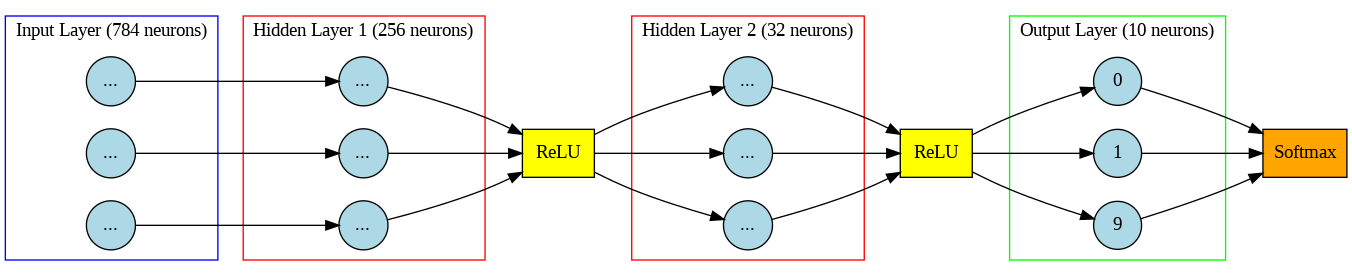

In [ ]:
import numpy as np
arr = np.arange(3*3).reshape(3,3)
arr, np.sum(arr, axis=0, keepdims=True), np.sum(arr, axis=0, keepdims=False)

In [ ]:
softmax_outputs = [[0.7, 0.1, 0.2],
[0.1, 0.5, 0.4],
[0.02, 0.9, 0.08]]
class_targets = [0, 1, 2]

In [ ]:
for targ_idx, distribution in zip(class_targets, softmax_outputs):
    print(distribution[targ_idx])

In [ ]:
list(zip(class_targets, softmax_outputs))

In [ ]:

softmax_outputs = np.array(softmax_outputs)


In [ ]:
print(softmax_outputs[[i for i in range(len(softmax_outputs))], class_targets])

In [ ]:
class_targets = np.array([[1, 0, 0],
[0, 1, 0],
[0, 1, 0]])
len(class_targets.shape)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Generate a non-normal population (exponential distribution)
population = np.random.exponential(scale=2, size=10000)

# Take multiple samples and compute their means
sample_means = [np.mean(np.random.choice(population, size=30)) for _ in range(1000)]

# Plot original distribution
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(population, bins=50, kde=True, color="red")
plt.title("Original Distribution (Exponential)")

# Plot distribution of sample means
plt.subplot(1,2,2)
sns.histplot(sample_means, bins=50, kde=True, color="blue")
plt.title("Distribution of Sample Means (Approx. Normal)")

plt.show()


In [ ]:
pip install mnist_datasets

In [ ]:
from mnist_datasets import MNISTLoader
loader = MNISTLoader()
images, labels = loader.load()
assert len(images) == 60000 and len(labels) == 60000

# Load test dataset
test_images, test_labels = loader.load(train=False)
assert len(test_images) == 10000 and len(test_labels) == 10000

In [ ]:
!pip uninstall mnist_datasets -y

In [ ]:
!pip cache purge

In [ ]:
!pip install --no-cache-dir mnist_datasets

In [ ]:
from mnist_datasets import MNISTLoader
loader1 = MNISTLoader('fashion')
images1, labels1 = loader1.load()
assert len(images1) == 60000 and len(labels1) == 60000

# Load test dataset
test_images1, test_labels1 = loader1.load(train=False)
assert len(test_images1) == 10000 and len(test_labels1) == 10000

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

index = np.random.randint(60000)
image_array = images[index]  # Shape (784,)
image_array = image_array.reshape(28, 28)

# Convert to PIL Image
image = Image.fromarray(image_array, mode="L")

# Use matplotlib instead of image.show()
plt.imshow(image, cmap="gray")
plt.axis("off")  # Hide axes
plt.show()
print(f'Corresponding label {labels[index]}')


In [ ]:
index1 = np.random.randint(60000)
image_array1 = images1[index1]  # Shape (784,)
image_array1 = image_array1.reshape(28, 28)

# Convert to PIL Image
image1 = Image.fromarray(image_array1, mode="L")

# Use matplotlib instead of image.show()
plt.imshow(image1, cmap="gray")
plt.axis("off")  # Hide axes
plt.show()
print(f'Corresponding label {labels1[index1]}')


In [ ]:
import numpy as np

In [ ]:
np.random.seed(123)
W = np.random.randn(3, 4)
X = np.random.randn(10, 3)
y = [2, 0, 1, 2, 0, 3, 2, 1, 1, 2]
num_classes = W.shape[1]
num_train = X.shape[0]
#print(W.shape, X.shape, num_classes, num_train)
scores = X.dot(W)
#print(scores.shape)
print(np.argmax(scores, axis=1))
print(np.max(scores))
print(scores[-2])
correct_scores = scores[range(num_train), y]
print(correct_scores)



In [ ]:
def softmax_loss_vectorized(W, X, y, reg):

    """

    Softmax loss function --> cross-entropy loss function --> total loss function

    """

    # Initialize the loss and gradient to zero.
    loss = 0.0
    num_classes = W.shape[1]
    num_train = X.shape[0]

    # Step 1: compute score vector for each class
    scores = X.dot(W)

    # Step 2: normalize score vector, letting the maximum value to 0
    scores = scores- scores.max()
    scores = np.exp(scores)

    #Step 3: obtain the correct class score
    correct_score = scores[range(num_train), y]
    #compute the sum of exp of all scores for all classes
    scores_sums = np.sum(scores, axis=1)

    #Step 4: compute softmax function
    softmax_loss = correct_score / scores_sums
    #compute cross-entropy function
    cross_entropy_loss = - np.log(softmax_loss)
    #compute loss function
    loss = np.sum(cross_entropy_loss)/num_train

    return loss

In [ ]:
import numpy as np

In [ ]:
a = np.random.randn(3,4)
a.mean((-1, -2)), a.mean()

In [ ]:
t = np.arange(20).astype(np.float32)
tt = (t - 9.8) ** 2
tt.ndim

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
ax = plt.subplots()
type(ax), len(ax), type(ax[0]), type(ax[1])

In [ ]:
import torch

In [ ]:
t1 = torch.tensor([100.9], requires_grad=True)

y = t1  * 101
y.backward()
t1.grad

In [ ]:
import torch

In [ ]:
a1 = torch.ones(10000).reshape(-1, 10, 10)
b1 = torch.zeros(10000).reshape(-1, 10, 10)

a1b1 = torch.stack([a1, b1], axis=0)
a1b1.shape

In [ ]:
import string
from torch.utils.data import DataLoader, Dataset
import torch
import numpy as np
dl = DataLoader(string.ascii_lowercase)
for x in dl:
    print(x)

In [ ]:
import torch

# Create a 3x3 tensor with numbers from 1 to 9
tensor = torch.arange(1, 10).reshape(3, 3)
tensor.nelement()

# Double the values
tensor = tensor * 2
print(tensor)

# Extract bottom right 2x2 sub-tensor
bottom_right = tensor[1:, 1:]

print(bottom_right)


In [ ]:
tensor.nelement()

In [ ]:
tensor.view(-1), tensor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
learning_rate = 0.1
lambda_l1 = 0.05  # L1 regularization strength
num_iterations = 50

# Initialize weight
w = 1.5  # Start with a positive weight
w_history = [w]

# Perform gradient descent with L1 regularization
for _ in range(num_iterations):
    gradient = 2 * w  # Example: Gradient from a simple squared loss (d/dw w^2)
    gradient += lambda_l1 * np.sign(w)  # Adding L1 regularization term
    w -= learning_rate * gradient  # Weight update
    w_history.append(w)

# Plot weight values over iterations
plt.plot(w_history, label="Weight Value")
plt.axhline(0, color='red', linestyle='--', label="Zero Weight")
plt.xlabel("Iterations")
plt.ylabel("Weight")
plt.legend()
plt.title("Effect of L1 Regularization on Weight Shrinkage")
plt.show()


In [ ]:
num = 100

In [ ]:
%run /content/ipython_script_test.py -i
result

In [ ]:
import string

In [ ]:
a = list(enumerate(string.ascii_lowercase))

In [ ]:
len(a), a[0]

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
dl = DataLoader(a, batch_size=3, shuffle=True)
for x, y in dl:
    print(x, y)

In [ ]:
np.ones((3, 4, 5), dtype=np.float64).strides

In [ ]:
!pip install tensorflow




In [ ]:
import tensorflow as tf

# Connect to TPU
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

# Use TPU Strategy
strategy = tf.distribute.TPUStrategy(resolver)

# Create a simple model
with strategy.scope():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')


In [ ]:
import tensorflow as tf

resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

print("All TPU devices: ", tf.config.list_logical_devices('TPU'))


In [ ]:
import tensorflow as tf
print("Is TPU available: ", tf.test.is_tpu_available())


In [ ]:
import tensorflow as tf
import os

# Force Colab to use the TPU
try:
    tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu=tpu_address)
    print("Using TPU: ", resolver.master())
except ValueError as e:
    print("Error: ", e)


In [ ]:
import tensorflow as tf

# Check if TPU is available
tf.config.list_physical_devices('TPU')
tpu_devices = tf.config.list_physical_devices('TPU')
if len(tpu_devices) > 0:
    print("TPU is available.")
else:
    print("TPU is not available.")


In [ ]:
tf.config.list_physical_devices('TPU')

In [ ]:
os.environ['COLAB_TPU_ADDR']

In [ ]:
!ip addr

In [ ]:
!ping 172.28.0.12

In [ ]:
!sudo apt-get update
!sudo apt-get install iputils-ping


In [ ]:
!curl -I 172.28.0.12

In [ ]:
print(tf.__version__)

In [ ]:
%tensorflow_version 2.19.0

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='v28')

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Grid size
GRID_SIZE = 20

# Initialize grid with random 0s and 1s
def initialize_grid(size):
    return np.random.choice([0, 1], size=(size, size), p=[0.7, 0.3])

# Function to update grid based on Game of Life rules
def update(frame, img, grid):
    new_grid = grid.copy()
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            # Count live neighbors
            neighbors = np.sum(grid[i-1:i+2, j-1:j+2]) - grid[i, j]

            # Apply rules
            if grid[i, j] == 1 and (neighbors < 2 or neighbors > 3):
                new_grid[i, j] = 0  # Dies due to underpopulation/overpopulation
            elif grid[i, j] == 0 and neighbors == 3:
                new_grid[i, j] = 1  # Becomes alive

    img.set_data(new_grid)
    grid[:] = new_grid[:]
    return img,

# Create grid and animation
grid = initialize_grid(GRID_SIZE)
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='gray')
ani = animation.FuncAnimation(fig, update, fargs=(img, grid), frames=50, interval=200, save_count=50)

plt.show()


In [ ]:
size = 3
np.random.choice([0, 1], size=(size, size), p=[0.7, 0.3])

In [ ]:
a = np.array([1, 100, 50, 2, 99, 399, 1])
a.argsort()[::-1]

In [ ]:
import torch

In [ ]:
b = torch.from_numpy(a)
b.argsort(descending =True)

In [ ]:
import numpy as np

arr = np.array([10, 20, 30], dtype=np.uint8)
ptr = arr.ctypes.data  # Get memory address (pointer)
print(hex(ptr))  # Memory address in hexadecimal


In [ ]:
arr, ~arr


In [ ]:
1 << 21

In [ ]:
from sys import (
  version,
  platform,
  argv,
  path
)


In [ ]:

print(version)  # Python version
print(platform)  # OS type
print(argv)  # Command-line arguments
print(path)  # Module search paths


In [ ]:
import sys
from sys.info import _current_arch, _current_target, _triple_attr

In [ ]:
!curl -ssL https://magic.modular.com/f38246c5-67c1-4e80-a433-b3b6ab24183b | bash

In [ ]:
!source /root/.bashrc

In [ ]:
!cat ~/.bashrc

In [ ]:
!export PATH="$PATH:/root/.modular/bin"

In [ ]:
import numpy as np

dt = np.dtype([('a', np.int8), ('b', np.int32)])
print(dt.alignment)      # alignment of the structure
print(dt.itemsize)       # total size including padding


In [ ]:
dt_aligned = np.dtype([('a', np.int8), ('b', np.int32)], align=True)
print(dt_aligned.alignment)  # Output: 4
print(dt_aligned.itemsize)   # Output: 8


In [ ]:
!apt update
!apt install -y nvidia-cuda-toolkit
!nvcc --version


In [ ]:
!nvcc --version

In [ ]:
cuda_code = r"""
#include <cuda_runtime.h>
#include <stdio.h>

__global__ void add(int *a, int *b, int *c) {
    int idx = threadIdx.x;
    c[idx] = a[idx] + b[idx];
}

int main() {
    int a[5] = {1, 2, 3, 4, 5};
    int b[5] = {10, 20, 30, 40, 50};
    int c[5];

    int *d_a, *d_b, *d_c;
    cudaMalloc((void **)&d_a, 5 * sizeof(int));
    cudaMalloc((void **)&d_b, 5 * sizeof(int));
    cudaMalloc((void **)&d_c, 5 * sizeof(int));

    cudaMemcpy(d_a, a, 5 * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(d_b, b, 5 * sizeof(int), cudaMemcpyHostToDevice);

    add<<<1, 5>>>(d_a, d_b, d_c);

    cudaMemcpy(c, d_c, 5 * sizeof(int), cudaMemcpyDeviceToHost);

    for (int i = 0; i < 5; ++i)
        printf("%d ", c[i]);
    printf("\n");

    cudaFree(d_a);
    cudaFree(d_b);
    cudaFree(d_c);

    return 0;
}
"""

with open("add.cu", "w") as f:
    f.write(cuda_code)


In [ ]:
!nvcc --ptx add.cu -o add.ptx


In [ ]:
!cat add.ptx

In [ ]:
!nvcc add.cu -o add


In [ ]:
!./add

In [ ]:
!pip install cupy

In [ ]:
!nvcc -o add add.cu
!./add


In [ ]:
!nvcc --version
!nvidia-smi


In [ ]:
!nvcc -arch=sm_37 -o add add.cu



In [ ]:
!nvcc -arch=sm_52 -o add add.cu


In [ ]:
!./add

In [ ]:
!nvcc -Xptxas -v -arch=sm_75 -o add add.cu


In [ ]:
!nvcc -Xptxas -v -arch=sm_75 -o matmul matmul.cu

In [ ]:
!./matmul

In [ ]:
import numpy as np

arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([5, 6, 7, 8])

arr1

In [ ]:
import numpy as np

A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

C = np.dot(A, B)
print("Result:\n", C)


In [ ]:
import torch
x = torch.randn(32, 3, 224, 224).cuda()
y = torch.nn.Conv2d(3, 64, 3).cuda()(x)


In [ ]:
!echo '''
#include <cuda_runtime.h>

__global__ void vector_add(const float *a, const float *b, float *c, int n) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    if (idx < n) {
        c[idx] = a[idx] + b[idx];
    }
}''' > vector_add.cu

!nvcc -arch=sm_75 vector_add.cu -ptx -o vector_add.ptx


In [ ]:
!pip install pycuda

In [ ]:
import numpy as np
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule


# Compile the kernel
mod = SourceModule("""
__global__ void vector_add(const float *a, const float *b, float *c, int n) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    if (idx < n) {
        c[idx] = a[idx] + b[idx];
    }
}
""")

# Get the kernel function
vector_add = mod.get_function("vector_add")

# Prepare data
N = 51200000
a = np.random.rand(N).astype(np.float32)
b = np.random.rand(N).astype(np.float32)
c = np.empty_like(a)

# Allocate memory on device
a_gpu = cuda.mem_alloc(a.nbytes)
b_gpu = cuda.mem_alloc(b.nbytes)
c_gpu = cuda.mem_alloc(c.nbytes)

# Copy data to GPU
cuda.memcpy_htod(a_gpu, a)
cuda.memcpy_htod(b_gpu, b)

# Launch kernel
block_size = 256
grid_size = (N + block_size - 1) // block_size
vector_add(a_gpu, b_gpu, c_gpu, np.int32(N), block=(block_size,1,1), grid=(grid_size,1))

# Copy result back
cuda.memcpy_dtoh(c, c_gpu)

# Verify
print("Correct:", np.allclose(c, a + b))


In [ ]:
 N=4
 C = [[0] * N for _ in range(N)]
 C

In [ ]:
import numpy as np

BLOCK_M = 4
BLOCK_N = 8
# Simple indexing with broadcast semantics
row_indices = np.arange(0, BLOCK_M)[:, None]
col_indices = np.arange(0, BLOCK_N)[None, :]
row_indices, col_indices


In [ ]:
import numpy as np

A = np.array([[1, 2], [3, 4]], order='C')  # Row-major
B = np.array([[1, 2], [3, 4]], order='F')  # Column-major

print(A.flags)
print("---------------")
print(B.flags)


In [ ]:
!curl -ssL https://magic.modular.com/ | bash

In [ ]:
!source /root/.bashrc

In [ ]:
import os

In [ ]:
os.environ['PATH'] += ':/root/.modular/bin'

In [ ]:
!magic init todo --format mojoproject

In [ ]:
%cd todo/

In [ ]:
!magic run mojo --version

In [ ]:
%%bash
cat > todo.mojo <<EOF
fn main():
  print("Holy cow! This is goooood!")
EOF

In [ ]:
!magic run mojo build todo.mojo

In [ ]:
!./todo

In [ ]:
def max_profit_two_transactions(prices):
    n = len(prices)
    if n < 2:
        return 0

    # First pass: max profit if sold on or before day i
    left_profits = [0] * n
    min_price = prices[0]
    for i in range(1, n):
        min_price = min(min_price, prices[i])
        left_profits[i] = max(left_profits[i - 1], prices[i] - min_price)

    # Second pass: max profit if bought on or after day i
    right_profits = [0] * n
    max_price = prices[-1]
    for i in range(n - 2, -1, -1):
        max_price = max(max_price, prices[i])
        right_profits[i] = max(right_profits[i + 1], max_price - prices[i])

    # Combine profits: best of left + right split
    max_total = right_profits[0]
    for i in range(1, n):
        max_total = max(max_total, left_profits[i-1] + right_profits[i])
    #print(left_profits)
    print(right_profits)
    return max_total


In [ ]:
max_profit_two_transactions([3,3,5,0,0,3,1,4])

In [ ]:
max_profit_two_transactions([1,2,3,4,5])

In [ ]:
max_profit_two_transactions([7,6,4,3,1])


In [ ]:
!curl -ssL https://magic.modular.com/f38246c5-67c1-4e80-a433-b3b6ab24183b | bash

In [ ]:
import os
os.environ['PATH'] += ':/root/.modular/bin'

In [ ]:
!magic init gpu-intro --format mojoproject

In [ ]:
%cd gpu-intro

In [ ]:
!magic run mojo --version

In [ ]:
%%writefile vector_addition.mojo
from max.driver import accelerator, cpu
from sys import exit, has_accelerator

def main():
    if not has_accelerator():
        print("A GPU is required to run this program")
        exit()

    host_device = cpu()
    print("Found the CPU device")
    gpu_device = accelerator()
    print("Found the GPU device")


In [ ]:
!magic run mojo vector_addition.mojo

In [ ]:
!nvidia-smi

In [ ]:
!curl -ssL https://magic.modular.com/ | bash

In [ ]:
import os
os.environ['PATH'] += ':/root/.modular/bin'

In [ ]:
def vpermb_sim(src, index):
    dst = []
    for i, idx in enumerate(index):
        if idx & 0x80:  # high bit set
            dst.append(0)
        else:
            pos = idx & 0x3F  # only use lower 6 bits
            if pos < len(src):
                dst.append(src[pos])
            else:
                dst.append(0)  # out-of-bounds gets zero
    return dst

# Example usage:
src = [10, 20, 30, 40]
index = [0, 2, 128, 5]  # 0→10, 2→30, 128→0 (mask), 5→OOB→0

result = vpermb_sim(src, index)
print(result)  # Output: [10, 30, 0, 0]


In [ ]:
 !nvidia-smi

In [ ]:
!pip install tensorflow
!pip install tqdm

In [ ]:
import numpy as np

In [ ]:
a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])
res = a @ b
res

In [ ]:
import numpy as np

def blocked_matmul(A: np.ndarray, B: np.ndarray, block_size: int) -> np.ndarray:
    """Blocked matrix multiplication: C = A * B"""
    assert A.shape[1] == B.shape[0], "Incompatible matrix shapes!"

    n, m = A.shape
    p = B.shape[1]

    C = np.zeros((n, p), dtype=A.dtype)

    for i0 in range(0, n, block_size):
        for j0 in range(0, p, block_size):
            for k0 in range(0, m, block_size):
                # Now multiply block (i0,j0,k0)
                i_max = min(i0 + block_size, n)
                j_max = min(j0 + block_size, p)
                k_max = min(k0 + block_size, m)

                for i in range(i0, i_max):
                    for k in range(k0, k_max):
                        for j in range(j0, j_max):
                            C[i, j] += A[i, k] * B[k, j]

    return C



In [ ]:
import time

In [ ]:
# Create random matrices
np.random.seed(0)
A = np.random.rand(1024, 256)
B = np.random.rand(256, 1024)
t1 = time.time()
# Multiply using block size 32
C_blocked = blocked_matmul(A, B, block_size=512)
t2 = time.time()
print(f"Time taken for blocked matrix multiplication: {t2 - t1} seconds")
# Compare to numpy's result
t3 = time.time()
C_numpy = np.dot(A, B)
t4 = time.time()
print(f"Time taken for numpy matrix multiplication: {t4 - t3} seconds")

# Check correctness
print(np.allclose(C_blocked, C_numpy))  # Should print: True


In [ ]:
!git clone https://github.com/NVIDIA/cuda-samples.git

In [ ]:
!sudo apt update

In [ ]:
!lscpu | grep -i nvidia

In [ ]:
!sudo apt install -y update-pciids

In [ ]:
!uname -r


In [ ]:
!cat /etc/*release

In [ ]:
!g++ --version

In [ ]:
!gcc --version

In [ ]:
!clang --version

In [ ]:
!nvidia-smi


In [ ]:
!nvcc --version


In [ ]:
!cmake --version

In [ ]:
%cd cuda-samples/

In [ ]:
!pwd

In [ ]:
!mkdir build

In [ ]:
%cd build/

In [ ]:
!cmake ..

In [ ]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/cuda-ubuntu2204.pin

In [ ]:
!sudo mv cuda-ubuntu2204.pin /etc/apt/preferences.d/cuda-repository-pin-600

In [ ]:
!wget https://developer.download.nvidia.com/compute/cuda/12.8.1/local_installers/cuda-repo-ubuntu2204-12-8-local_12.8.1-570.124.06-1_amd64.deb

In [ ]:
!sudo dpkg -i cuda-repo-ubuntu2204-12-8-local_12.8.1-570.124.06-1_amd64.deb

In [ ]:
!sudo cp /var/cuda-repo-ubuntu2204-12-8-local/cuda-*-keyring.gpg /usr/share/keyrings/

In [ ]:
!sudo apt-get update

In [ ]:
!sudo apt-get -y install cuda-toolkit-12-8

In [ ]:
!make -j$(nproc)

In [ ]:
%cd /content/cuda-samples/build/Samples/1_Utilities/deviceQuery

In [ ]:
!make

In [ ]:
!./deviceQuery

In [ ]:
!pwd

In [ ]:
%cd /content/cuda-samples/build/Samples/1_Utilities/topologyQuery

In [ ]:
!make

In [ ]:
!./topologyQuery

In [ ]:
%cd /content/cuda-samples/build/Samples/1_Utilities/bandwidthTest

In [ ]:
!make

In [ ]:
!./bandwidthTest

In [ ]:
%cd /content/cuda-samples/build/Samples/1_Utilities/deviceQueryDrv

In [ ]:
!make & ./deviceQueryDrv

In [ ]:
%cd /content/cuda-samples/build/Samples/2_Concepts_and_Techniques

In [ ]:
!make

In [ ]:
%cd /content/cuda-samples/build/Samples/3_CUDA_Features

In [ ]:
!make

In [ ]:
!nvcc add.cu -o add_cuda

In [ ]:
!nvprof ./add_cuda

In [ ]:
!./add_cuda

In [ ]:
!nvprof ./add_cuda

In [ ]:
%%writefile main.mojo
fn main():
    print("Hello world")

In [ ]:
import numpy as np

In [ ]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[7, 8], [9, 10], [11, 12]])
C = A @ B
print(C)

In [ ]:
def matmul_naive(C, A, B):
    for m in range(A.shape[0]):
        for k in range(A.shape[1]):
            for n in range(B.shape[1]):
                C[m, n] += A[m, k] * B[k, n]

In [ ]:
C = np.zeros((A.shape[0], B.shape[1]))
matmul_naive(C, A, B)
print(C)

In [ ]:
C = np.zeros_like(C)

In [ ]:
C[0, 0] += A[0, 0] * B[0, 0]
C[0, 1] += A[0, 0] * B[0, 1]

C[0, 0] += A[0, 1] * B[1, 0]
C[0, 1] += A[0, 1] * B[1, 1]

C[0, 0] += A[0, 2] * B[2, 0]
C[0, 1] += A[0, 2] * B[2, 1]

C[1, 0] += A[1,0] * B[0, 0]
C[1, 1] += A[1,0] * B[0, 1]

C[1, 0] += A[1,1] * B[1,0]
C[1, 1] += A[1,1] * B[1, 1]

C[1, 0] += A[1, 2] * B[2, 0]
C[1, 1] += A[1, 2] * B[2, 1]

In [ ]:
C

In [ ]:
A = np.arange(1,17).reshape(4,4)
A

In [ ]:
B = np.arange(1,17).reshape(4,4)
A @ B

In [ ]:
import numpy as np

# Use float32 for single precision
a = np.float32(1e10)
b = np.float32(1e-10)
c = np.float32(1.0)

# Simulate FMA: (a * b) + c, computed in one go
fma_result = np.float32(a * b + c)

# Simulate non-FMA: compute a*b first (rounding), then add c
product = np.float32(a * b)         # This gets rounded first
non_fma_result = np.float32(product + c)

# Show results
print(f"FMA result:      {fma_result}")
print(f"Non-FMA result:  {non_fma_result}")


In [ ]:
%%writefile histogram.cu
__global__ void compute_histogram(const unsigned char* image, int* histogram, int size) {
    int idx = threadIdx.x + blockIdx.x * blockDim.x;

    if (idx < size) {
        unsigned char pixel = image[idx];
        // Atomically increment the bin for this pixel value
        atomicAdd(&histogram[pixel], 1);
    }
}
#include <cuda_runtime.h>
#include <iostream>

const int IMG_SIZE = 1024 * 1024;  // Example: 1MP grayscale image
const int HIST_SIZE = 256;

int main() {
    // Allocate and initialize image on host
    unsigned char* h_image = new unsigned char[IMG_SIZE];
    for (int i = 0; i < IMG_SIZE; i++) {
        h_image[i] = rand() % 256;  // Random grayscale pixels
    }

    // Allocate device memory
    unsigned char* d_image;
    int* d_histogram;
    cudaMalloc(&d_image, IMG_SIZE);
    cudaMalloc(&d_histogram, HIST_SIZE * sizeof(int));
    cudaMemcpy(d_image, h_image, IMG_SIZE, cudaMemcpyHostToDevice);
    cudaMemset(d_histogram, 0, HIST_SIZE * sizeof(int));  // Clear bins

    // Launch kernel
    int threadsPerBlock = 256;
    int blocks = (IMG_SIZE + threadsPerBlock - 1) / threadsPerBlock;
    compute_histogram<<<blocks, threadsPerBlock>>>(d_image, d_histogram, IMG_SIZE);
    cudaDeviceSynchronize();

    // Copy result back
    int h_histogram[HIST_SIZE];
    cudaMemcpy(h_histogram, d_histogram, HIST_SIZE * sizeof(int), cudaMemcpyDeviceToHost);

    // Show some output
    for (int i = 0; i < 10; ++i) {
        std::cout << "Bin " << i << ": " << h_histogram[i] << std::endl;
    }

    // Cleanup
    delete[] h_image;
    cudaFree(d_image);
    cudaFree(d_histogram);
    return 0;
}


In [ ]:
!nvcc histogram.cu -o histogram

In [ ]:
!./histogram

In [ ]:
%%writefile hist_kernel.cu
#include "kernel.cuh"
__global__ void compute_histogram(const unsigned char* image, int* histogram, int size) {
    int idx = threadIdx.x + blockIdx.x * blockDim.x;

    if (idx < size) {
        unsigned char pixel = image[idx];
        // Atomically increment the bin for this pixel value
        atomicAdd(&histogram[pixel], 1);
    }
}


In [ ]:
%%writefile hist_driver.cu
#include <cuda_runtime.h>
#include <iostream>
#include "kernel.cuh"
const int IMG_SIZE = 1024 * 1024;  // Example: 1MP grayscale image
const int HIST_SIZE = 256;

int main() {
    // Allocate and initialize image on host
    unsigned char* h_image = new unsigned char[IMG_SIZE];
    for (int i = 0; i < IMG_SIZE; i++) {
        h_image[i] = rand() % 256;  // Random grayscale pixels
    }

    // Allocate device memory
    unsigned char* d_image;
    int* d_histogram;
    cudaMalloc(&d_image, IMG_SIZE);
    cudaMalloc(&d_histogram, HIST_SIZE * sizeof(int));
    cudaMemcpy(d_image, h_image, IMG_SIZE, cudaMemcpyHostToDevice);
    cudaMemset(d_histogram, 0, HIST_SIZE * sizeof(int));  // Clear bins

    // Launch kernel
    int threadsPerBlock = 256;
    int blocks = (IMG_SIZE + threadsPerBlock - 1) / threadsPerBlock;
    compute_histogram<<<blocks, threadsPerBlock>>>(d_image, d_histogram, IMG_SIZE);
    cudaDeviceSynchronize();

    // Copy result back
    int h_histogram[HIST_SIZE];
    cudaMemcpy(h_histogram, d_histogram, HIST_SIZE * sizeof(int), cudaMemcpyDeviceToHost);

    // Show some output
    for (int i = 200; i < 255; ++i) {
        std::cout << "Bin " << i << ": " << h_histogram[i] << std::endl;
    }

    // Cleanup
    delete[] h_image;
    cudaFree(d_image);
    cudaFree(d_histogram);
    return 0;
}


In [ ]:
!nvcc hist_driver.cu hist_kernel.cu -o hist_driver

In [ ]:
%%writefile kernel.cuh
#pragma once
__global__ void compute_histogram(const unsigned char* image, int* histogram, int size);


In [ ]:
!./hist_driver

In [ ]:
%%writefile Makefile
# File: Makefile

# Compiler
NVCC = nvcc

# Source files
SRCS = hist_driver.cu hist_kernel.cu

# Output binary name
TARGET = histogram

# Compiler flags (optional)
NVCC_FLAGS = -O2

all: $(TARGET)

$(TARGET): $(SRCS)
	$(NVCC) $(NVCC_FLAGS) $(SRCS) -o $(TARGET)

clean:
	rm -f $(TARGET)


In [ ]:
!make

In [ ]:
!./histogram

In [ ]:
!make clean

In [ ]:
!mkdir cuda_histogram_project

In [ ]:
%cd cuda_histogram_project

In [ ]:
!touch Makefile

In [ ]:
!mkdir src
!mkdir include

In [ ]:
!touch include/kernel.cuh
!touch src/kernel.cu
!touch src/driver.cu

In [ ]:
!make

In [ ]:
!./build/histogram

In [ ]:
!make clean

In [ ]:
!./cuda-clone.sh

In [ ]:
!chmod +x cuda-clone.sh

In [ ]:
%cd /content/

In [ ]:
!rm -rf mojo_programming/

In [ ]:
%cd mojo_programming/

In [ ]:
!ls -la

In [ ]:
%cd cuda/histogram/

In [ ]:
!pwd

In [ ]:
!make

In [ ]:
!cp /content/mojo_programming/cuda/histogram/Makefile /content/cuda_histogram_project

In [ ]:
%cd /content/mojo_programming/cuda/histogram/

In [ ]:
!make

In [ ]:
!./build/histogram

In [ ]:
!make clean

In [ ]:
%cd /content/

In [ ]:
!pwd

In [ ]:
!rm -rf *

In [ ]:
!chmod +x cuda-clone.sh

In [ ]:
!./cuda-clone.sh

In [ ]:
%cd /content/mojo_programming/cuda/histogram

In [ ]:
!make

In [ ]:
!./build/histogram

In [ ]:
!make clean

In [ ]:
!chmod +x cuda-clone.sh

In [ ]:
!./cuda-clone.sh

In [23]:
%cd /content/mojo_programming/cuda/histogram

/content/mojo_programming/cuda/histogram


In [41]:
!make & ./build/histogram

make: Nothing to be done for 'all'.
Bin 0: 3979
Bin 1: 4118
Bin 2: 4033
Bin 3: 4084
Bin 4: 4126
Bin 5: 4047
Bin 6: 4109
Bin 7: 4131
Bin 8: 4106
Bin 9: 4097
